# Introduction to Quantum Circuits and Digital Quantum Simulation
## MSc in Quantum Technologies

# Introduction
Recall the learning goals (see lab script for detail):
1. Install and configure Qiskit and IBM Quantum Runtime to target simulators and hardware;
2. explain and visulize single and multi qubit states (Bloch/Q-sphere), gates, and measurements;
3. build and analyze basic quantum protocols (Deutsch/Jozsa, teleportation, superdense coding);
4. assemble NISQ-appropriate workflows for quantum simulation

# Syllabus and pacing:
1. Quantum Computing Fundamentals
2. Basic Quantum Protocols
3. Quantum Simulation
4. Assignment

Each of the above section will take about (or more) than 10 hours.

# 1. Quantum Computing Fundamentals
## 2025/10/21
Aim of this week is to finish section 1.

## 1.a Install and IBM Cloud API

Following the guide with Qiskit (https://quantum.cloud.ibm.com/docs/en/guides/install-qiskit), the latest version of qiskit and qiskit-ibm-runtime are installed to Python virtual environment.

In [ ]:
# install virtual environment
python3 -m venv .venv

# install all relavent packages
pip install qiskit
pip install qiskit-ibm-runtime
pip install qiskit[visualization]
pip install qiskit_aer
pip install jupyter

To use the virtual environment, enter the following code to the cmd terminal in VS code.

In [ ]:
# Using the virtual environment
.venv\Scripts\activate

In addition, the jupyter notebook installed in this device seems to have some issue, which means the usual activation command may not work properly. So, if fail to open jupyter notebook, try the 2nd command below.

In [ ]:
# Usual command for jupyter notebook
jupyter notebook

# Provide root to jupyter notebook
sudo jupyter notebook --allow-root

With the above intro, we should be able to use qiskit or any relavent code in this jupyter notebook. As a trail, hello-world.ipynb was downloaded under the same location and environment. Qiskit introduction code was tested there.

## 1.b Quantum Computing Fundamentals
Now, with the above environment, we may start practing creating quantum staes and vectors, superposition and simple two level systems, read histograms and sue Bloch/Q-sphere views to connect math to the pictures you see in qiskit.

## Tutorial 1: Quantum coins and superposition
Step 1: simulate a classical coin
the state of the coin before it lands to reflect this 50/50 probability:

$$
S(coin) =  \frac{1}{2}|up\rangle + \frac{1}{2}|down\rangle
$$

Here, the two terms represent the two possible outcomes of the flip, and their coefficients represent the probabilities of each of the outcomes. Note that typically, the "$|\rangle$" (known as a "ket") is used to represent a quantum state, but here, we are talking about a *classical* probabilistic state.

If we were to flip a coin 1000 times and record the number of heads up and down, we would get something like this:

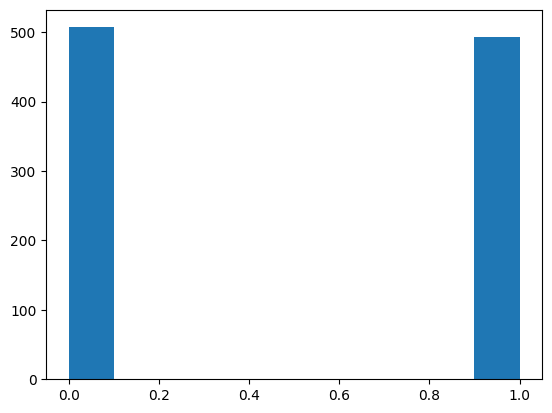

In [3]:
# import necessary packages:
import numpy as np
import matplotlib.pyplot as plt
import random
 
 
nflips = 1000
fliplist = [random.randint(0, 1) for f in range(nflips)]
 
 
# bar plots using get_gaussian_probs function
plt.hist(fliplist)
plt.show()

Step 2: quantum coin
We can create a similar probabilistic state using a qubit on our quantum computer. Like the coin flip, a qubit also can be measured in two possible states: $|0\rangle$ and $|1\rangle$. We create the probabilistic, "superposition" state by starting in the state $|0\rangle$, and then applying something called a Hadamard gate to the qubit. This puts it in an equal superposition of $|0\rangle$ and $|1\rangle$.

So, since the qubit is in an equal superposition of 0 and 1, when we measure the qubit, there will be a 50% chance we measure $|0\rangle$, 50% chance we measure $|1\rangle$. We write this state a little differently from the classical probabilistic case, for reasons that will become clear later:

$$
|\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle
$$

Here, the probabilities of measuring each of the two states are **no longer** equal to the coefficients, as was the case in the classical probabilistic state above. Instead, it is the **square** of the coefficients that gives us the probabilities, and each of these coefficients can now be complex, meaning they can have both real and imaginary parts.

Despite these differences, though, the outcome of measuring this state is essentially the same as flipping a coin.

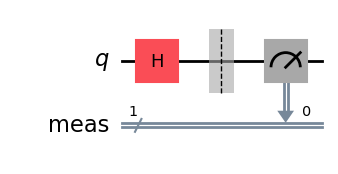

In [4]:
from qiskit import QuantumCircuit

qcoin = QuantumCircuit(1)
qcoin.h(0)
qcoin.measure_all()

qcoin.draw("mpl")

So, in effect, applying the Hadamard gate is the analogue to flipping a coin. And just like we flipped the coin 1000 times to look at the statistics of the coin landing heads up or down, we can do something similar on Qiskit with our “quantum coin." We can use a Qiskit primitive called `Sampler`, which will repeat a circuit several times to sample the statistics of the resulting state.

First, we load the Qiskit Runtime service and primitives, then we select a backend on which to run the circuit.

In [6]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
service = QiskitRuntimeService()

management.get:WARNING:2025-10-22 11:38:09,659: Loading default saved account


In [7]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import (
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
)

# Use the least busy backend
backend = service.least_busy()
print(backend.name)

ibm_torino


Also, while waiting for the queue, we could use the follwoing simulation for small number of qubits

In [8]:
## Use a local simulator

from qiskit_aer import AerSimulator

## Generate a simulator that mimics the real quantum system

backend_sim = AerSimulator.from_backend(backend)

## Import an estimator, this time from qiskit (we will import from Runtime for real hardware)
from qiskit.primitives import BackendSamplerV2
sampler_sim = BackendSamplerV2(backend = backend_sim)
from qiskit.primitives import BackendEstimatorV2
estimator_sim = BackendEstimatorV2(backend = backend_sim)

In [9]:
## Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin)

In [ ]:
## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()

# or with Aer simulator with noise model from real backend
simulated_job = sampler_sim.run([qc_isa])
simulate_counts = simulated_job.result()[0].data.meas.get_counts()

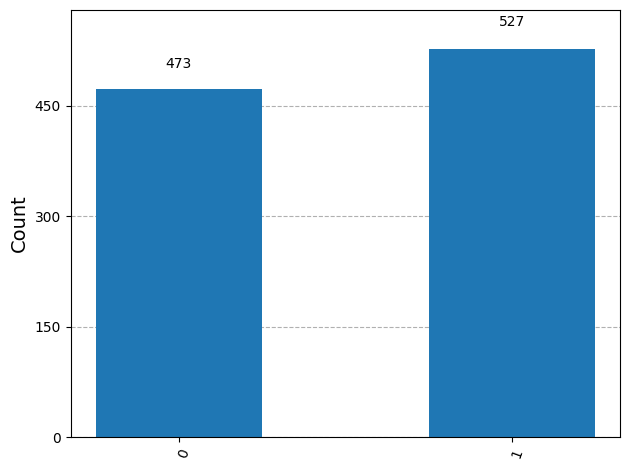

In [22]:
## Analysis
from qiskit.visualization import plot_histogram

# histogram of real hardware
plot_histogram(counts)

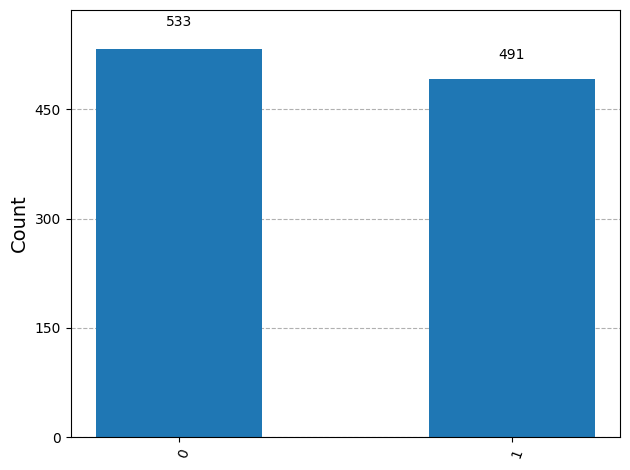

In [23]:
# simulation result
plot_histogram(simulate_counts)

With 1000 samples of the circuit above, we have something that looks basically identical to the classical coin histogram, up to some statistical fluctuation.

In addition to sampling the statistics of the quantum coin, we can also use another Qiskit primitive called `Estimator` to measure the so-called *expectation value* of an *observable* of the state. To illustrate what this expectation value is, let's use the classical coin as an example. Say you're using the coin to gamble: every time you flip the coin and it lands "heads up," you win one dollar. But every time it lands "heads down," you lose one dollar. If you want to know how much money you're expected to get each flip (the expectation value of the observable "money"), then you would calculate:

$$
E(money) = \frac{1}{2} (+ \text{1 dollar}) +  \frac{1}{2} (- \text{1 dollar}) = \text{0 dollars}
$$

Since you're equally likely to win a dollar as you are to lose a dollar, the expectation value is \$0.

Similarly, with a quantum state, we can calculate the expectation value of the observable "Z", where Z is the Pauli matrix with values +1 and -1 associated with the states $|0\rangle$ and $|1\rangle$, respectively.

$$
\langle \psi|Z|\psi \rangle = \frac{1}{2} \langle 0 | Z | 0 \rangle +  \frac{1}{2} \langle 1 | Z | 1 \rangle = \frac{1}{2} (+1) +  \frac{1}{2}(-1) = 0
$$



In [17]:
from qiskit.quantum_info import Pauli

qcoin = QuantumCircuit(1)
qcoin.h(0)

# for Estimator, we do not apply the measurement to the circuit

In [24]:
## Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

obs = Pauli("Z")

qc_isa = pm.run(qcoin)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

In [25]:
## Execute

# On real hardware:
estimator = Estimator(mode=backend)
pubs = [(qc_isa, obs_isa)]
job = estimator.run([[qc_isa, obs_isa]])
res = job.result()

# On a simulator:
simulated_job = estimator_sim.run([[qc_isa, obs_isa]])
simulated_res=job.result()

print(res[0].data.evs)

-0.015870916545430498


In [26]:
print(simulated_res[0].data.evs)

-0.015870916545430498


We get an expectation value of 0, as expected (hah). This is another way to confirm that indeed, there is an equal probability of measuring or 0 and 1, and appears to behave like a coin flip.

At this point, the "quantum coin" looks exactly like the classical coin. But in the next section, we'll do some experiments that will reveal the fundamental differences between the two.


## The quantum revealed: an experiment in three dimensions

Let's do a thought experiment: Say you flip a coin in the air, and rather than let it fall to the ground, you have the coordination to clap as it passes between your hands and sandwich the coin between your palms. Now, instead of the coin being either heads up or down, it's heads left or right.

#### Check your understanding

Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

    What is the probability of each of these outcomes, heads left or heads right?



Classically, it should be the same

But how would things look different for our quantum coin? Let's check.

We can make our quantum superposition in the same way we did last time, with a Hadamard gate. To measure “heads left or right” on our quantum coin, we can do what we did with the classical coin: measure along a different axis. Our standard measurements on the quantum computer are along the vertical axis, just like the usual “heads up or down” measurement of the classical coin. But we can also ask our quantum coin if it’s heads left or right, or equivalently, if it’s in the states $|+\rangle$ or $|-\rangle$, which are pointing along the $x$-axis. `Sampler` only samples in the measurement basis Z, but we can use `Estimator` to give us the expectation value of X. The values of X are +1 and -1 for the states $|+\rangle$ or $|-\rangle$, respectively.

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    If the quantum coin behaved like the classical coin in this case, we would have a 50-50 probability of measuring the state to be in $|+\rangle$ and $|-\rangle$. What expectation value of X would we expect `Estimator` to return, if this were the case?
  </summary>

  **Answer:**

  When we apply X to the $|+\rangle$ state, we get the value and +1 and to the state $|-\rangle$ we get -1, so if we had a 50-50 distribution, we would get an expectation value of 0.
</details>

In [ ]:
# Step 1: map problem

qcoin_lr = QuantumCircuit(1)
qcoin_lr.h(0)

obs = Pauli("X")


# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qcoin_lr)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

# Step 3: Run the circuit on a real quantum computer

estimator = Estimator(mode=backend)
pubs = [(qc_isa, obs_isa)]
job = estimator.run([[qc_isa, obs_isa]])
res = job.result()

# Run the job on the Aer simulator with noise model from real backend
sim_job = estimator_sim.run([[qc_isa,obs_isa]])
sim_res=sim_job.result()

In [29]:
# Step 4: Return the result in classical form, and analyze.
print(res[0].data.evs)
print(sim_res[0].data.evs)

0.9891135303265941
0.96533203125


The expectation value of X for this state is 1. So, there is **not** a 50-50 probability of measuring $|+\rangle$ and $|-\rangle$.

#### Check your understanding

Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    What does this expectation value tell us about the state $|\psi\rangle$? What are the probabilities of measuring $|+\rangle$ and $|-\rangle$ in this X basis?
  </summary>

  **Answer:**

  Since the expectation value is the same as the value of X for the state $|+\rangle$, that means we have 100% probability of measuring the state $|+\rangle$ when we measure along X.
</details>



It means that, the quantum coin we generated, has a different behaviour alone vertical axis than the horizontal axis. Simply speaking, it has a direction in its random states.

### The quantum phase

The key difference of the quantum coin is that it has another quality that the classical coin does not. Remember that in a classical probabilistic state,

$$
S(coin) =  c_1|up\rangle + c_2|down\rangle
$$

each coefficient is simply a real, positive number that represents the probability of measuring a particular state. In a quantum state,

$$
|\psi\rangle = c_1 |0\rangle + c_2 |1\rangle
$$

the coefficients are complex, so they contain a real and an imaginary part. Each coefficient $c_i$ can be expressed as a two-dimensional vector on the complex plane, with magnitude $|c_i|$ and angle $\phi_i$ it makes with the real axis:

$$
c_i = |c_i| e^{i \phi_i}.
$$

We call $\phi_i$ the phase. The phase tells us how two terms in a quantum state will *interfere*, or how they will add or cancel like waves. If two waves are in phase with one another, so their crests and troughs line up, then they will combine to form a wave twice as high. We call this constructive interference. If they are out of phase, meaning a crest from one lines up with trough from the other, and vice-versa, they interfere destructively and completely cancel each other out.

Like waves, quantum states can also add constructively or destructively. It can be trickier to see because often, we are not talking about an actual wave in physical space. In the case of our qubits, the interference happens in abstract, information space of the qubits. Also note that because only the *relative* phase between the two waves matters to how they will interfere - that is, the difference in the phases $\Delta \phi = \phi_2 - \phi_1$ of the two coefficients - we typically apply a *global phase* of $-\phi_1$ to the entire state so that $c_1$ is purely real and the *relative phase* is entirely captured in $c_2$.

like this:

$$
|\psi\rangle = |0\rangle + e^{i \phi}|1\rangle
$$

To see how the phase can cause interference in our quantum coin, let’s try to apply the Hadamard two times instead of just once. Classically, this wouldn’t make any sense – if applying the Hadamard is equivalent to flipping a coin, then you can’t flip a coin that is already flipping. But let's see what happens to the quantum coin:



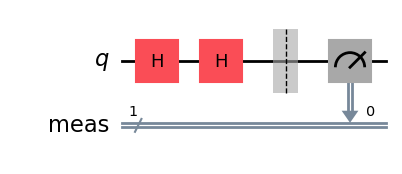

In [31]:
qcoin_0 = QuantumCircuit(1)
qcoin_0.h(0)
qcoin_0.h(0)
qcoin_0.measure_all()

qcoin_0.draw("mpl")

Now, before we use `Sampler` to measure the resulting state, let's think about how this qubit will be transformed by each gate. It starts, as usual, in $|0\rangle$. Then, the first Hadamard transforms the state into the superposition, as we've already seen:

$$
H|0\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle.
$$

In this case, both coefficients are fully real and positive, meaning the phase is $\phi=0$.

The second Hadamard is then applied to each piece of the superposition state separately. We already know how the Hadamard transforms the $|0\rangle$ state. But what about $|1\rangle$?

$$
H|1\rangle = \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle
$$

This is, again, an equal superposition of 0 and 1, akin to flipping a coin, but this state's coefficient in front of $|1\rangle$ has a phase of $\phi = \pi$ to give it the negative sign.

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Calculate the resulting state after applying the second Hadamard. That is, calculate: $H(\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle)$. Note that $H$ is distributive, so we can apply it to each of the terms individually.
  </summary>

  **Answer:**

  $$
  H(\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle) = \frac{1}{\sqrt{2}} H|0\rangle + \frac{1}{\sqrt{2}} H|1\rangle = \frac{1}{2} [(|0\rangle + |1\rangle) + (|0\rangle - |1\rangle)] = |0\rangle
  $$
</details>



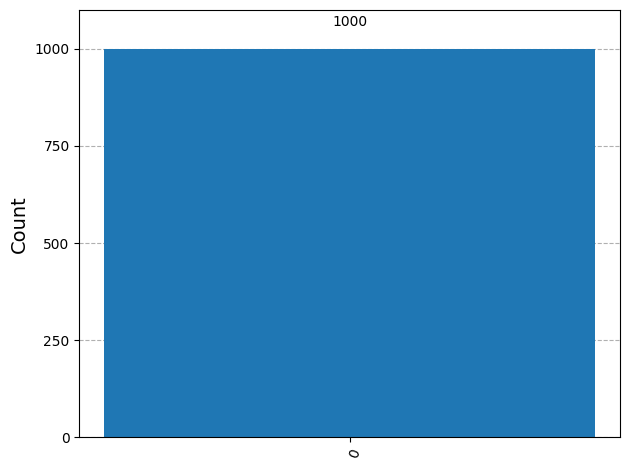

In [32]:
## Transpile

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin_0)

## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()

## Analyze
plot_histogram(counts)

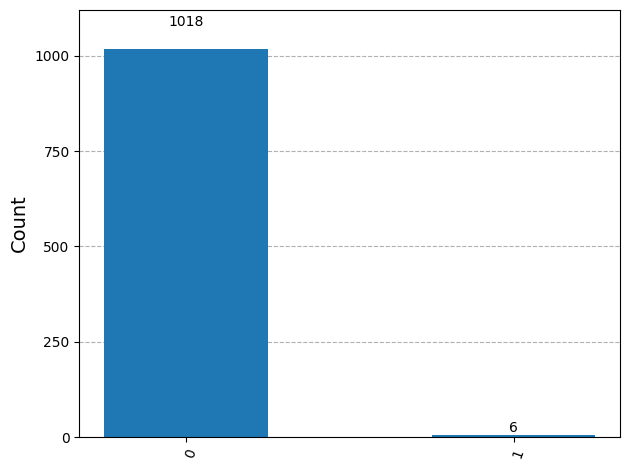

In [33]:
# or with Aer simulator with noise model from real backend
sim_job = sampler_sim.run([qc_isa])
sim_counts=sim_job.result()[0].data.meas.get_counts()

## Analyze
plot_histogram(sim_counts)


The second Hadamard has canceled out the first, and we’ve returned to the 0 state where we started! This is because the Hadamard transforms both the $|0\rangle$ and $|1\rangle$ states to similar states, but with opposite phases. After the second Hadamard, we see that the $|0\rangle$ terms interfere constructively, but the $|1\rangle$ terms interfere destructively and cancel each other out.

Let’s explore further: we can change the phase using a "PHASE” gate. So now let’s apply a Hadamard to create the superposition, apply a phase shift of $\pi$ radians, then apply the second Hadamard:



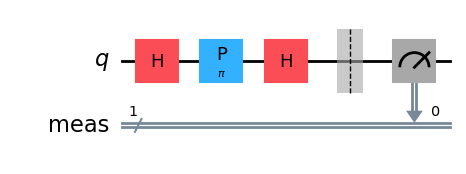

In [34]:
qcoin_pi = QuantumCircuit(1)
qcoin_pi.h(0)
qcoin_pi.p(np.pi, 0)
qcoin_pi.h(0)
qcoin_pi.measure_all()

qcoin_pi.draw("mpl")

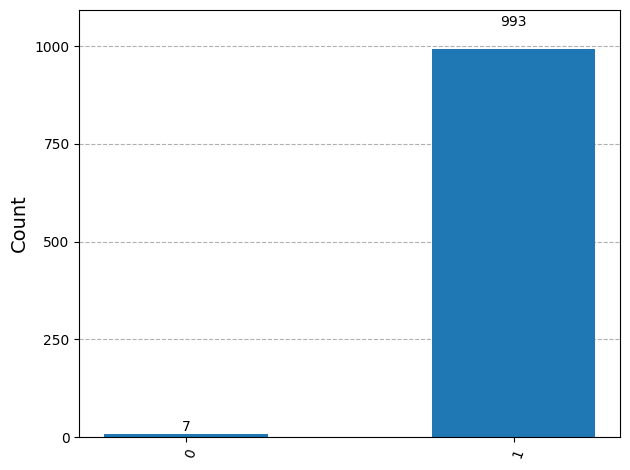

In [35]:
## Transpile

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin_pi)

## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()

## Analyze
plot_histogram(counts)

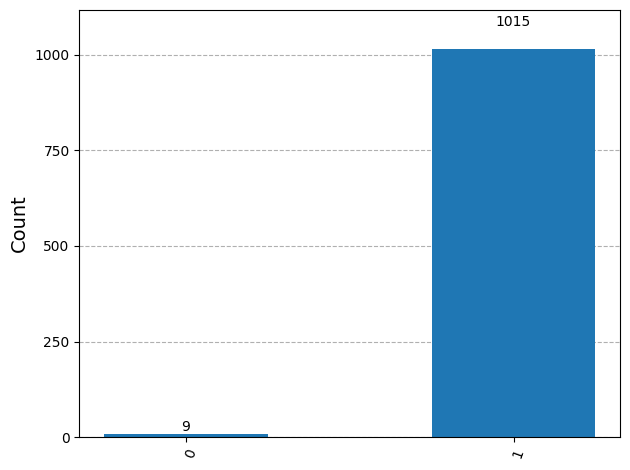

In [37]:
# or with Aer simulator with noise model from real backend
sim_job = sampler_sim.run([qc_isa])
sim_counts=sim_job.result()[0].data.meas.get_counts()
plot_histogram(sim_counts)

## Interesting thing to notice:
in the above simulation, it seems like the total number of trails is more than 1000 (add to 1024). This is because that we simulate 2^10 as a defult value of the simulator.

And now the qubit is measured to be in the 1 state instead of 0.

So, even from these few, simple experiments, you can already see the drastic difference this phase can make on a quantum circuit. It can be subtle and hard to see at first. In our first experiment, where we simply tossed our quantum coin with a Hadamard gate and measured the outcome of the flip revealed nothing of the effect of the phase. It was only when we dug deeper that we discovered the difference a phase can make. It can cause the same quantum gate to have quite literally the opposite effect on a qubit.

#### Try it yourself:

Edit the code cell below to change the phase such that the second Hadamard creates a superposition state with probabilities of 25% and 75% of finding the state in $|0\rangle$ and $|1\rangle$, respectively. Verify your answer with math.



In [38]:
import numpy as np

qcoin_phase = QuantumCircuit(1)
qcoin_phase.h(0)
qcoin_phase.rz(2*np.pi/3, 0)  # Phase = 2π/3 ≈ 2.094 radians
qcoin_phase.h(0)
qcoin_phase.measure_all()

## Transpile
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qcoin_phase)

## Execute
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()
counts = res[0].data.meas.get_counts()

## Analyze
plot_histogram(counts)
print(f"Phase angle: {2*np.pi/3:.4f} radians = {120:.1f} degrees")

Phase angle: 2.0944 radians = 120.0 degrees


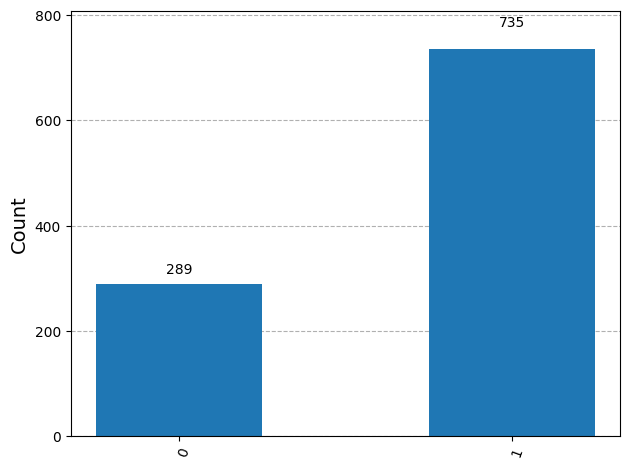

In [39]:
sim_job = sampler_sim.run([qc_isa])
sim_counts=sim_job.result()[0].data.meas.get_counts()
plot_histogram(sim_counts)

## Mathematical Analysis: H-Rz(θ)-H Circuit

**Goal:** Find θ such that P(|0⟩) = 0.25 and P(|1⟩) = 0.75

### State Evolution

1. **Initial state:** $|\psi_0\rangle = |0\rangle$

2. **After first Hadamard:** $|\psi_1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

3. **After Rz(θ):** $|\psi_2\rangle = \frac{1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle)$

4. **After second Hadamard:** 
   $$|\psi_3\rangle = \frac{1}{2}\left[(1 + e^{i\theta})|0\rangle + (1 - e^{i\theta})|1\rangle\right]$$

### Measurement Probabilities

$$P(0) = \left|\frac{1 + e^{i\theta}}{2}\right|^2 = \frac{1 + \cos\theta}{2}$$

$$P(1) = \left|\frac{1 - e^{i\theta}}{2}\right|^2 = \frac{1 - \cos\theta}{2}$$

### Solving for θ

Set $P(0) = 0.25$:

$$\frac{1 + \cos\theta}{2} = 0.25$$
$$\cos\theta = -0.5$$
$$\theta = \frac{2\pi}{3} \text{ radians} = 120°$$

### Verification

- $P(0) = \frac{1 + (-0.5)}{2} = 0.25$ ✓
- $P(1) = \frac{1 - (-0.5)}{2} = 0.75$ ✓

**Answer:** $\theta = \frac{2\pi}{3} \approx 2.094$ radians = $120°$


## Another (better) coin analogy using the $\sqrt{\text{NOT}}$ gate

By now we've learned that the act of flipping a coin is pretty different from creating a superposition state. Is there a better analogy we could make to a coin that captures more of the superposition-like phenomena? Yes. Yes there is.

We're going to do another thought experiment with a coin. Imagine the coin sitting on the table, heads up. To make it heads down, we can simply flip it over. This is the computational equivalent of a "NOT" gate.

Say we want to construct an operation that, if applied twice, would be equivalent to the NOT gate. That is, we want a "squareroot of NOT," or $\sqrt{\text{NOT}}$. We can do this by considering how the NOT gate is physically implemented on the coin: it's just a rotation of 180 degrees around, for example, the x-axis. So, if we were to rotate the coin just 90 degrees around the x-axis, it would be equivalent to a $\sqrt{\text{NOT}}$ gate.

Imagine that after applying the $\sqrt{\text{NOT}}$ gate, we want to ask whether the coin is heads up or heads down. It's neither - it's standing on its edge relative to the vertical axis. But now, let's redefine our "measurement" of the coin to be first, collapsing the coin along the measurement axis (by squashing it with your hand so that it's lying flat), and second, checking whether it's heads up or down.

If we perform this "measurement" on the coin standing on its edge, then the coin will "collapse" to heads up and heads down with equal probability. Much like the coin flip, in principle, the direction that the coin falls can be predicted based on the initial conditions of the coin and how exactly the force of our hand is applied to the coin to "collapse" it. But in practice, it should be difficult to predict which side will land up, so it is essentially random.

We can actually measure this coin along three different axes: $x$, $y$, and $z$. We see that the coin's edge is pointing along the $x$ and $z$, so measurement in those directions requires "collapsing" the coin - hence, along those axes, there will be random with 50:50 probability of measuring heads up and down. But along the $y$-axis, it's already flat, with its head facing the -y direction. We can call that "heads forward."

So, while the x and z measurements yielded random results, the y measurement will alway yield the same result! If you recall the "quantum coin flip" experiment from the previous section, this is reminiscent to how the quantum coin behaved. It was measured to be 0 or 1  with 50/50 probability in the z-direction, but always $|+\rangle$ and never $|-\rangle$ along X.  **This is suggestive that perhaps a coin sitting still, on its edge, is a better way to visualize a superposition state of a qubit than coin wildly flipping through the air.**

Let's use Qiskit to see if our "quantum coin" behaves the same way as our classical coin when a $\sqrt{\text{NOT}}$ gate is applied. We'll apply $\sqrt{\text{NOT}}$ to a qubit starting in $|0\rangle$, then use `Estimator` to check the expectation value of the three observables, X, Y, and Z.



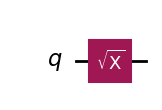

In [41]:
qcoin_sx = QuantumCircuit(1)
qcoin_sx.sx(0)

qcoin_sx.draw("mpl")

In [42]:
obs1 = Pauli("X")
obs2 = Pauli("Y")
obs3 = Pauli("Z")


# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qcoin_sx)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)


# Step 3: Run the circuit on a real quantum computer

estimator = Estimator(mode=backend)
pubs = [(qc_isa, [[obs1_isa], [obs2_isa], [obs3_isa]])]
job = estimator.run(pubs)
res = job.result()

# Step 4: Return the result in classical form, and analyze.

print(res[0].data.evs)

[[ 0.03212237]
 [-0.9932441 ]
 [ 0.01172721]]


In [44]:
# Run the job on the Aer simulator with noise model from real backend
sim_pubs = [(qc_isa, [[obs1_isa], [obs2_isa], [obs3_isa]])]
sim_job = estimator_sim.run(sim_pubs)
sim_res=sim_job.result()
print(sim_res[0].data.evs)

[[-0.01025391]
 [-0.96386719]
 [-0.00488281]]


The expectation values are 0, -1, and 0 for X, Y and Z, respectively.

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Given the expectation values, what are the probabilities of measuring the quantum coin to be heads up/down (or left/right or forward/back) for each of the 3 measurement axes?
  </summary>

  **Answer:**

  There is a 50/50 probability of measuring either state along X and Z, and the state is always measured in the -y direction along Y.
</details>

This is the same result we got with our thought experiment applying a "$\sqrt{\text{NOT}}$" 90-degree rotation on the classical coin. In fact, there is a precise analogy between the coin and the qubit state now. We can visualize the qubit state as a vector pointing in the direction of heads on a coin, normal to the surface of the coin. So, heads up, or the $|0\rangle$ state on a quantum coin, is equivalent to a vector pointing straight up; heads down, or $|1\rangle$, is pointing straight down. Any equal superposition of $|0\rangle$ and $|1\rangle$ points horizontally. The phase of the state determines the exact horizontal direction - the direction it points along the equator is equal to the direction the coefficient $c_2$ points in the complex plane.

Now, *every* gate that we've seen in this notebook can be visualized as a rotation (or series of rotations) of the coin/vector.

*   NOT: 180 degrees around the x-axis

*   $\sqrt{\text{NOT}}$: 90 degrees around the x-axis

*   PHASE: rotation of $\phi$ around z-axis

*   Hadamard: This one's a bit trickier. We initially likened it to flipping a coin, making the coin spin uncontrollably in the air. But the Hadamard is actually a controlled, deterministic rotation of the coin, like the other gates. The Hadamard is performed by rotating 90 degrees around the y-axis, then 180 degrees around the x-axis.

So, there's nothing random about a quantum superposition state or any of the standard operations we perform on the qubit. Every operation is deterministic and reversible. The only time randomness comes into play is when we decide to *measure* the quantum state.

### The qubit state as a Bloch vector

This vector that points in the direction of the coin's "head" is known as a "Bloch vector." Formally, an arbitrary (isolated) qubit state can be represented by a vector that lies on the surface of a sphere of radius 1 with coordinates $(r, \theta, \phi)$. Written in terms of these coordinates, the qubit state is:

$|\psi\rangle = \cos{\frac{\theta}{2}} |0\rangle + e^{i \phi} \sin{\frac{\theta}{2}} |1\rangle$

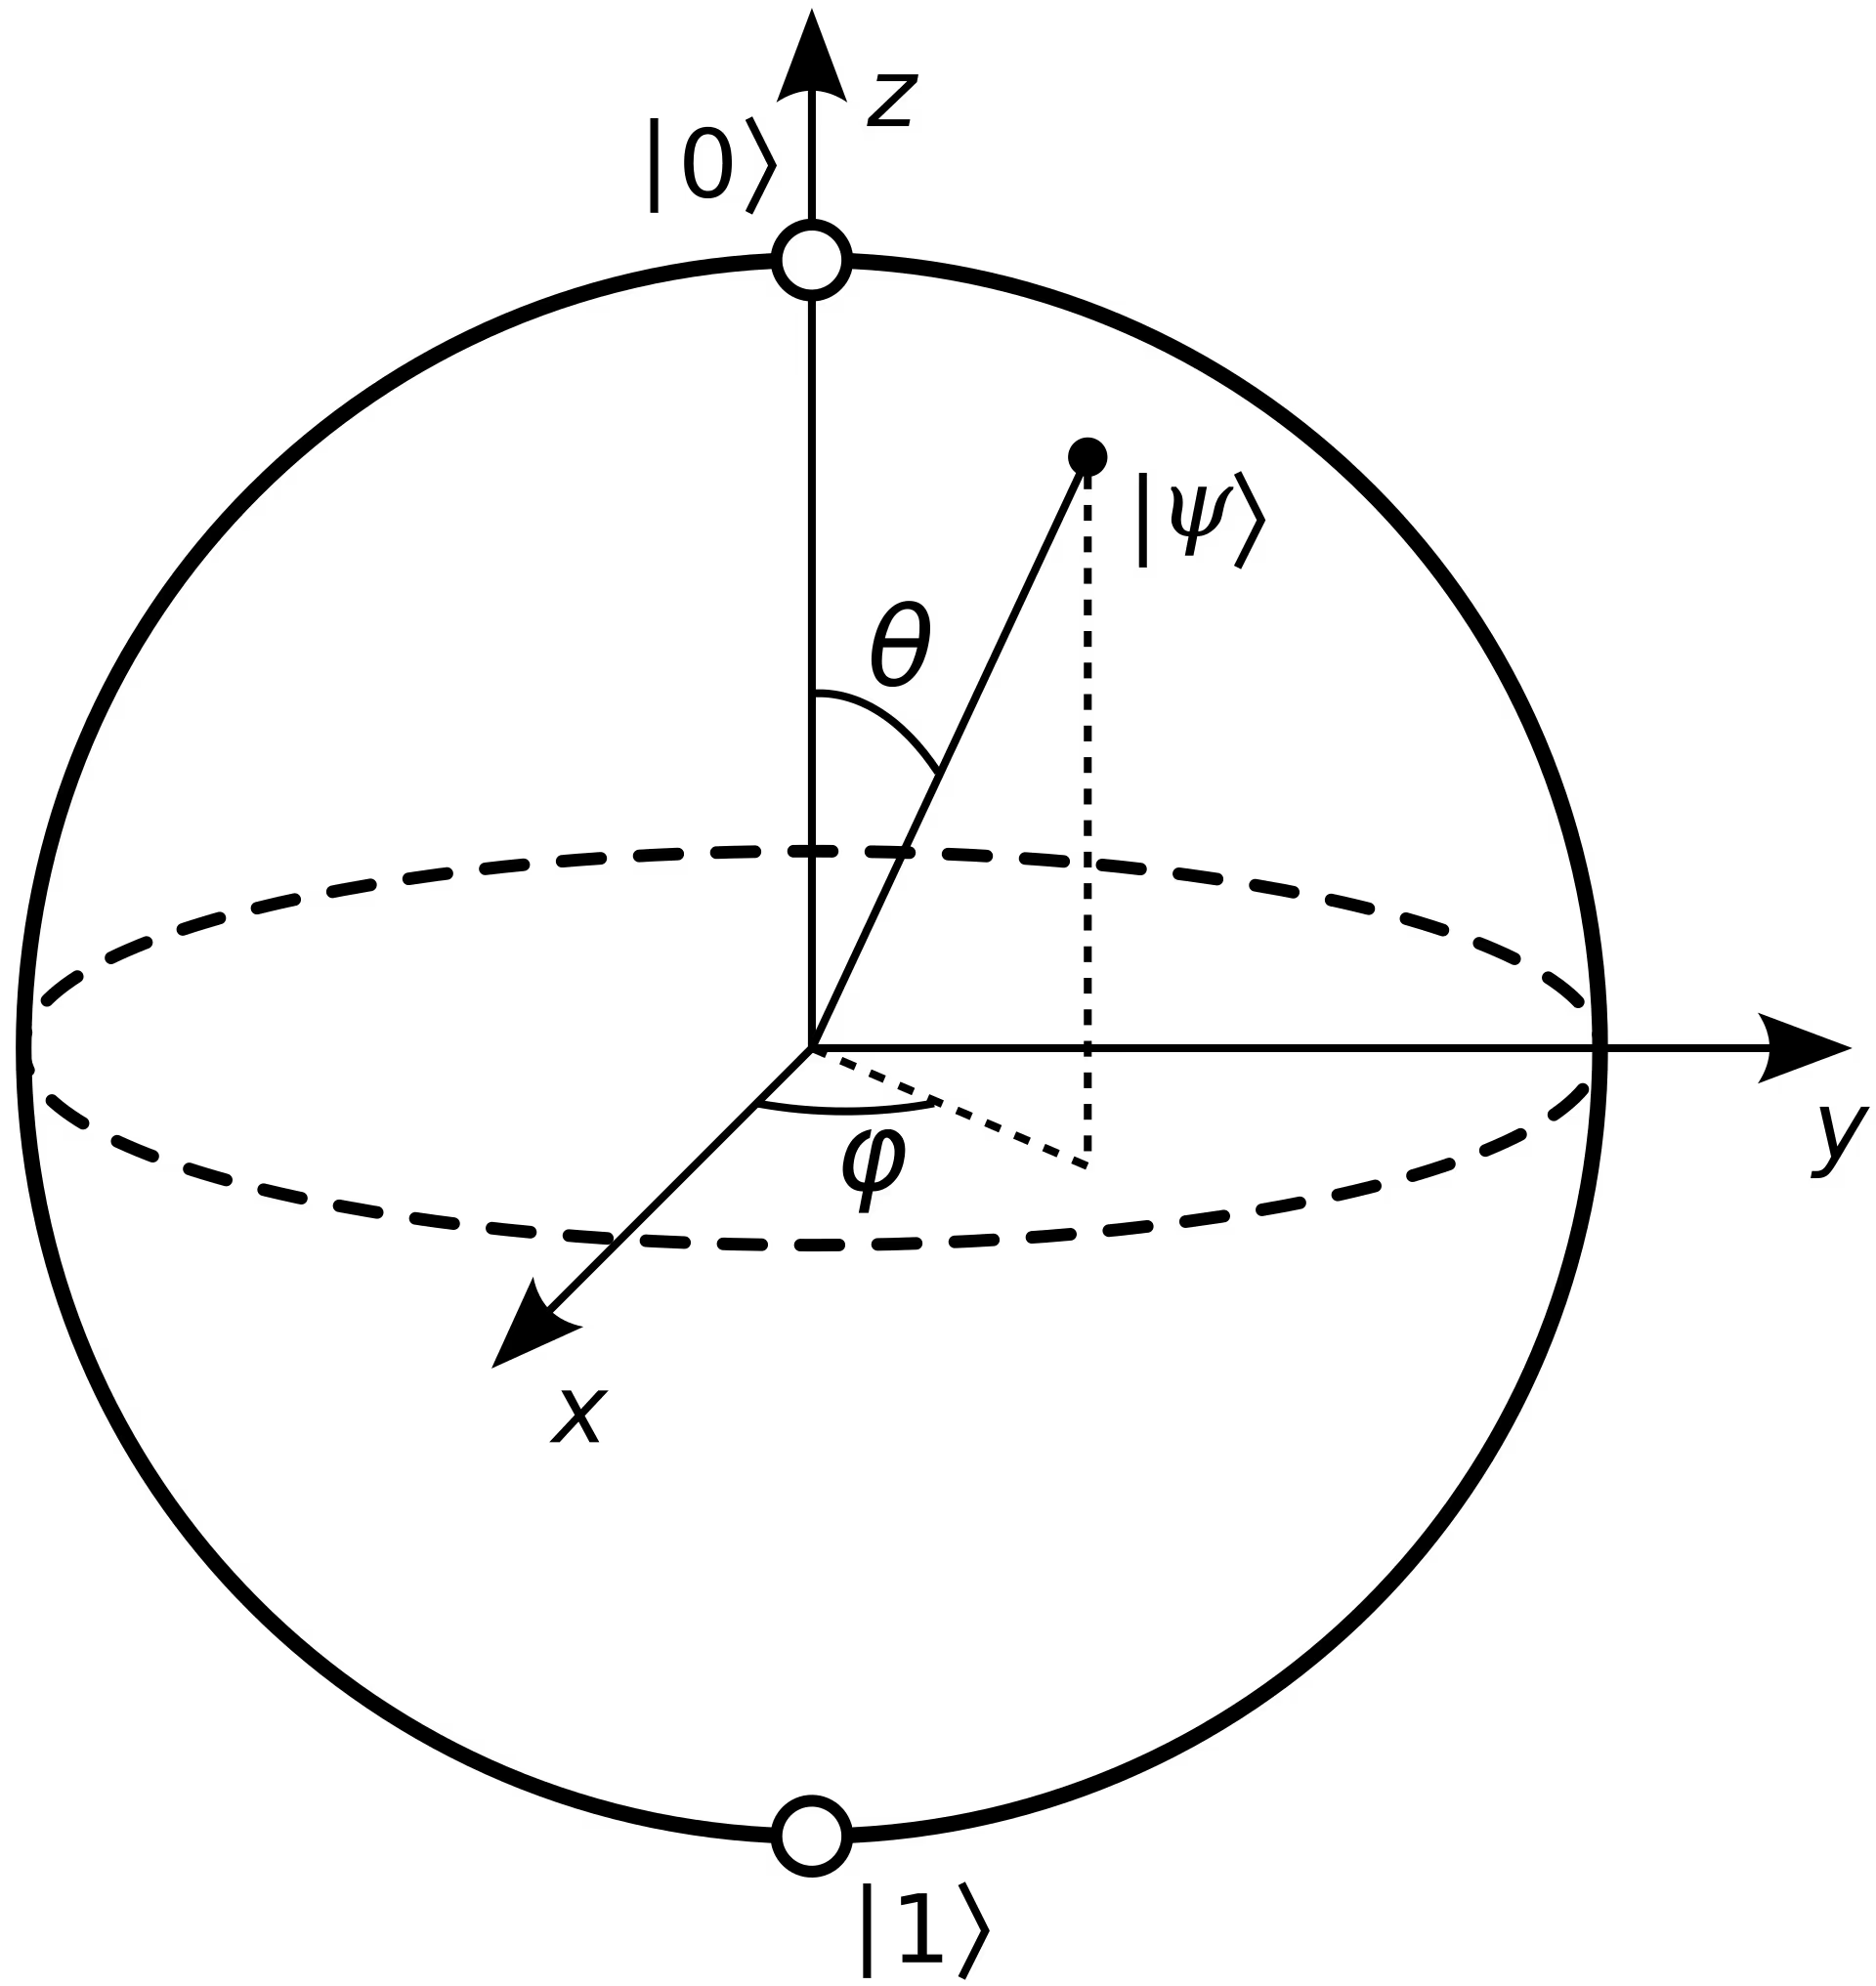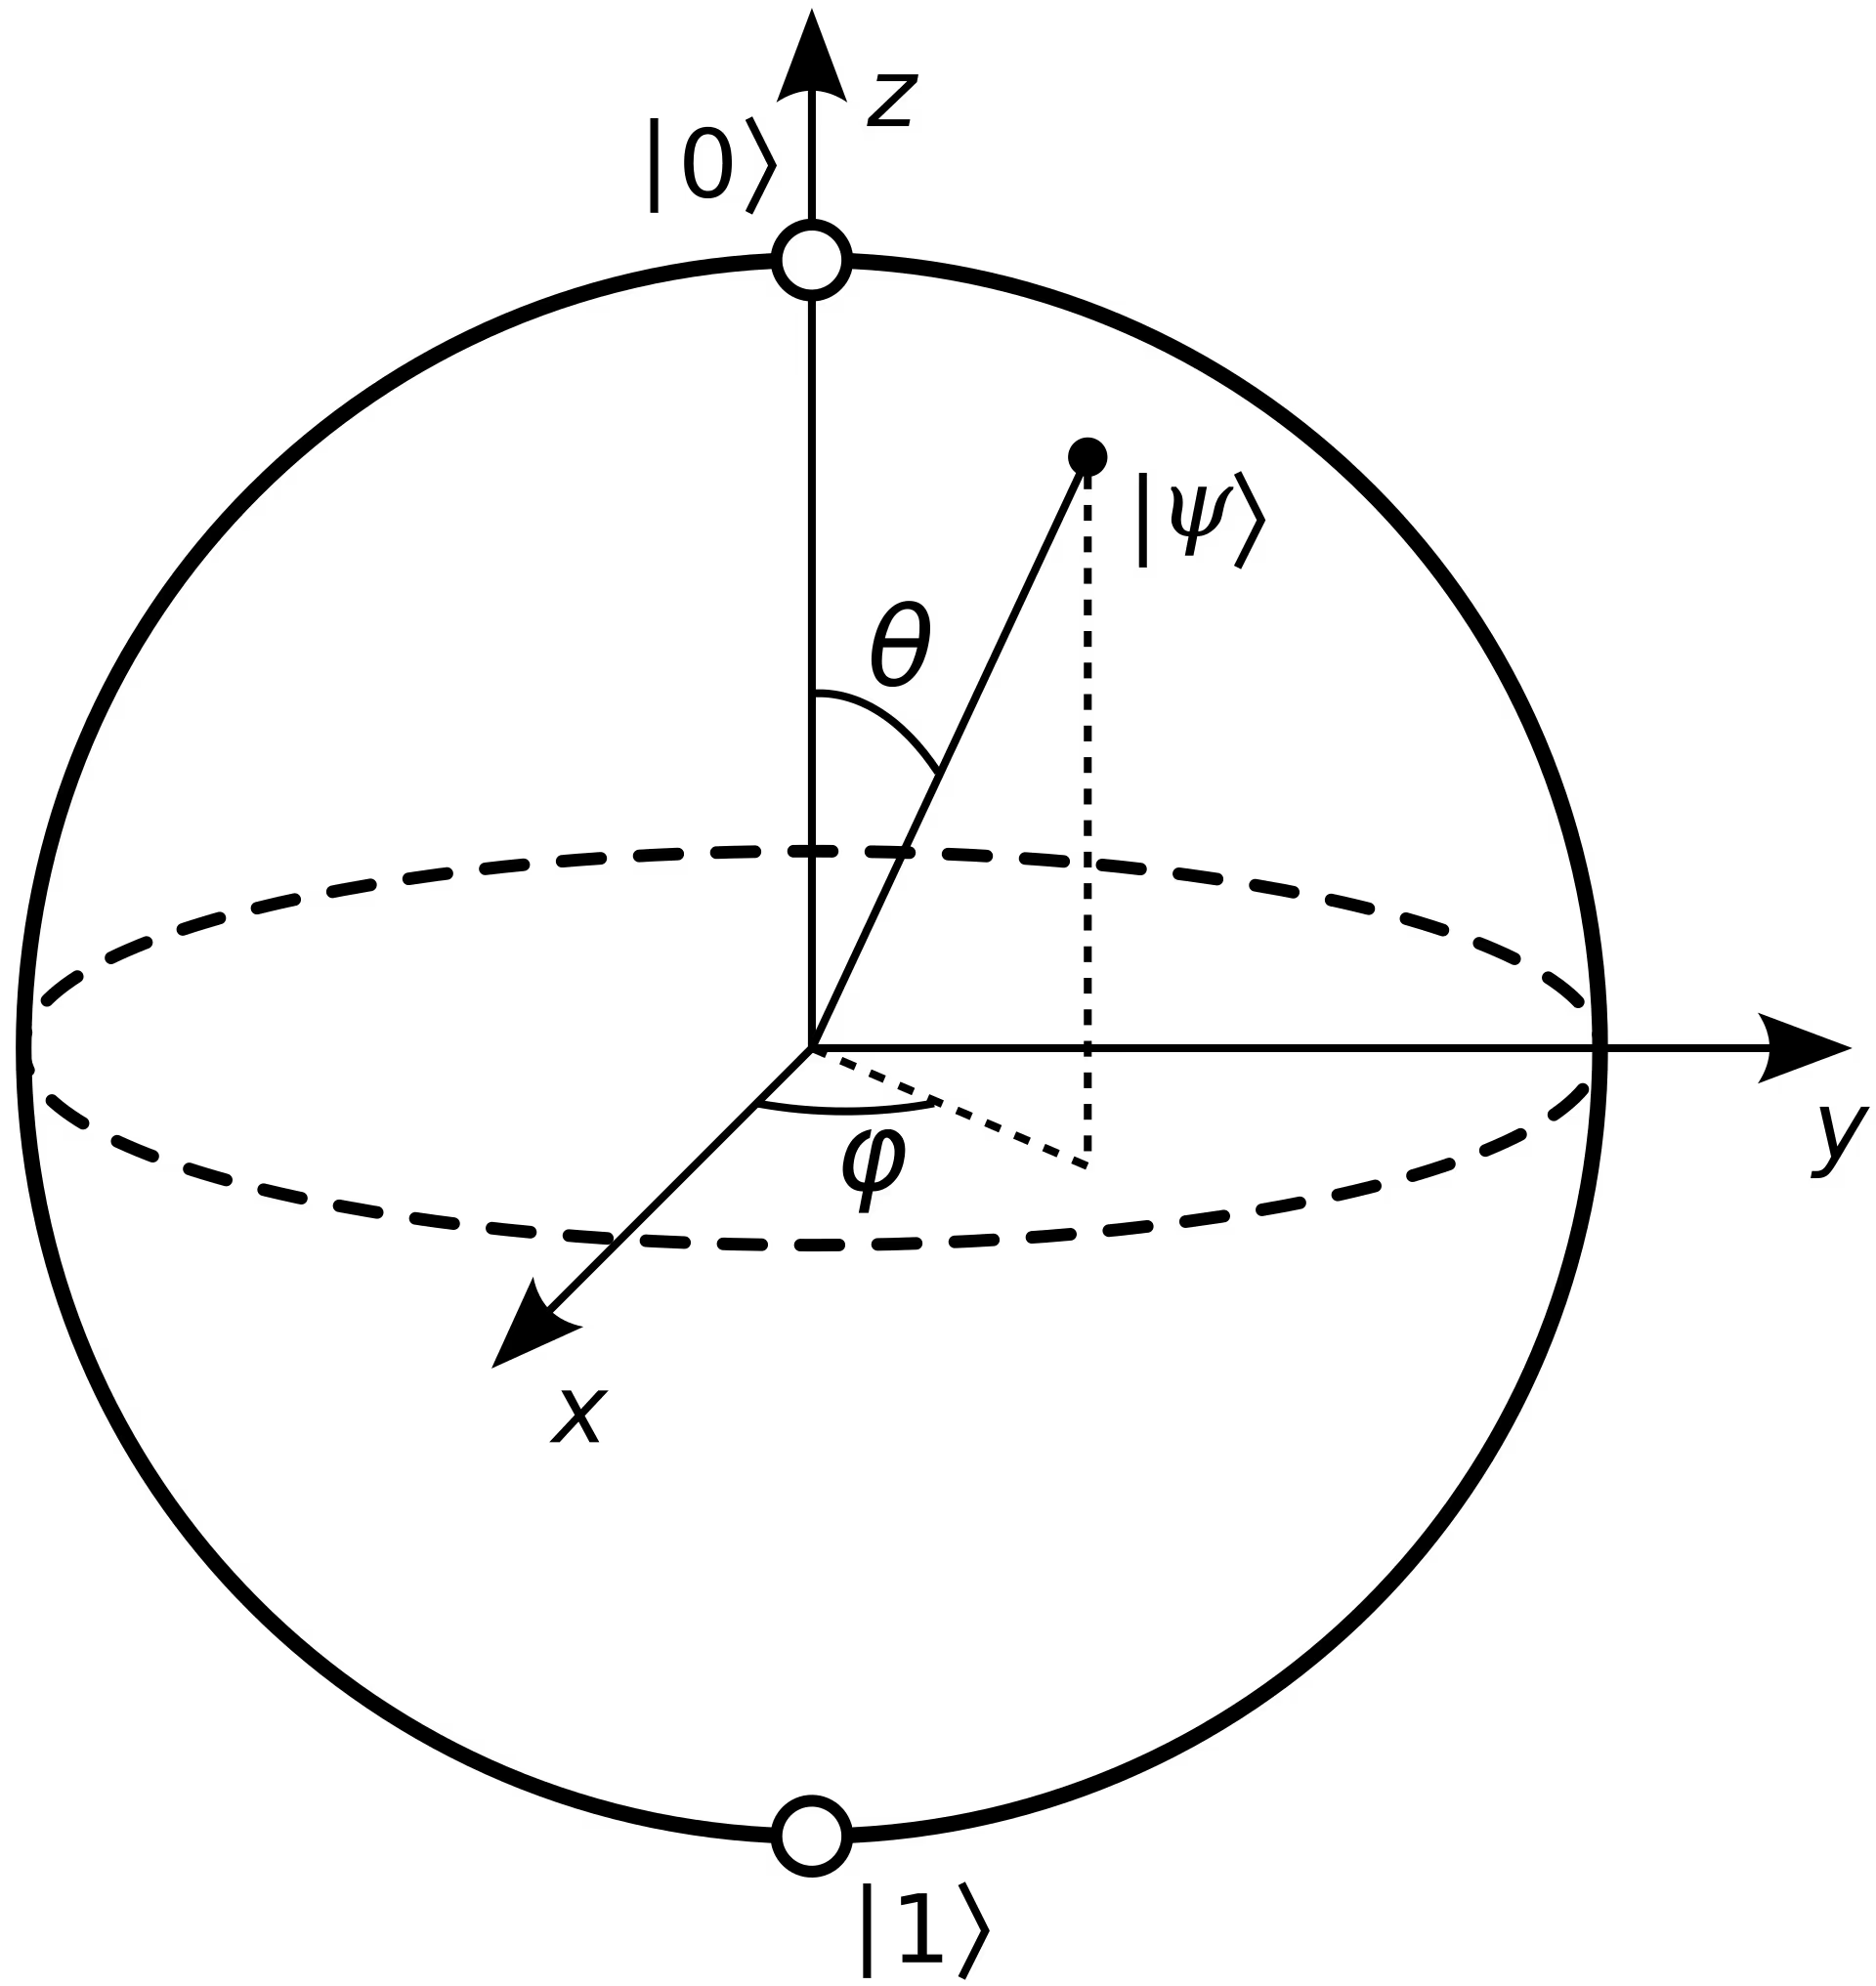

Now let's check with Qiskit about how the Bloch vector changes when we apply various gates to our qubit starting from the $|0\rangle$ state.

#### NOT



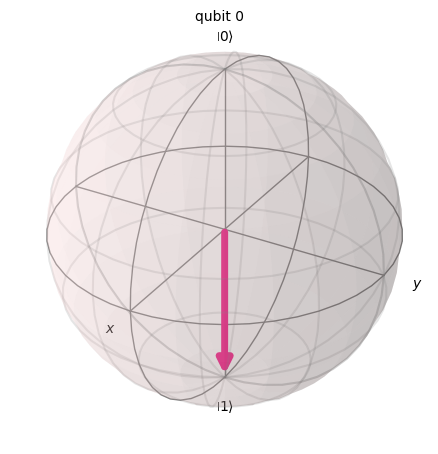

In [45]:
from qiskit.visualization import plot_bloch_multivector

qnot = QuantumCircuit(1)
qnot.x(0)

plot_bloch_multivector(qnot)

#### $\sqrt{\text{NOT}}$



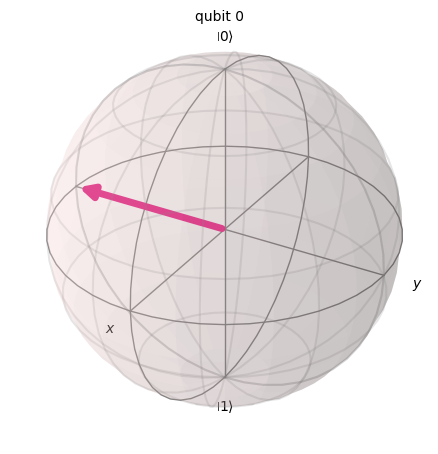

In [46]:
qsqrtnot = QuantumCircuit(1)
qsqrtnot.sx(0)

plot_bloch_multivector(qsqrtnot)

#### PHASE ($\phi = \pi$)



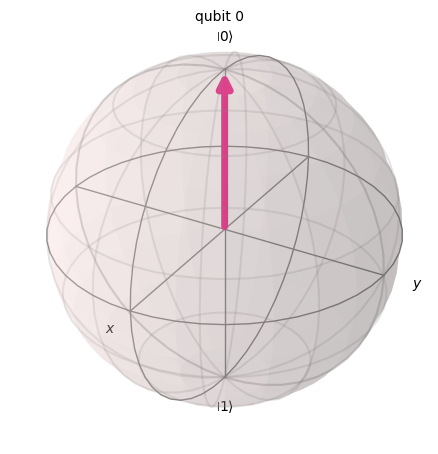

In [47]:
qphase = QuantumCircuit(1)
qphase.p(np.pi, 0)

plot_bloch_multivector(qphase)

#### Hadamard



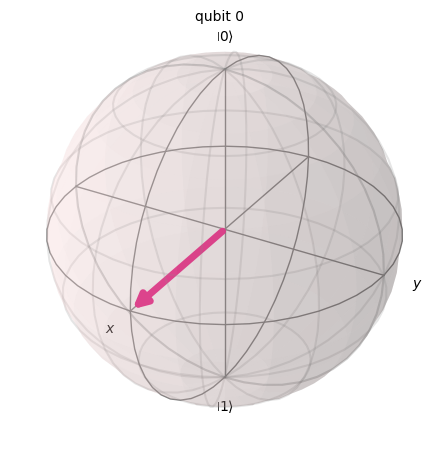

In [48]:
qhadamard = QuantumCircuit(1)
qhadamard.h(0)

plot_bloch_multivector(qhadamard)

## Conclusion - so what *is* a superposition state?

We started this module comparing the randomness of measuring a quantum superposition state to a coin flip. We likened the "Hadamard gate" that produces a quantum superposition to the act of flipping a coin. But, through a series of experiments, we learned that there are fundamental differences between a classical coin flip and a quantum superposition.

We learned that there is actually nothing "random" about a qubit in a superposition state. It is like a coin sitting still in three-dimensional space. In fact, a coin that is free to rotate in 3 dimensions is a very close analogy to a particular way to visualize the quantum state of a qubit, called the Bloch vector. Quantum gates rotate this coin/Bloch vector deterministically and reversibly. It is only when we **measure** the qubit that any randomness is introduced. We compared this measurement process to squashing the coin so that it lies flat in the direction of the measurement axis.

Whether a quantum state is even in a superposition is really just in the eye of the beholder. As you've likely encountered before, we are free to choose our coordinate system - $x$, $y$, and $z$ can point along any three orthogonal directions. So, if we have a superposition of 0 and 1 in one coordinate system, we can define a new coordinate system - or equivalently, a new "measurement basis" - in which the state is pointing purely in the $+z$ direction, and therefore not in a superposition state. So, when we say a qubit is in a superposition, we must also answer the question, "superposition of *what*?"

You may leave this module with the impression that we've just removed all the mystery from quantum mechanics. After all, one of the supposedly "weirdest" aspects, the superposition state of a qubit, is really just as simple as a three-dimensional vector. But keep in mind that the coin is still only an analogy, and even the Bloch vector is only a visualization tool to calculate probabilities of measurement outcomes. We can’t say what a quantum state is *really* doing before it's measured. Because, checking that requires a measurement!

We will discuss this conundrum of what is the “true” nature of a quantum state, how the quantum phenomenon of entanglement can help us elucidate this, in the Bell's Inequality module.



## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts:

*   While the measurement of a qubit in a superposition is probabilistic, like flipping a coin, the superposition state itself behaves differently than a flipping coin.
*   A main difference between a classical probability distribution and a superposition is that the superposition has *phase* coherence, which allows it to interfere constructively or destructively.
*   The state of a single, isolated qubit can be visualized as a point on the so-called "Bloch sphere," where the relative amplitudes of the $|0\rangle$ and $|1\rangle$ components determine the polar angle $\theta$ and the relative phases between the two components determine the azimuthal angle $\phi$.
*   All single-qubit quantum gates can be viewed as rotations of the vector on this sphere.

### T/F questions:

1.  T/F A quantum superposition is basically the same as a probabilistic event in classical physics, like flipping a coin.

F


2.  T/F The length of the Bloch vector describing the state of a single isolated qubit is always 1.

T


3.  T/F Single-qubit quantum gates do not change the length of the Bloch vector.

T


### MC questions:

1.  Select the correct Bloch vector that represents the state $|\Psi\rangle = \sqrt{\frac{1}{3}}|0\rangle + e^{i \pi / 4} \sqrt{\frac{2}{3}}|1\rangle$ :

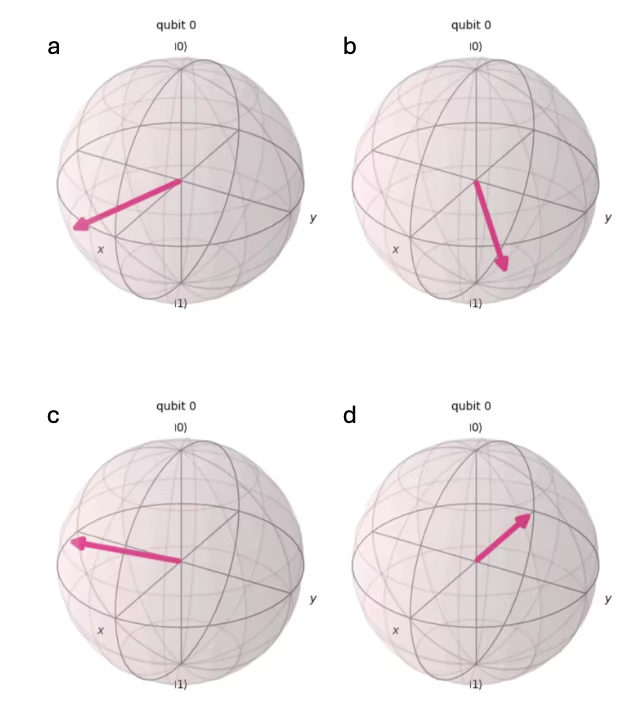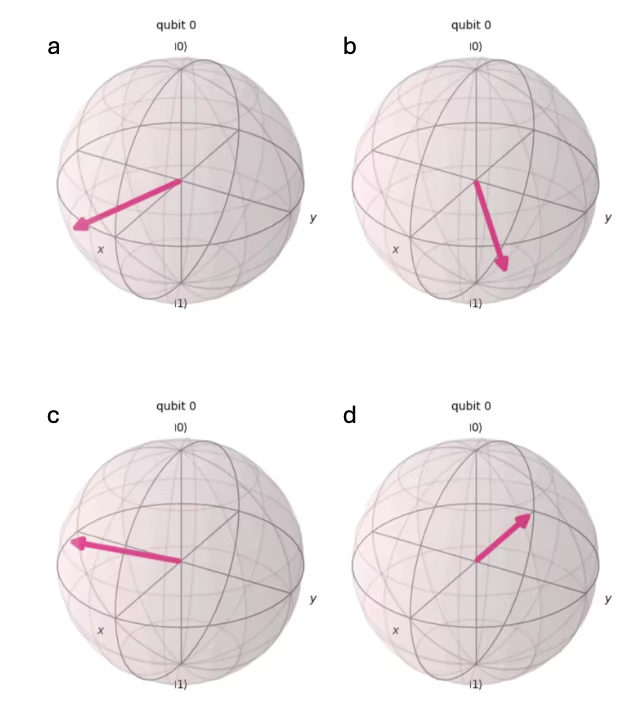

b seems to be the correct one.

2.  The Bloch sphere describes a qubit's:
    (select all that apply)

    a. amplitude

    b. entanglement with other qubits

    c. phase

    d. color

    e. probability of measurement outcomes

### a. Amplitude - YES

The Bloch sphere encodes the amplitudes of |0⟩ and |1⟩ through the polar angle θ.

A general qubit state:
$$|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle$$

The θ angle determines how the amplitude is split between the two basis states.

---

### b. Entanglement with other qubits - NO

The Bloch sphere **only represents single qubit states**. 

Entanglement is a multi-qubit property that cannot be captured by a single Bloch sphere. Entangled states cannot be factorized into individual qubit representations.

Example: The Bell state $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ cannot be represented on individual Bloch spheres.

---

### c. Phase - YES

The azimuthal angle φ around the z-axis represents the **relative phase** between |0⟩ and |1⟩.

This is the phase we manipulated with Rz(θ) in the previous problem to change measurement probabilities.

---

### d. Color - NO

Color is not a physical property of qubits. (Though we may use colors in visualizations!)

---

### e. Probability of measurement outcomes - YES

The position on the Bloch sphere directly determines measurement probabilities:

**From the polar angle θ:**
- $P(|0\rangle) = \cos^2(\theta/2)$
- $P(|1\rangle) = \sin^2(\theta/2)$

**From the z-coordinate:**
- $z = \cos\theta = \langle Z \rangle = P(|0\rangle) - P(|1\rangle)$

**Examples:**
- North pole (θ=0): P(|0⟩)=1, P(|1⟩)=0
- South pole (θ=π): P(|0⟩)=0, P(|1⟩)=1  
- Equator (θ=π/2): P(|0⟩)=0.5, P(|1⟩)=0.5

---

so, a, c, e 



### Discussion questions:

1.  Why can the state of a qubit be visualized on the Bloch sphere, but the probability distribution of a coin flip cannot?

Bloch sphere is a illustration of the quantum coin, waiting to be fliped. The probability distribution will be the result of mulipule trails of measurements, which will be the collection of collapsed states. Bloch sphere does not fit into this situation.

3.  Why is a coin flipping in the air not the best analogy to a quantum superposition state? What aspect of superpositions are not captured in this analogy?

## Why a Flipping Coin is NOT a Good Analogy for Quantum Superposition

### The Key Difference

**Classical coin in the air:**
- The coin IS either heads or tails at every moment - we just don't know which

**Quantum superposition:**
- The qubit genuinely exists in BOTH states simultaneously until measured
- This is **ontological** - a fundamental feature of reality
- The state is |ψ⟩ = α|0⟩ + β|1⟩, not "either |0⟩ or |1⟩"

---

### What the Coin Analogy Misses

#### 1. **Quantum Interference**

The most important missing aspect is **interference**.

**With quantum superposition:**
- States can interfere constructively or destructively
- Example from our H-Rz(θ)-H circuit:
  - The phase rotation changed measurement probabilities from 50/50 to 25/75
  - This happened because the amplitudes interfered differently based on phase

$$|\psi\rangle = \frac{1}{2}[(1 + e^{i\theta})|0\rangle + (1 - e^{i\theta})|1\rangle]$$

- The terms $(1 + e^{i\theta})$ and $(1 - e^{i\theta})$ show interference
- When θ = 2π/3, the |0⟩ amplitude interferes destructively, reducing P(|0⟩) to 0.25

**With classical probability:**
- Probabilities just add - no interference
- A coin can't "interfere with itself"
- You can't manipulate a coin's "phase" to change the 50/50 odds

---

#### 2. **Phase Relationships Matter**

**Quantum:**
- The relative phase between amplitudes is physical and measurable
- States |+⟩ = (|0⟩ + |1⟩)/√2 and |-⟩ = (|0⟩ - |1⟩)/√2 have same probabilities but are different states
- Phase affects interference patterns

**Classical:**
- No concept of "phase" for probabilities
- Heads with 50% probability is just heads with 50% probability

---

#### 3. **Measurement Creates Reality**

**Quantum:**
- Before measurement: truly in superposition (both states)
- Measurement forces the system to "choose" a definite state
- The act of measurement fundamentally changes the state

**Classical:**
- Before observation: already in a definite state
- Observation just reveals the pre-existing state
- Looking at the coin doesn't change what it is

---

### A Better Analogy

**Wave interference** is a better classical analogy:
- Two water waves can constructively or destructively interfere
- The interference pattern depends on their relative phase
- But even this is imperfect because waves are still classical

---

## Summary

The coin analogy fails because it treats quantum superposition as **"we don't know which"** when it's actually **"genuinely both simultaneously."**

The critical missing aspect is **quantum interference** - the ability of superposition amplitudes to interfere based on their phase relationships, creating probabilities that have no classical explanation.

This is what makes quantum computing powerful: we can manipulate these interference patterns through gates to solve problems in ways impossible for classical systems.


### Challenge problems:

1.  Use Qiskit to create a circuit that transforms the state $|0\rangle$ to the state $\frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}e^{i \frac{5\pi}{6}}|1\rangle$



### Reflection: Key Takeaway

The critical difference revealed by measuring in the X-basis: a classical coin in a 50-50 mixture would give $\langle X \rangle = 0$, but the quantum coin in $|+\rangle$ gives $\langle X \rangle = 1$. This confirms the state has **phase coherence**, not just probabilistic uncertainty. This coherence is what enables interference in quantum algorithms.

## Creating a Specific Quantum State

**Goal:** Transform $|0\rangle$ to $|\psi\rangle = \frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}e^{i\frac{5\pi}{6}}|1\rangle$

---

### Step 1: Identify the Parameters

General single-qubit state form:
$$|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle$$

Compare with target state:
- $\cos(\theta/2) = \frac{\sqrt{3}}{2}$
- $e^{i\phi}\sin(\theta/2) = \frac{1}{2}e^{i\frac{5\pi}{6}}$

**Solve for θ:**
$$\cos(\theta/2) = \frac{\sqrt{3}}{2}$$
$$\theta/2 = \arccos\left(\frac{\sqrt{3}}{2}\right) = \frac{\pi}{6}$$
$$\theta = \frac{\pi}{3}$$

**Verify with sin:**
$$\sin(\theta/2) = \sin(\pi/6) = \frac{1}{2}$$

**Phase:**
$$\phi = \frac{5\pi}{6}$$

---

### Step 2: Circuit Implementation

**Method 1: Using Ry and Rz gates**

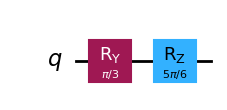

In [49]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create circuit
qc = QuantumCircuit(1)

# Apply Ry rotation for amplitude
qc.ry(np.pi/3, 0)

# Apply Rz rotation for phase
qc.rz(5*np.pi/6, 0)

# Display circuit
qc.draw('mpl')

In [54]:
# Varify the results
# Get the statevector
state = Statevector(qc)

# Display the state
print("Statevector:")
print(state)

# Verify the coefficients
print("\nCoefficients:")
print(f"|0⟩ coefficient: {state[0]}")
print(f"|1⟩ coefficient: {state[1]}")

# Check amplitudes
print(f"\n|0⟩ amplitude: {np.abs(state[0]):.4f} (expected: {np.sqrt(3)/2:.4f})")
print(f"|1⟩ amplitude: {np.abs(state[1]):.4f} (expected: 0.5000)")

# Check phase of |1⟩
phase = np.angle(state[1])
print(f"|1⟩ phase: {phase:.4f} radians (expected: {5*np.pi/6:.4f})")

Statevector:
Statevector([0.22414387-0.8365163j , 0.12940952+0.48296291j],
            dims=(2,))

Coefficients:
|0⟩ coefficient: (0.2241438680420134-0.8365163037378079j)
|1⟩ coefficient: (0.12940952255126034+0.4829629131445341j)

|0⟩ amplitude: 0.8660 (expected: 0.8660)
|1⟩ amplitude: 0.5000 (expected: 0.5000)
|1⟩ phase: 1.3090 radians (expected: 2.6180)


### The Key Insight: Relative Phase vs Absolute Phase

**What matters in quantum mechanics:** The **relative phase** between states, not absolute phases.

Calculate the phases:
- Phase of |0⟩: $\arg(0.224-0.836j) = \arctan(-0.836/0.224) \approx -1.309$ rad $\approx -\frac{5\pi}{12}$
- Phase of |1⟩: $\arg(0.129+0.483j) = \arctan(0.483/0.129) \approx 1.309$ rad $\approx \frac{5\pi}{12}$

**Relative phase:**
$$\phi_{relative} = 1.309 - (-1.309) = 2.618 \text{ rad} \approx \frac{5\pi}{6}$$ 

It's just multiplied by a global phase $e^{-i5\pi/12}$

### Why This Happens

The Rz gate is defined as:
$$R_z(\phi) = \begin{pmatrix} e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2} \end{pmatrix}$$

After Ry(π/3) + Rz(5π/6):
$$e^{-i5\pi/12}\left[\frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}e^{i5\pi/6}|1\rangle\right]$$

This has the correct relative phase, just with a global phase factor $e^{-i5\pi/12}$ that shifts everything.

so, what we could do is to add a gloable phase adjustment:

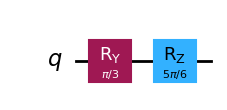

In [55]:
# Create circuit
qc2 = QuantumCircuit(1)

# Apply Ry rotation for amplitude
qc2.ry(np.pi/3, 0)

# Apply Rz rotation for phase
qc2.rz(5*np.pi/6, 0)

# Compensate for the global phase
qc2.global_phase = 5*np.pi/12  

# Display circuit
qc.draw('mpl')

In [56]:
# Varify the results
# Get the statevector
state = Statevector(qc2)

# Display the state
print("Statevector:")
print(state)

# Verify the coefficients
print("\nCoefficients:")
print(f"|0⟩ coefficient: {state[0]}")
print(f"|1⟩ coefficient: {state[1]}")

# Check amplitudes
print(f"\n|0⟩ amplitude: {np.abs(state[0]):.4f} (expected: {np.sqrt(3)/2:.4f})")
print(f"|1⟩ amplitude: {np.abs(state[1]):.4f} (expected: 0.5000)")

# Check phase of |1⟩
phase = np.angle(state[1])
print(f"|1⟩ phase: {phase:.4f} radians (expected: {5*np.pi/6:.4f})")

Statevector:
Statevector([ 0.8660254-2.47944559e-17j, -0.4330127+2.50000000e-01j],
            dims=(2,))

Coefficients:
|0⟩ coefficient: (0.8660254037844387-2.4794455854755286e-17j)
|1⟩ coefficient: (-0.4330127018922193+0.24999999999999994j)

|0⟩ amplitude: 0.8660 (expected: 0.8660)
|1⟩ amplitude: 0.5000 (expected: 0.5000)
|1⟩ phase: 2.6180 radians (expected: 2.6180)


Now the phase is correct.

# Tutorial 2: The Stern-Gerlach experiment using quantum computers


## Background

Regardless of the type of angular momentum, a charge with angular momentum has a magnetic moment. In the classical treatment of orbital motion, one would expect a particle of charge $q$, mass $m$ and angular momentum $\vec{L}$ to have a magnetic moment $\mu$ given by

$$
\vec{\mu} = \frac{q}{2m}\vec{L}
$$

It turns out that almost the same formula holds for quantum mechanical angular momentum, with the caveat of adding a numerical ratio related to the type of angular momentum, called the g-factor $g$. When combining different types of angular momentum, or generalizing to an arbitrary type, one often sees $\vec{J}$ used instead of $\vec{L}$, so we write:

$$
\vec{\mu} = \frac{gq}{2m}\vec{J}
$$

For classical objects $g=1$. For electrons, $g\approx 2$, and there are many values for various nuclei and subatomic particles. The main point here is that quantized angular momentum means a quantized magnetic moment!

This magnetic moment will experience a torque in a magnetic field:

$$
\vec{\tau}=\vec{\mu}\times \vec{B}
$$

And it will experience a force in a magnetic field with a non-zero gradient:

$$
\vec{F} = \nabla(\vec{\mu}\cdot\vec{B})
$$

We will often consider the above expression one component at a time, so it may be convenient to think of its $z$-component:

$$
F_z = \mu_z \frac{dB_z}{dz}
$$

Combining expressions, we can obtain

$$
F_z = \frac{gq}{2m} \frac{dB_z}{dz} J_z
$$

### What should we expect, classically?

How would these atoms behave if they were exactly like bulky, classical magnets? You can do the experiment. Imagine firing tiny neodymium magnets past a large, powerful magnet. The orientation of the tiny magnets is random. But as they pass the large magnet, they quickly re-orient themselves to align with the field, and become attracted to the large magnet. The vast majority of tiny magnets are deflected toward the large magnet. The very astute observer might question, "What about energy conservation?"

Indeed, a magnetic moment in an external magnetic field has a potential energy associated with it:

$$
U = -\vec{\mu}\cdot \vec{B} = -\mu B \cos(\theta)
$$

So, if a magnetic moment were to rotate in the external magnetic field, there would be a change in energy given by:

$$
\Delta U = U_f - U_i = -\mu B (\cos(\theta_f) - \cos(\theta_i)).
$$

In the special case of a small magnet perfectly anti-aligned with the external field flipping over and aligning with it, this would correspond to a decrease in potential energy:

$$
\Delta U = U_f - U_i = -\mu B (\cos(0) - \cos(\pi)) = -2\mu B.
$$

So where does that energy go? A classical magnet like a small neodymium refrigerator magnet has many particles and can dissipate almost any quantity of energy as heat. The initial and final angles between the magnetic moment and the external magnetic field could be anything, and at least the initial orientation would be random. So a different amount of energy would be dissipated as heat for each tiny magnet. But classically this is no problem, since an ensemble of classical particles can dissipate any amount of energy as heat.

### What should we expect applying classical thinking to atomic scales?

At the very least this is not the same for atomic-scale magnets, because there are fewer particles in play, fewer degrees of freedom through which energy may be dissipated. The proposals of early quantum mechanics suggested further that the energy that can be absorbed by an individual particle, such as the electron, would be quantized, meaning an electron could only absorb a few specific amounts of energy. Since the random initial orientations would require the dissipation of random amounts of energy, this should not be possible for a system with quantized energy levels. The excess energy could not be dissipated as heat. So what would happen instead?

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    Explain what you think would happen in a situation like that described above. That is, you have an atomically small magnet that cannot dissipate any energy as heat. So, any initial magnetic potential energy must remain in the system. Yet, a torque is applied by an external magnetic field, which attempts to rotate the small magnet to align with the external field. What happens?
  </summary>

  **Answer:**

  The tiny magnetic moment would rotate toward alignment with the external field. But when it momentarily aligns, it would have rotational kinetic energy that would keep it rotating past the field and back out of alignment. This behavior can even be seen in large classical magnets. But in those classical systems, the oscillation of the small magnetic moment eventually stops as energy is dissipated into heat. But in a system with no such dissipative mechanism, the oscillation should continue indefinitely.
</details>

<details>
  <summary>
    Given the behavior expected in the answer above, what distribution of magnetic particles would you expect to see on the screen?
  </summary>

  **Answer:**

  A smooth distribution from some maximum deflection toward the stronger side of the magnetic field (those particles that happened to start out aligned with the external field) to some maximum deflection toward the weaker side of the field (those particles that started out anti-aligned with the external field), and every deflection in between, corresponding to every initial orientation between those extrema.

  ![Diagram of a beam of particles passing through a magnet. They are deflected to varying degrees along the direction of the magnetic field. So when they strike a distant screen they form a line.](/learning/images/modules/quantum-mechanics/stern-gerlach-measurements-with-qiskit/sg-classical.avif)
</details>

### What would quantum mechanics predict?

Perhaps the strangest of all possibilities would be the following: What if the angular momentum of the electron were quantized, but also its projection on some axis were also quantized? The quantization of angular momentum as a magnitude is interesting, but one might try to argue through it using classical intuition, the way planetary orbits settled into fixed paths that don't cross each other, having only certain allowed angular momenta. But what if that angular momentum vector could only point exactly along $z$ or exactly opposite $z$, but not have any other component along $z$? What if then when measured along a different direction, the vector could only point entirely along $x$ or entirely opposite $x$, and nothing in between? That would be strange in a way that confounds all classical intuition.

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

    What sort of distribution of particles on a screen would you expect to find in this last case, where the projection of angular momentum along the direction of the field is quantized? Feel free to consider only particles that pass perfectly through the center of the device, or include those that veer slightly off center to where the gradient is weaker. Just be explicit.

If as mentioned, the quantized magnetic moment will lead to a quantized change in energy, the particles will distributed not as a continues trace, but as a quantized position (dots).

## First experiment: A single measurement

In this first experiment and throughout the module, we will use a framework for quantum computing known as "Qiskit patterns", which breaks workflows into the following steps:

*   Step 1: Map classical inputs to a quantum problem
*   Step 2: Optimize problem for quantum execution
*   Step 3: Execute using Qiskit Runtime Primitives
*   Step 4: Post-processing and classical analysis

We will generally follow these steps, though we may not always explicitly label them.

### Step 1: Map classical inputs to a quantum problem

Here, the classical inputs are orientations of a spin prior to measurement in a Stern-Gerlach device. Don't worry too much about the exact nature of the quantum state prior to measurement. That is the subject of a different Qiskit Classrooms module, on Bell's theorem.

Note that IBM quantum computers measure states along the $z$ axis. So this first experiment will be very much like the Stern-Gerlach experiment with the magnetic field gradient along $z$. We will see how to change the system to measure along different directions, later.

Let's begin by making the analog of a spin state, that is, some mixture of $|\uparrow\rangle$ and $|\downarrow\rangle$ or equivalently of $|0\rangle$ and $|1\rangle$. We have proposed some initial values. But feel free to play with other values or even random values.



In [68]:
import random
from numpy import pi
import numpy as np

# Use these lines to choose your own arbitrary state vector and normalize it.
# a = 2
# b = (1+1j)
# norm = np.sqrt(a*np.conjugate(a)+b*np.conjugate(b))
# a = a/norm
# b = b/norm
# print(a,b)

# Use these lines if you would rather look at at random spin orientations.
a = random.random()
b = random.random()
norm = np.sqrt(a * np.conjugate(a) + b * np.conjugate(b))
a = a / norm
b = b / norm
print(a, b)

0.6521585467014857 0.7580826010166744


Now we will use the angles above as parameters in a quantum circuit. We are considering only one particle at a time, so we will use only one qubit in our circuit, and we will require only one classical register.

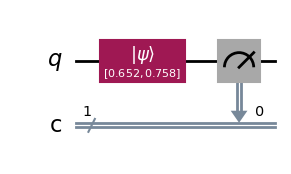

In [69]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the quantum state
qc.initialize([a, b])
qc.measure(0, 0)
qc.draw("mpl")

### Step 2: Optimize problem for quantum execution

To run our experiment on a real quantum computer, we need to load Qiskit Runtime Service, and select a quantum computer (or a "backend"). Below, we simply select the least busy quantum computer available to us.


In [60]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Syntax for specifying a channel and instance (if you need to change from the default set above)
# service = QiskitRuntimeService(channel='<channel name here>', instance="<your instance name here>")

# Load saved credentials
service = QiskitRuntimeService()

management.get:WARNING:2025-10-22 20:22:11,738: Loading default saved account


In [61]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

# Use the least busy backend, specify options as needed
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)
backend = service.least_busy()
print(backend.name)

ibm_torino


We now must transpiled the circuit, meaning we must map our circuit onto the base gates available to our chosen quantum computer, and we want to optimize our circuit for running on that quantum computer.



In [62]:
# Transpile the circuit and optimize for running on the quantum computer selected
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
qc_ibm = pm.run(qc)

### Step 3: Execute using Qiskit Runtime Primitives

Now we want to run this on a real quantum computer. All the necessary syntax for that is in the code block below. If you have exhausted your allotted time on real quantum computers, or if you are without an internet connection, you can uncomment the next code block, which will run the code on a local simulator.



In [ ]:
# Specify that we want to use only a single shot, to represent a single measurement of a spin in a SG device.
# num_shots = 1

# Evaluate the problem using a QPU via Qiskit IBM Runtime
# The best practice is to use a session as shown below. This is available to Premium Plan, Flex Plan, and On-Prem (IBM Quantum Platform API) Plan users.
# with Session(backend=backend) as session:
#     sampler = Sampler(mode=session)
#     dist = sampler.run([qc_ibm], shots=num_shots).result()
# session.close()
# counts = dist[0].data.c.get_counts()

# Open users can still carry out this experiment, but without making use of a session, meaning repeated queuing is possible.
# from qiskit_ibm_runtime import Batch,
# batch = Batch(backend=backend)
# sampler = Sampler(mode=batch)
# dist = sampler.run([qc_ibm], shots=num_shots).result()
# Close the batch because no context manager was used.
# batch.close()
# counts = dist[0].data.c.get_counts()

Use the code below if you are unable to run the experiment on a real quantum computer.



In [70]:
# This uses a local simulator
from qiskit_aer import AerSimulator

# This generates a simulator that mimics the real quantum system
backend_sim = AerSimulator.from_backend(backend)

# Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSamplerV2
sampler = BackendSamplerV2(backend = backend_sim)

num_shots = 1

# This runs the job
dist = sampler.run([qc_ibm], shots = num_shots).result()

# This selects measurement counts for the 0th circuit, which in this case is the only circuit
counts=dist[0].data.c.get_counts()

counts =  {'1': 1}


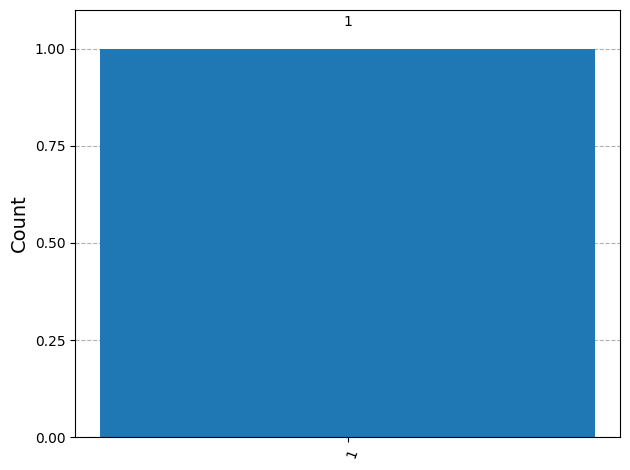

In [71]:
from qiskit.visualization import plot_histogram

print("counts = ", counts)
plot_histogram(counts)

We made one measurement and obtained "1". This is no surprise for us. We know we are using a quantum computer composed of qubits and we're very accustomed to classical bits returning a 0 or a 1. But keep in mind: this is the quantum computing analog of the experiments done with particles with magnetic moments. If we had expected an even spread between 0 and +1, it might indeed have surprised us that we obtained one extremum on our first measurement. It is this surprising quantization of results in the Stern-Gerlach experiment that led us to a better understanding of nature, and that in turn helped us eventually build quantum computers.

Let's see what happens when we make an ensemble of measurements.


## Second experiment: Measuring many particles

To gather statistics on many such measurements, we don't need to repeat steps 1 & 2. We can simply increase the number of shots in our experiment. Feel free to play with the number of shots in the instance of step 3 below.



In [79]:
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

num_shots = 100

# Evaluate the problem using a QPU via Qiskit IBM Runtime
# Open users can still carry out this experiment, but without making use of a session, meaning repeated queuing is possible.
from qiskit_ibm_runtime import Batch
batch = Batch(backend=backend)
sampler = Sampler(mode=batch)
dist = sampler.run([qc_ibm], shots=num_shots).result()
# Close the batch because no context manager was used.
batch.close()
counts = dist[0].data.c.get_counts()

As before, if you are unable to run on a real quantum computer, uncomment the block above from the first experiment, and simply change `num_shots = 1` to `num_shots = 100` or more.



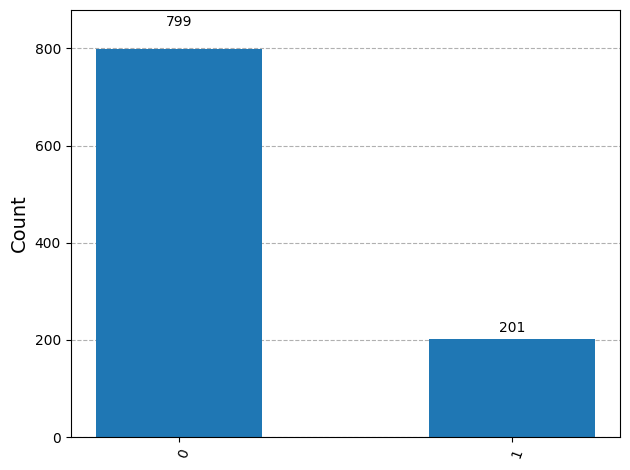

In [75]:
plot_histogram(counts)


## Third experiment: Random spins in an oven

In the Stern-Gerlach experiment, the researchers didn't get to specify an angle at which an angular momentum vector would emerge from the oven. The orientations were random (or something even more mysterious! See the Qiskit Classroom module on Bell's theorem). A reasonable analog of that experiment would be for us to randomly initialize the states of our qubit and make measurements many times.

### Step 1: Map classical inputs to a quantum problem

The circuit we want to construct is the same as before. The only difference is that this time, we will construct the circuit using gates with free parameters $\theta$ and $\phi$. Numerical values for those parameters will then be assigned for each new run.



<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\jackz\AppData\Local\Temp\ipykernel_122832\397465154.py:4: SyntaxWarning: invalid escape sequence '\p'
  phi = Parameter("$\phi$")


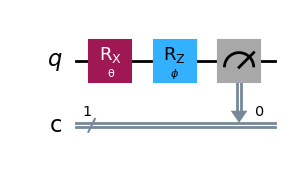

In [80]:
# from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter("θ")
phi = Parameter("$\phi$")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Add rotation gates for rotating the state of qubit 0 to random orientations
qc.rx(theta, 0)
qc.rz(phi, 0)
qc.measure(0, 0)

qc.draw("mpl")

In [81]:
# This uses a local simulator
from qiskit_aer import AerSimulator

# Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSamplerV2

# This generates a simulator that mimics the real quantum system
backend_sim = AerSimulator.from_backend(backend)
sampler_sim = BackendSamplerV2(backend=backend_sim)

# from qiskit.primitives import BackendSamplerV2
# sampler = BackendSamplerV2(backend=backend)

In [82]:
# A list to store the accumulated probabilities of the two possible measurement outcomes.
probslist = {"0": 0.0, "1": 0.0}

# Choose how many "particles"/measurements
measurements = 100
num_shots = 1

for i in range(measurements):
    # Assign a random orientation for each measurement
    phi = random.random() * 2 * pi
    theta = random.random() * 2 * pi

    angles = [phi, theta]
    circuit = qc.assign_parameters(angles)
    qc_ibm = pm.run(circuit)

    # Run the circuit
    # job = sampler.run([circuit],num_shots = 1)
    dist = sampler_sim.run([qc_ibm], shots=num_shots).result()

    # Update the list of probabilities
    zeroterm = dist[0].data.c.get_counts().get("0") or 0
    oneterm = dist[0].data.c.get_counts().get("1") or 0
    probslist.update({"0": probslist.get("0") + zeroterm})
    probslist.update({"1": probslist.get("1") + oneterm})

probslist.update({"0": probslist.get("0") / measurements})
probslist.update({"1": probslist.get("1") / measurements})
# print(probslist)

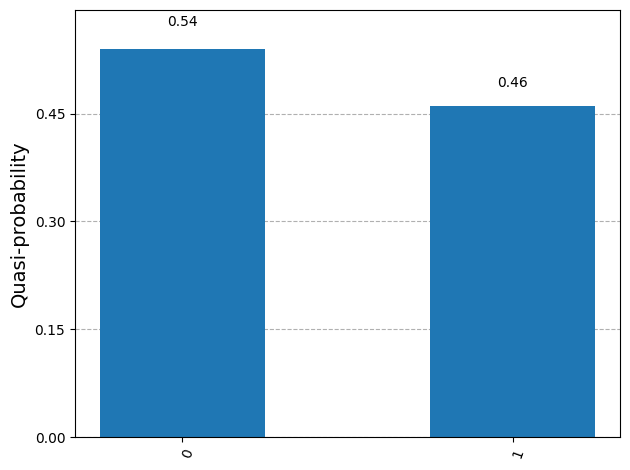

In [83]:
plot_histogram(probslist)

So we see that the random initial state of the qubits (corresponding to random orientations of the angular momentum in a Stern-Gerlach experiment) yield similar numbers of 0 and 1 states (like similar numbers of spin up and spin down states). This is exactly what the original Stern-Gerlach experiment showed.



## Fourth experiment: Repeated measurements

When a qubit starts in a random state, we see there is a roughly 50-50 chance of measuring one extremum over the other. But what happens to the qubit's state (or the particle's angular momentum) after the measurement? To answer that, we'll need to define a circuit that allows us to make multiple measurements of the same qubits. Let us define a circuit that we can use to investigate this. We will want to allow for the possibility of measuring both states $|0\rangle$ and $|1\rangle$, so we need something to rotate the qubit's initial state away from the default $|0\rangle$ state. In this case, we will use a hadamard gate $H$, since $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$. Note that, by default, both of these measurements will be along $z$.



In [87]:
from qiskit import QuantumCircuit

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the qubit to be a mixture of 0 and 1 states.
qc.h(0)

# Add a first measurement
qc.measure(0, 0)
qc.barrier()

# Add a second measurement
qc.measure(0, 1)

qc.draw("mpl")

qc_ibm = pm.run(qc)

In [ ]:
# Step 3: Run the job
num_shots = 100
dist = sampler.run([qc_ibm], shots=num_shots).result()
# To run on a simulator, uncomment the line below and comment out the line above.
# dist = sampler_sim.run([qc_ibm], shots=num_shots).result()
counts = dist[0].data.c.get_counts()
print(counts)

In [ ]:
# Step 4: Post-process
plot_histogram(counts)

In the figure above, the bins are labelled "00", "01" and so on. Here, these numbers refer to "2nd outcome, 1st outcome". So "00" means both measurements yielded the $|0\rangle$ state, and "01" means the first measurement yielded $|1\rangle$, and the second yielded $|0\rangle$. The vast majority of qubits were either measured to be in $|0\rangle$ twice, or measured to be $|1\rangle$ twice. It was very rare for qubits to be measured in one state and then measured to be in another state, and the few cases in which that happened (\~1%) are due to noise. In this case that noise has been simulated in keeping with the behavior of the real quantum system. This observed correlation between successive measurements is also observed in Stern-Gerlach-type measurements of particles with spin angular momentum. If a particle is measured to be "spin-up", a subsequent measurement shortly after that will once again yield "spin-up" (up to some small variation due to noise).

This may seem trivial. After all, if a qubit is measured to be in one state, and then I measure it again, quickly, why wouldn't it still be in that state? But if we really latch on to this subtlety, it may help us select some mathematical tools to describe this phenomenon.



## Analysis of experiments thus far

Let's collect a few observations from our experiments so far:

*   The measurement of a quantum mechanical system will only yield one of a set of "allowed values". For two-level systems like qubits or spin-1/2 particles, a measurement will only yield one of the binary outcomes.
*   When we randomly initialize the state of our binary system (like spin-1/2 particles emerging from an oven), either of the binary measurement outcomes is possible.
*   Once a measurement is made and the state of the system is known, repeating the measurement of the same physical observable does not change the state! That is, if we obtain the 0 state once, when we measure again it is still in the 0 state (up to some minor noise in the system \~0.1% to 1%).

Take explicit notice that we have not yet addressed the probabilistic nature of quantum mechanics, nor said anything about "collapsing" the state to an eigenstate. Using only the observations above, it might be tempting to look for a mathematical operation $O$ that leaves some special set of quantum mechanical states $|\psi\rangle$ unchanged up to perhaps a constant: $O|\psi\rangle = c|\psi \rangle$, since measuring along $z$ twice yields the same result. Ultimately, that search will fail to describe all the behaviors we will see. But it can describe some things, so we will pursue it a bit longer.

There does exist such an operation. Matrix operation on some vectors changes the vectors, and matrix operation on other vectors (eigenvectors) leaves the vector unchanged up to a constant. Take for example the matrix $M$ and the vector $|v\rangle$ where

$$
M= \begin{pmatrix} 1 & 2 \\ 2 & 1\end{pmatrix}
$$

and

$$
|v\rangle = \begin{pmatrix} 1\\1 \end{pmatrix}
$$

Note that

$$
M|v\rangle= \begin{pmatrix} 1 & 2 \\ 2 & 1\end{pmatrix}\begin{pmatrix} 1\\1 \end{pmatrix} = \begin{pmatrix} 1*1+2*1\\2*1+1*1 \end{pmatrix} = \begin{pmatrix} 3\\3 \end{pmatrix} = 3|v\rangle.
$$

But for other vectors, say $|v'\rangle = \begin{pmatrix} 1\\2\end{pmatrix}$, we have

$$
M|v'\rangle= \begin{pmatrix} 1 & 2 \\ 2 & 1\end{pmatrix}\begin{pmatrix} 1\\2 \end{pmatrix} = \begin{pmatrix} 1*1+2*2\\2*1+1*2 \end{pmatrix} = \begin{pmatrix} 5\\4 \end{pmatrix} \neq c|v'\rangle.
$$

We might try to describe the spin of a particle using a matrix, and we might try to describe the states of the particles after measurement using a vector, called a "state vector". It is not at all obvious what values should go into such a matrix or state vector, but the only property we have from the measurements so far that we could use to label states would be the probability of measuring 0 or 1 ("spin-up" or "spin-down" in the context of spin-1/2 particles). We should consider that the entries in the state vectors should be related to this probability (exactly the probability, "probability amplitude" - meaning we square the entry to obtain the probability, and so on). But at this point, we're not sure if the entries in these matrices should be strictly real, complex, or what. To be safe, let's attempt to develop a framework in which the vectors and matrices satisfy the following:

*   The matrix operators are connected to experiment as much as possible. For example, we could associate the eigenvalues of a spin matrix with the experimentally observed spin projections.
*   The state vectors should be connected to probability in the following way: If a particle is in the state vector $|A\rangle$, the probability that a subsequent measurement will find the particle in the state $|B\rangle$ is $P_{AB}\equiv |\langle A| B \rangle|^2$.

This gives us a ton of freedom in developing our first matrices. For example, we could naively try

$$
|0\rangle \sim |\uparrow\rangle \sim \begin{pmatrix} 1 \\0 \end{pmatrix}.
$$

Here the $|0\rangle \sim |\uparrow\rangle$ means that there are states in quantum computers and in spin-1/2 systems that are very similar and are often mapped to each other. They are obviously not exactly the same, since they refer to different systems. But the algebra describing these two-state systems could conform to the same rules (spoiler alert: they do!). Note that this random choice already has one nice attribute. Note that

$$
P_{00} = |\langle 0| 0 \rangle|^2 = \vert \begin{pmatrix} 1 & 0\end{pmatrix} \begin{pmatrix} 1 \\ 0\end{pmatrix}\vert ^2 = |1|^2 = 1.
$$

That is, if a particle is already in the state $|0\rangle$, the probability that a subsequent measurement will also yield $|0\rangle$ is 1 (barring effects from noise). This is excellent, because we have already seen that once a state is in the 0 or "spin-up" state, it remains there upon subsequent measurement. The probability above should indeed be 100%.

#### Check your understanding



Q1: $$ \begin{pmatrix} 0\\1 \end{pmatrix} $$ is better than $$ \begin{pmatrix} 0\\2 \end{pmatrix} $$ due to the normalization. In quantum mechanics, we expect to have a percentage scale, meanning that we expect the probability of all the states add up to 1. It requires a normalize factor. $$ \begin{pmatrix} 0\\1 \end{pmatrix} $$ is the result of that normalization.

Q2: ?, no one said that 0 or 1 are defined as metioned, it is only for convience. In fact, in other spaces, there are many couples that satisfy the requirements to be up or down. We can use any of them if we want.

Recall that in the experiments above, we found that a qubit initially in a the state $|0\rangle$ remained in that state upon subsequent measurement. The same is true of $|1\rangle$. This means that a qubit that is in $|0\rangle$ has zero probability of being measured in the state $|1\rangle$ (barring the effects of noise). Our required connection between inner products and probabilities of measurements then tells us that

$$
P_{01} = P_{10}=0.
$$

Without loss of generality, we can write the state vector $|1\rangle = \begin{pmatrix} a \\ b \end{pmatrix}$. Then we can write

$$
P_{01} = |\langle 0| 1 \rangle|^2 = \vert \begin{pmatrix} 1 & 0\end{pmatrix} \begin{pmatrix} a \\ b\end{pmatrix}\vert ^2 = |a|^2 = 0.
$$

The requirement that $P_{11} = 1$, the so-called "normalization condition" tells us that $|b|^2=1$. This by itself really only limits us to $b=e^{i\phi}$ for $\phi \in \mathbb{R}$. It turns out there are other reasons for choosing $b=1$ that are beyond this introduction to the topic. For now, let it suffice that $b=1$ is one acceptable solution.

We have come quite far in our analysis. Choosing a form for our state vectors allows us to construct a matrix that describes something about the physical phenomena at work here. In particular, because the original Stern-Gerlach experiment measured a splitting of trajectories based on spin angular momentum components along the $z$ axis, we would like an operator that describes exactly that: $S_z$. Another key connection to the experiment is that from the deflection amount, travel time, and known magnetic field strength, we can determine the magnitude of the $z$ component of spin. Although this requires a lot of assumptions about the precision of the experimental setup, here we will simply reiterate that the measured z-components of spin angular momentum are $\pm \hbar/2$.

Then we are seeking a matrix with real eigenvalues (satisfied by Hermitian matrices) with eigenvalues corresponding to these experimentally-observed spin components. Without loss of generality, we can write $S_z = \begin{pmatrix} s_{11} & s_{12} \\ s_{21} & s_{22}\end{pmatrix}$, and we can require:

$$
S_z |\uparrow\rangle = \begin{pmatrix} s_{11} & s_{12} \\ s_{21} & s_{22}\end{pmatrix}\begin{pmatrix}1 \\0\end{pmatrix} = \begin{pmatrix} s_{11} \\ s_{21} \end{pmatrix} \overset{!}{=} \frac{\hbar}{2} \begin{pmatrix}1 \\0\end{pmatrix} \rightarrow s_{11} = \hbar/2,s_{21}=0
$$

$$
S_z |\downarrow\rangle = \begin{pmatrix} s_{11} & s_{12} \\ s_{21} & s_{22}\end{pmatrix}\begin{pmatrix}0 \\1\end{pmatrix} = \begin{pmatrix} s_{12} \\ s_{22} \end{pmatrix} \overset{!}{=} -\frac{\hbar}{2} \begin{pmatrix}0 \\1\end{pmatrix} \rightarrow s_{12} = 0, s_{22}=-\hbar/2
$$

Combining, and pulling out the overall factor of $\hbar/2$, we have

$$
S_z = \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}.
$$

This is the well-known spin-z operator found in all quantum mechanics textbooks. One often sees this with the $\hbar/2$ removed, in which case it is the "Pauli-z" operator, typically denoted $\sigma_z$:

$$
\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}.
$$

This is useful, since this Pauli operator (and related matrices) can describe many physical systems involving two levels or two possible outcomes of measurement, including states of transmon qubits in a quantum computer.

Before we turn to other operators and states related to this one, we must address one fact that a lot of people get wrong. **Operator action is not the same as measurement.** In one sense, you might say, "Of course not! One happens on paper as part of a mathematical calculation, and the other happens in a lab on physical systems." Yes, that's true, but it's more than that. Making a measurement of the $z$-component of spin will always yield a "spin-up" or "spin-down" state, regardless of the initial state of the system. We saw this with the quantum computing analogs $|0\rangle$ and $|1\rangle$. We initialized states to be in hundreds of random orientations, and measurements always yielded either $|0\rangle$ or $|1\rangle$. This is known as measurement "collapsing the state" to an eigenstate. This does not happen when you apply a matrix to a state. Try the questions below to explore this.

#### Check your understanding

1(a). 

$$
  S_z |\psi\rangle = \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix} \begin{pmatrix}\sqrt{3/5} \\ \sqrt{2/5}\end{pmatrix}
  $$

  $$
  = \frac{\hbar}{2} \begin{pmatrix}\sqrt{3/5} \\ -\sqrt{2/5}\end{pmatrix}.
  $$

1 (b). 

You will either obtain $|\uparrow\rangle$ or $|\downarrow\rangle$. This corresponds to observing a projection of spin on the $z$ axis of either $\hbar/2$ or $-\hbar/2$, respectively. We can also determine the probability of each outcome, since

  $$
  P_{\uparrow\psi}=|\langle \uparrow|\psi\rangle|^2 = \vert \begin{pmatrix}1 & 0\end{pmatrix} \begin{pmatrix}\sqrt{3/5} \\ \sqrt{2/5}\end{pmatrix}\vert^2 = |\sqrt{3/5}|^2 = \frac{3}{5}
  $$

  $$
  P_{\downarrow\psi}=|\langle \downarrow|\psi\rangle|^2 = \vert \begin{pmatrix}0 & 1\end{pmatrix} \begin{pmatrix}\sqrt{3/5} \\ \sqrt{2/5}\end{pmatrix}\vert^2 = |\sqrt{2/5}|^2 = \frac{2}{5}
  $$

  So while the spin-up state is 20% more likely, either outcome is possible, and we will only obtain one of these two states.

{'1': 3955, '0': 6045}


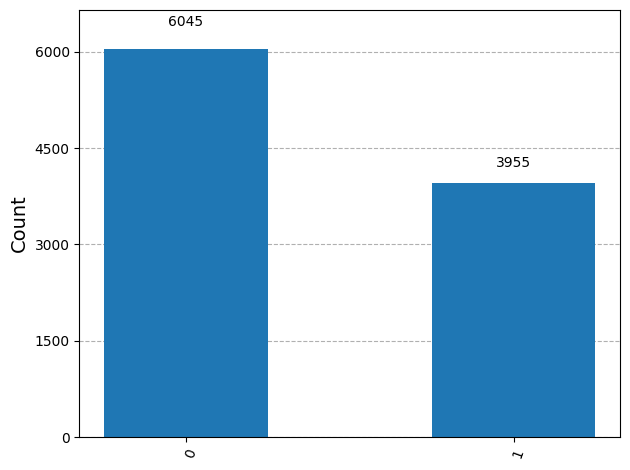

In [91]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Calculate rotation angle for state (√(3/5), √(2/5))
theta = 2 * np.arcsin(np.sqrt(2/5))

# Create circuit
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Prepare state
qc.ry(theta, 0)
qc.measure(0, 0)

# Run
simulator = AerSimulator()
num_shots = 10000
job = simulator.run(qc, shots=num_shots)
result = job.result()
counts = result.get_counts()

print(counts)

# Plot
plot_histogram(counts)

## Fifth experiment: Measuring different observables

So far we have only made measurements along the z axis. In a Stern-Gerlach experiment, if we wanted to measure along, say, the x-axis we would simply orient the inhomogeneous magnetic field to point along the $x$ axis, and look for deflections along $x$ on the screen. IBM quantum computers, however, are designed to make measurements along only one axis ($z$). To measure a state along $x$ we must perform a "change of basis". This means we must perform an operation that takes states along $x$ in the Bloch sphere to $z$, and vice-versa. There are a few ways of implementing this, but the preferred way is a Hadamard gate:

$$
H=\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}
$$

#### Check your understanding

Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Show that $H|0\rangle = |+\rangle_x$ and that $H|+\rangle_x = |0\rangle$
  </summary>

  **Answer:**

  $$
  H|0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\begin{pmatrix}1 \\ 0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix} = |+\rangle_x
  $$

  $$
  H|+\rangle_x = \frac{1}{\sqrt(2)}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix} = \frac{1}{2}\begin{pmatrix}2 \\ 0\end{pmatrix} = \begin{pmatrix}1 \\ 0\end{pmatrix} = |0\rangle
  $$
</details>

<details>
  <summary>
    Show that $H|1\rangle = |-\rangle_x$ and that $H|-\rangle_x = |1\rangle$
  </summary>

  **Answer:**

  $$
  H|1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\begin{pmatrix}0 \\ 1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix} = |-\rangle_x
  $$

  $$
  H|-\rangle_x = \frac{1}{\sqrt(2)}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix} = \frac{1}{2}\begin{pmatrix}0 \\ 2\end{pmatrix} = \begin{pmatrix}0 \\ 1\end{pmatrix} = |1\rangle
  $$
</details>



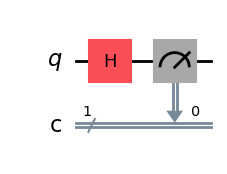

In [92]:
# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Add a hadamard gate to rotate into the x-basis
qc.h(0)
qc.measure(0, 0)

qc.draw("mpl")

This circuit rotates our system so that measurements (along $z$) tell us about the $x$ characteristics prior to the rotation. We already know that the quantum computer initializes states to $|0\rangle$ which corresponds to $|\uparrow\rangle$. Let's see what happens when we measure the projection of spin along $x$ for a state initially in $|\uparrow\rangle$. We show this step on a simulator to encourage you to explore the statistics of other circuits with different initializations.



In [93]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler_sv = Sampler()

job = sampler_sv.run([qc], shots=10000)
print(job.result()[0].data.c.get_counts())

{'1': 4978, '0': 5022}


This shows us that for a qubit initially in $|0\rangle$ (or equivalently, a spin in the $|\uparrow\rangle$) the probability of measuring a projection along $+x$ or $-x$ is about 50-50. In some ways, this makes perfect sense. After all, if something were pointing along the z direction, it would have no particular preference for $\pm x$. We might expect the same to be true, if we start with the state $|1\rangle$ (or $|\downarrow\rangle$). Let's check:



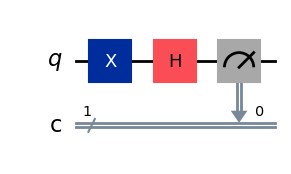

In [94]:
# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Add a NOT gate and hadamard gate. Measure.
qc.x(0)
qc.h(0)
qc.measure(0, 0)

qc.draw("mpl")

In [95]:
job = sampler_sv.run([qc], shots=10000)
print(job.result()[0].data.c.get_counts())

{'1': 5026, '0': 4974}


Yes! Again, we find a 50-50 probability of measuring a projections along $\pm x$. In analogy with measurements along $z$, we might further suspect that a particle that collapses into a state definitely along $+x$ might have zero probability of subsequently being measured along $-x$. Let's check:



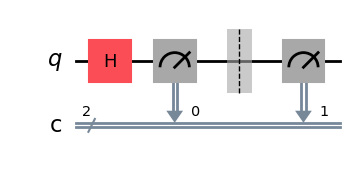

In [96]:
from qiskit import QuantumCircuit

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

# Rotate into x-basis using a Hadamard gate, then make two measurements in succession
qc.h(0)
qc.measure(0, 0)
qc.barrier()
qc.measure(0, 1)

qc.draw("mpl")

{'00': 509, '11': 515}


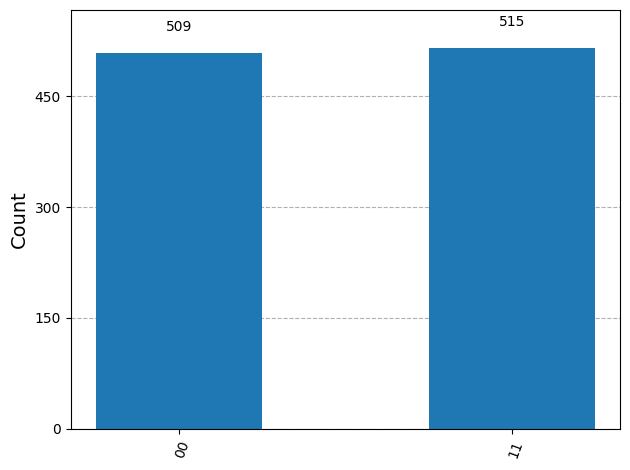

In [97]:
job = sampler_sv.run([qc])
print(job.result()[0].data.c.get_counts())
plot_histogram(job.result()[0].data.c.get_counts())

As expected, we obtain results in which the projection is along $+x$, and then later is again along $+x$, and we have results in which the projection is initially along $-x$ and is later along $-x$ once again. We do not see cases where the projection switches from $+x$ to $-x$ or vice-versa. We can collect our observations and use them to develop further operators in matrix forms, and further state vectors.

We know:

*   States with definite projections along $+z$ or $-z$ have a 50% chance of being found to have a projection along $+x$ and 50% chance of having a projection along $-x$.
*   States with a definite projection along $+x$ have zero chance of later being found to have a projection along $-x$, and vice-versa.

We can use these results to construct states with a definite, positive projection along $x$ (which we call $|+x\rangle$), and those with definite, negative projection along $x$ (which we call $|-x\rangle$). From those states, we can construct the matrix corresponding to $S_x$, exactly as we did for $S_z$. We leave these as exercises to the learner. Similarly, one can construct experiments making measurements along the $y$ axis, determine vectors for $|+y\rangle$ and $|-y\rangle$, and finally obtain an expression for $S_y$.

Collecting all these vectors and matrices together, we have

$$
\begin{aligned}
|+x\rangle &= \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix} & \:  & |-x\rangle &=& \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix} & \: &S_x &=& \frac{\hbar}{2} \begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix}\\
|+y\rangle &= \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ i\end{pmatrix} & \:  & |-y\rangle &=& \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -i\end{pmatrix} & \: &S_y &=& \frac{\hbar}{2} \begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix}\\
|+z\rangle &= \begin{pmatrix}1 \\ 0\end{pmatrix} & \:  &|-z\rangle &=& \begin{pmatrix}0 \\ 1\end{pmatrix} & \: &S_z &=& \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix}\\
\end{aligned}
$$



## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts:

*   For spin-1/2 particle, a measurement of the projection of spin on some axis can only yield one of two outcomes, often called "up" and "down".
*   Qubits can only be measured in one of two states, often referred to as $|0\rangle$ and $|1\rangle$.
*   We can model the Stern-Gerlach experiment on spin-1/2 particles using qubits in a quantum computer.
*   Repeated measurements of the same physical observable of the same particle/qubit will yield the same result (unless the system is perturbed by noise).
*   We can use results from the Stern-Gerlach experiment or from the analogous experiments with quantum computers to derive a system of state vectors and matrix operators that describe quantum mechanical spin.

### T/F questions:

1.  T/F Starting from experimental observations, the only valid choice for a vector to represent $|\uparrow\rangle$ is $\begin{pmatrix}1 \\ 0\end{pmatrix}$

No, any vector that satisfy your needs can be used. this one is the simplest one.

2.  T/F If $|\uparrow\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix}$, the only choice for $|\downarrow\rangle$ is $\begin{pmatrix}0 \\ 1\end{pmatrix}$ (up to a global phase).

Yes, as they form an orthornormal pair.

3.  T/F A particle measured to be in the state $|0\rangle$ will continue to be found in the state $|0\rangle$ upon subsequent measurements along $z$.

True

4.  T/F A particle measured to be in the state $|0\rangle$ will continue to be found in the state $|0\rangle$ upon subsequent measurements along $x$.

False, 50:50

5.  T/F A particle measured to be in the state $|0\rangle$ will always be found in the state $|+\rangle_x$ upon subsequent measurements along $x$.

False, 50:50

### MC questions:

1.  A particle initially in $|\uparrow\rangle$ has what probability of being measured in the state $|+x\rangle$?
    *   a. 0%
    *   b. 25%
    *   c. 50%
    *   d. 71%
    *   e. 100%

c

2.  A particle initially in $|\uparrow\rangle$ has what probability of being measured in the state $|\downarrow\rangle$?
    *   a. 0%
    *   b. 25%
    *   c. 50%
    *   d. 71%
    *   e. 100%

a

3.  The state $|\uparrow\rangle$ of a spin-1/2 particle is most commonly associated with what quantum computing state?
    *   a. $|+\rangle$
    *   b. $|-\rangle$
    *   c. $|0\rangle$
    *   d. $|1\rangle$
    *   e. None of the above

c

### Discussion questions:

1.  Three friends are discussing quantum measurements and operators. Friend A says, "Making a measurement along $z$ and acting with the operator $\sigma_z$ are the same thing." Friend B says, "Well, they are different procedures, but they have the same result." Friend C says, "They are totally different; they even have different effects on most states." With whom do you agree and why?

obviously, c is more correct. a is wrong as the measurement and acting of operator will not be the same. One is determined and measurment is a probability result. It is important to notice that:

Operator action is reversible and unitary; measurement is irreversible and non-unitary (wavefunction collapse)

### Free response problems:

1.  Given the experimental observations and proposed syntax:

$P_{\uparrow+x}=\vert \begin{pmatrix}1 & 0\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |a|^2 =\frac{1}{2} $
$P_{\downarrow+x}=\vert \begin{pmatrix}0 & 1\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |b|^2 =\frac{1}{2} $

show that up to a global phase

$|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\alpha}\end{pmatrix}$

Choose $\alpha = 0$ to obtain the standard result.

2.  Given the experimental observations and proposed syntax:

$P_{\uparrow-x}=\vert \begin{pmatrix}1 & 0\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |a|^2 =\frac{1}{2} $
$P_{\downarrow-x}=\vert \begin{pmatrix}0 & 1\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |b|^2 =\frac{1}{2} $

And using the result from challenge problem 3:

$P_{+x-x}=\vert \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\end{pmatrix}\begin{pmatrix}c \\ d\end{pmatrix}\vert^2 = \frac{1}{2}|c+d|^2 =0 $

show that up to a global phase

$|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}$




## 1: Deriving |+⟩ₓ

### Given:
- $P_{\uparrow+x}=\vert \begin{pmatrix}1 & 0\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |a|^2 =\frac{1}{2}$
- $P_{\downarrow+x}=\vert \begin{pmatrix}0 & 1\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |b|^2 =\frac{1}{2}$

### Solution:

Let $|+\rangle_x = \begin{pmatrix}a \\ b\end{pmatrix}$

#### Step 1: Determine magnitudes

From the probabilities:
- $|a|^2 = \frac{1}{2}$ → $|a| = \frac{1}{\sqrt{2}}$
- $|b|^2 = \frac{1}{2}$ → $|b| = \frac{1}{\sqrt{2}}$

Check normalization: $|a|^2 + |b|^2 = \frac{1}{2} + \frac{1}{2} = 1$ ✓

#### Step 2: Write general form with phases

Since complex numbers with magnitude $\frac{1}{\sqrt{2}}$ can be written as $\frac{1}{\sqrt{2}}e^{i\phi}$:
- $a = \frac{1}{\sqrt{2}}e^{i\phi_1}$
- $b = \frac{1}{\sqrt{2}}e^{i\phi_2}$

So: $|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}e^{i\phi_1} \\ e^{i\phi_2}\end{pmatrix}$

#### Step 3: Factor out global phase

Factor out $e^{i\phi_1}$:

$$|+\rangle_x = \frac{e^{i\phi_1}}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i(\phi_2-\phi_1)}\end{pmatrix}$$

#### Step 4: Drop global phase

Since global phases are unobservable, define $\alpha = \phi_2 - \phi_1$:

$$\boxed{|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\alpha}\end{pmatrix}}$$

#### Step 5: Standard choice

Choosing $\alpha = 0$ gives: 

$$|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}$$

---

## 2: Deriving |-⟩ₓ

### Given:
- $P_{\uparrow-x}=\vert \begin{pmatrix}1 & 0\end{pmatrix}\begin{pmatrix}c \\ d\end{pmatrix}\vert^2 = |c|^2 =\frac{1}{2}$
- $P_{\downarrow-x}=\vert \begin{pmatrix}0 & 1\end{pmatrix}\begin{pmatrix}c \\ d\end{pmatrix}\vert^2 = |d|^2 =\frac{1}{2}$
- $P_{+x-x}=\vert \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\end{pmatrix}\begin{pmatrix}c \\ d\end{pmatrix}\vert^2 = \frac{1}{2}|c+d|^2 =0$

### Solution:

Let $|-\rangle_x = \begin{pmatrix}c \\ d\end{pmatrix}$

#### Step 1: From probabilities (same as Problem 1)

Up to a global phase:

$$|-\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\beta}\end{pmatrix}$$

#### Step 2: Use orthogonality constraint

The condition $P_{+x-x} = 0$ means these states are **orthogonal**:

$$\langle +x|-x\rangle = 0$$

From Problem 1 (with $\alpha = 0$): $|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}$

#### Step 3: Calculate inner product

$$\langle +x|-x\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\end{pmatrix} \cdot \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\beta}\end{pmatrix} = 0$$

$$\frac{1}{2}(1 \cdot 1 + 1 \cdot e^{i\beta}) = 0$$

$$\frac{1}{2}(1 + e^{i\beta}) = 0$$

#### Step 4: Solve for β

$$1 + e^{i\beta} = 0$$

$$e^{i\beta} = -1$$

$$\beta = \pi$$

#### Step 5: Final result

$$\boxed{|-\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\pi}\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}}$$

---

## Key Insight

The **orthogonality condition** from the experimental observation (probability = 0) uniquely determines the **relative phase** between the components, giving us the standard x-basis states:

- $|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}$

- $|-\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}$

These form an orthonormal basis for spin measurements along the x-axis.


# 2025/10/23

# Exploring uncertainty


## Introduction

For those variables the constraint on uncertainty is written
$\Delta x \Delta p_x \geq \frac{\hbar}{2}.$
Here, $\Delta x$ is called the "uncertainty in $x$", which has the same definition as standard deviation in statistics, and can be defined as
$\Delta x = \sqrt{\langle x^2 \rangle - \langle x \rangle^2}.$
$\Delta p_x$ is defined in the same way.
Here, we will not derive this uncertainty relation; we will point out that it is consistent with our understanding of classical waves. 

That is, a wave with truly one perfect frequency $f$ and wavelength $\lambda$ would go on and on forever as a perfect sinusoid. Quantum mechanically, this would correspond to knowing the momentum perfectly according to de Broglie's hypothesis: $\lambda = h/p$. But in order to know $where$ a wave-like particle is located, the wave describing it must become more sharply peaked in space, like a very narrow Gaussian, for example. We know that we can express any continuous function, including such sharply-peaked wave functions, as a Fourier series of sinusoidal functions with different wavelengths. But as the wave function becomes more sharply peaked (and the position is better known), we will require more terms in the Fourier series, meaning a mixture of more wavelengths (and thus, quantum mechanically, more values of momentum).

Stated more simply: a state with a well-defined momentum (a perfect sinusoid in space) has very uncertain position. A state with a well-defined position (like a Dirac delta distribution) has a very uncertain momentum.

There are other variables that exhibit such incompatibility. For example, a particle's spin may have a well-defined projection along one axis, but then we know nothing about the project on an orthogonal axis. For example the state $|0\rangle \sim |\uparrow\rangle$ (for a qubit or spin-1/2 particle) has a definite projection along the $z$ axis (of 1 in the context of a qubit, and of $\hbar/2$ in the context of a spin-1/2 particle). But this state can be written as a superposition of two states each of which has a well-defined projection onto the $x$ axis:
$|0\rangle = \frac{1}{\sqrt{2}}(|+\rangle_x+|-\rangle_x)$
or equivalently
$\begin{pmatrix} 1 \\ 0\end{pmatrix} = \frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1\end{pmatrix}+\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1\end{pmatrix}\right].$
$|+\rangle_x$ has a well-defined projection onto $x$, as does $|-\rangle_x$. So if we specify the projection of a state along the $x$ axis, we do not know the projection along the $z$ axis. And if we specify the projection on the $z$ axis, we don't know the projection along $x$. There are minor differences when discussing this in the context of spin and in qubits. But generally speaking, eigenstates of the Pauli matrices have an interesting relationship that we can explore.



## Simple check of intuition

In this first experiment and throughout the module, we will use a framework for quantum computing known as "Qiskit patterns", which breaks workflows into the following steps:

*   Step 1: Map classical inputs to a quantum problem
*   Step 2: Optimize problem for quantum execution
*   Step 3: Execute using Qiskit Runtime Primitives
*   Step 4: Post-processing and classical analysis

We will generally follow these steps, though we may not always explicitly label them.

Let's start by loading some necessary packages including Runtime primitives. We will also select the least-busy quantum computer available to us.



In [3]:
from numpy import pi

# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
service = QiskitRuntimeService()

# Load the Runtime primitive and session
from qiskit_ibm_runtime import (
    Batch,
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
)

# Use the least busy backend
backend = service.least_busy(min_num_qubits=127)
print(backend.name)

management.get:WARNING:2025-10-23 18:25:54,355: Loading default saved account


ibm_torino


In [4]:
# Import an estimator, this time from qiskit (we will import from Runtime for real hardware)
from qiskit_aer.primitives import SamplerV2, EstimatorV2
from qiskit_aer.noise import NoiseModel

# Generate the noise model from the backend properties
noise_model = NoiseModel.from_backend(backend)

noisy_sampler = SamplerV2(options={"backend_options": {"noise_model": noise_model}})
noisy_estimator = EstimatorV2(options={"backend_options": {"noise_model": noise_model}})

You might recall that an eigenstate of one operator, Z, is not an eigenstate of another operator X. We will observe that now, experimentally by making measurements along the $x$ and $z$ axes. For the measurement along $z$, we simply use `qc.measure()`, because IBM quantum computers are structured to measure along $z$. But to measure along $x$, we must rotate the system to effectively move the $x$ axis up to the orientation along which we measure. This is accomplished with a Hadamard gate. There is a similar step required for measurements along $y$. The necessary steps are collected here for convenience:

*   To measure along $z$: `qc.measure()`
*   To measure along $x$: `qc.h()` then `qc.measure()`
*   To measure along $y$: `qc.sdg()`, `qc.h()`, `qc.s`then `qc.measure()`

### Step 1: Map classical inputs to a quantum problem

In this case, the mapping step is simply expressing the measurements and rotations described above in a quantum circuit:



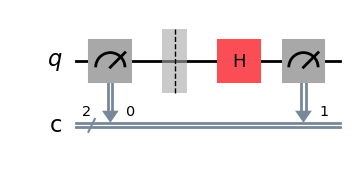

In [5]:
# Step 1: Map

# Import some general packages
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

# Add a first measurement
qc.measure(qr, cr[0])
qc.barrier()

# Change basis so that measurements made on quantum computer which normally tell us about z, now tell us about x.
qc.h(qr)

# Add a second measurement
qc.measure(qr, cr[1])

qc.draw("mpl")

### Step 2: Optimize problem for quantum execution

This step takes the operations we want to perform and expresses them in terms of the functionality of a specific quantum computer. It also maps our problem onto the layout of the quantum computer.



In [6]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc)

### Step 3: Execute using Qiskit Runtime primitives

We can use sampler to collect statistics on the measurements. We will construct the Sampler primitive to run on a real quantum computer using `mode = backend`. There are other modes for other workflows, and we will use one below. Sampler will be used by calling its run() method with a list of "pubs" (Primitive Unified Blocs). Each pub contains up to three values that, together, define a computation unit of work for the estimator to complete: circuits, observables, parameters. You can also provide a list of circuits, a list of observables, and a list of parameters. For more information, read the [Overview of PUBs.](/docs/guides/primitive-input-output#overview-of-pubs)

We want to run on a real quantum computer, so that we are carrying out a real quantum physics experiment. If you exhaust your allotted time on real quantum computers, you can comment out the code below for the quantum computer, and uncomment the code for running on a simulator.



In [9]:
# Step 3: Run the job on a real quantum computer
sampler = Sampler(mode=backend)
# pubs = [qc_isa]
# job = sampler.run(pubs)
# res = job.result()

# counts = res[0].data.c.get_counts()

# Run the job on the Aer simulator with noise model from real backend

sim_job = noisy_sampler.run([qc_isa])
sim_res=sim_job.result()
sim_counts=sim_res[0].data.c.get_counts()

### Step 4: Post-processing

This is an especially simple case of post-processing, in which we simply visualize the counts.

Note that Qiskit orders qubits, measurements, and other things by listing the lowest-numbered item last / on the right, a convention referred to as "little-endian". This means that the column below labeled "10" refers to counts where the first measurement yielded a "0", and the second measurements yielded a "1".



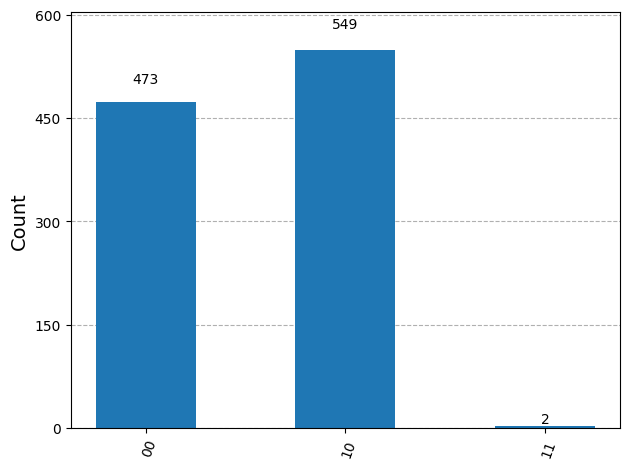

In [10]:
# Step 4: Post-process

from qiskit.visualization import plot_histogram

# plot_histogram(counts)
plot_histogram(sim_counts)

If this convention does not appeal to you, you can use `marginal_counts` to visualize the results of each measurement separately:



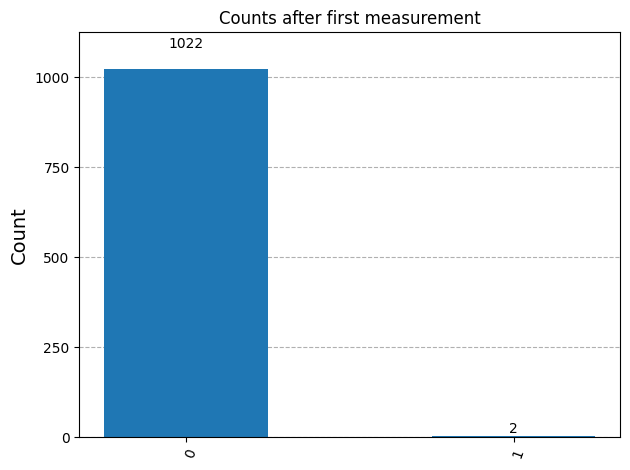

In [12]:
from qiskit.result import marginal_counts

plot_histogram(
    marginal_counts(sim_counts, indices=[0]), title="Counts after first measurement"
)

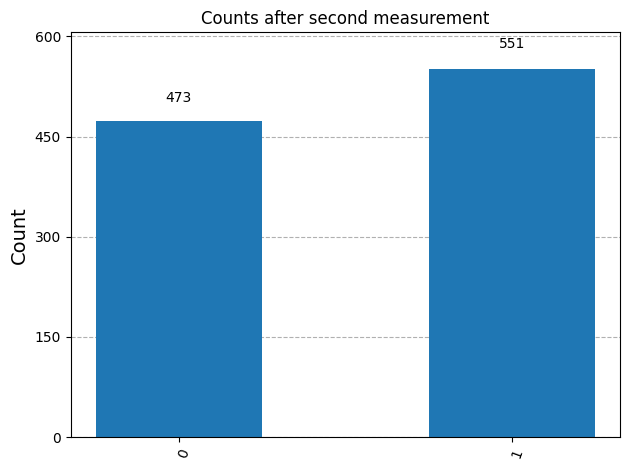

In [13]:
plot_histogram(
    marginal_counts(sim_counts, indices=[1]), title="Counts after second measurement"
)

By default, states in Qiskit are initialized to the $|0\rangle$ state. So it is no surprise that almost all of the first measurements yeilded $|0\rangle$. Note however, that there was almost an even split in the second measurement (the one giving information about projections of the state onto $x$). It seems like this state that gives us a very predictable outcome of measurements along $z$ gives us a very unpredictable set of outcomes for measurements along $x$. Let's explore this.

What happens if the make the measurements in the opposite order? We could start by using the Hadamard gate to obtain statistics on the probability of $|0\rangle$ being measured in $|\pm\rangle_x$. Then for the second measurement, we will change back to the $z$ basis using a second Hadamard gate.



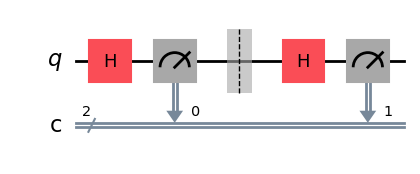

In [14]:
# Step 1:

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

# Change basis to measure along x.
qc.h(qr)
qc.measure(qr, cr[0])
qc.barrier()

# Change our basis back to z and make a second measurement
qc.h(qr)
qc.measure(qr, cr[1])

qc.draw("mpl")

In [15]:
# Step 2: Transpile the circuit for running on a quantum computer

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

In [18]:
# Run the job on the Aer simulator with noise model from real backend
job = noisy_sampler.run([qc_isa])
res=job.result()
counts=res[0].data.c.get_counts()

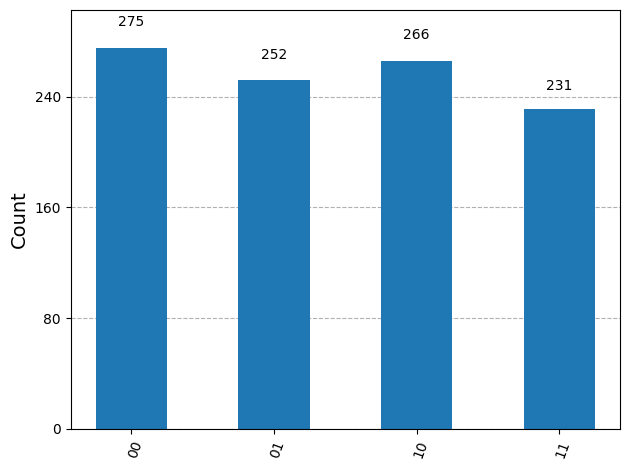

In [19]:
# Step 4: Post-process
from qiskit.visualization import plot_histogram

plot_histogram(counts)

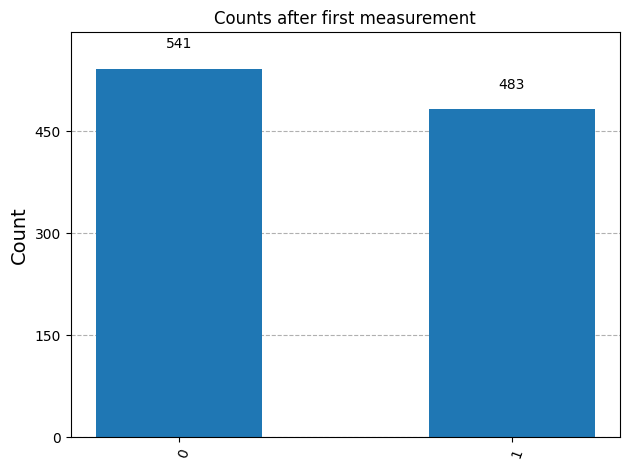

In [20]:
plot_histogram(
    marginal_counts(counts, indices=[0]), title="Counts after first measurement"
)

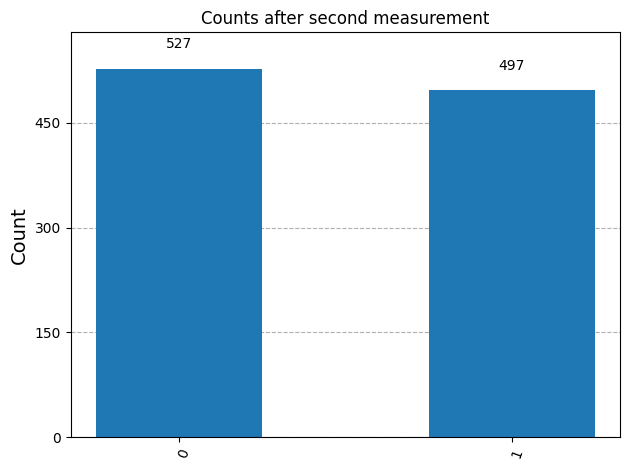

In [21]:
plot_histogram(
    marginal_counts(counts, indices=[1]), title="Counts after second measurement"
)

Here, we seem to have even less predictability! Previously, we at least knew what the outcome would be of the first measurement, now we have a fairly even distribution across all possible states. It's not too hard to see why this happened. We started in $|0\rangle$, which is a 50-50 mixture of $|+\rangle_x$ and $|-\rangle_x$, according to
$|0\rangle=\frac{1}{\sqrt{2}}(|+\rangle_x+|-\rangle_x)$
So clearly there should be equal probability of obtaining the + or - state (mapped to 0 and 1 in the chart) for the first measurement. The measurement along $x$ collapses the state into either an eigenstate $|+\rangle_x$ or the eigenstate $|-\rangle_x$. Each one of those states is a 50-50 mixture of $|0\rangle$ and $|1\rangle$, according to
$|+\rangle_x = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$
$|-\rangle_x = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$
So once the system is in an eigenstate of $x$, clearly, measurements along $z$ will yield both $|0\rangle$ and $|1\rangle$, and will do so with roughly equal probability.
So our first example showed us that some states will have very predictable outcomes of some measurements, but unpredictable outcomes for other measurements. The current example shows us that we can do worse than that. There are states that can give us unpredictable outcomes for both measurements, even if all we do is swap the order of the measurements. Let's investigate how certain or uncertain a quantity is for a given state.



## Calculating uncertainty

We can quantify this using uncertainty, or variance. The "uncertainty" is often defined to be the square root of the "variance" of a distribution. That is, the uncertainty for some observable $S$ is denoted $\Delta S$ and is given by

$$
\begin{aligned}
(\Delta S)^2 & \equiv \langle (S - \langle S \rangle)^2 \rangle\\
(\Delta S)^2 & = \langle S^2 - 2S\langle S \rangle + \langle S \rangle^2 \rangle\\
(\Delta S)^2 & = \langle S^2 \rangle - \langle S \rangle^2
\end{aligned}
$$

For the case of Pauli matrices, for which $S^2 = I$, this becomes

$$
(\Delta S)^2 = 1 - \langle S \rangle^2
$$

Let's apply this to a concrete example. Let's start with the state $|\psi\rangle = |+\rangle_y = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ i \end{pmatrix},$ and let's determine the uncertainty of the observable $X$ in that state.

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.
Calculate the uncertainty of $X$ in the state $|+\rangle_y = |+i\rangle$, by hand.

Although not mentioned here, I believe that the $X$ here refers to the puli X, which can be expressed as: $$ \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\ $$

where the uncertainty is expressed as follwoing:
  $$
  \Delta X =\sqrt{\langle+i| X^2 |+i\rangle - \langle+i| X |+i\rangle^2}
  $$

by subsitute the state:

$$
\begin{aligned}
\Delta X & =\sqrt{\frac{1}{\sqrt{2}}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ i\end{pmatrix} - \left(\frac{1}{\sqrt{2}}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ i\end{pmatrix}\right)^2}\\
\Delta X & =\sqrt{\frac{1}{2}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix} \begin{pmatrix}1 \\ i\end{pmatrix} - \left(\frac{1}{2}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}i \\ 1\end{pmatrix}\right)^2}\\
\Delta X & =\sqrt{\frac{1}{2}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}1 \\ i\end{pmatrix} - \left(\frac{1}{2}(0)\right)^2}\\
\Delta X & =\sqrt{\frac{1}{2}(2)} = 1
\end{aligned}
$$
  

We can create an arbitrary initial state using `qc.initialize()`. Note that the syntax for the imaginary unit here is $1j$.



In [25]:
# Step 1: Map the problem into a quantum circuit

from qiskit.quantum_info import SparsePauliOp
import numpy as np

obs = SparsePauliOp("X")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the state
qc.initialize([1, 1j] / np.sqrt(2))

# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend
job = noisy_estimator.run([[qc_isa,obs_isa]])
res=job.result()

# Step 4: Return the result in classical form, and analyze.

print(res[0].data.evs)

-1.2243379746351218e-16


According to our equation above,
$(\Delta X)^2 = 1 - \langle X \rangle^2 = 1-(0.0000000000000000000001)^2 \rightarrow \Delta X = 0.999...$
Let's stick with that same state, but find the expectation value of $Z$, now:



In [26]:
# Step 1: Map the problem into a quantum circuit

obs = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the state to |+>_y
qc.initialize([1, 1j] / np.sqrt(2))


# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend
job = noisy_estimator.run([[qc_isa,obs_isa]])
res=job.result()

# Step 4: Return the result in classical form, and analyze.

print(res[0].data.evs)

0.00011547933160377388


We could do the same math as before, but we would see that the variance is again very close to 1.0. We could conclude that $\Delta X \Delta Z \approx 1.0$. Indeed this approximately correct for the state we chose. But can we do better? Or worse?

Recall that there is an uncertainty relation between position along one direction, $x,$ and momentum along the same direction, $p_x.$ For those variables, but most familiar form is probably
$\Delta x \Delta p_x \geq \hbar/2$
If this is all we remember, we might be tempted to think that $\Delta X$ and $\Delta Z$ could also have such a fundamental limit on uncertainty. Perhaps it is impossible for the product $\Delta X \Delta Z$ to reach zero? Let's try another state and see if this holds. This time, we'll use $|\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}.$ Let's see what happens. Note that in the code below, estimator can accept two sets of circuits and observables in the same job submission.



In [28]:
# Step 1: Map the problem into a quantum circuit

obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Z")

# Define registers

qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the state
qc.initialize([1, 1] / np.sqrt(2))

# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend

job = noisy_estimator.run([[qc,obs1],[qc,obs2]])
res=job.result()

# Step 4: Return the result in classical form, and analyze.

print("The expectation value of the first observable is: ", res[0].data.evs)
print("The expectation value of the second observable is: ", res[1].data.evs)

The expectation value of the first observable is:  0.9999999999999998
The expectation value of the second observable is:  0.0


The expectation value of $X$ should be close to 1.0, but should not exceed 1.0. Don't worry if it exceeds 1.0 by a very small amount. This can be attributed to factors like noise and/or readout error. Although this is a very important topic, we can ignore it for now.

We obtained an expectation value of $X$ that is very close to 1.0 (corresponding to a very low variance for $X$). This makes the product of the two variances quite low:

$$
\Delta X \Delta Z = \sqrt{1-(0.9853)^2} \times \sqrt{1-(-0.00195)^2} = 0.171.
$$

While this is not exactly zero, this value is getting small in comparison with the eigenvalues of the Pauli operators ($\pm 1$). Well, you may recall that the uncertainty relation between linear position and momentum could be written differently, explicitly using the commutation relation between the operators $x$ and $p_x$:

$$
\Delta x \Delta p_x \geq \frac{1}{2}|\langle [x,p_x] \rangle|
$$

where

$$
[x,p_x] = xp_x-p_xx
$$

is the commutator of $x$ and $p_x$.

This is the form that that can be most easily extended to the Pauli operators. Generally, for two operators $A$ and $B$,

$$
\Delta A \Delta B \geq \frac{1}{2}|\langle [A,B] \rangle|.
$$

And in the case of the Pauli matrices $X$ and $Z$, we need $[X,Z]$ in order to calculate

$$
\Delta X \Delta Z \geq \frac{1}{2}|\langle [X,Z] \rangle|.
$$

We show this here, and leave similar calculations to the reader as an exercise:

$$
[X,Z] = XZ-ZX = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}-\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}\begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}
$$

$$
[X,Z] = \begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}-\begin{pmatrix}0 & 1 \\ -1 & 0\end{pmatrix} = 2\begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}
$$

This is a perfectly acceptable answer, but with one more step, we see

$$
[X,Z] = -2i\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}=-2iY
$$

Our uncertainty relation thus becomes

$$
\Delta X \Delta Z \geq |\langle Y \rangle|.
$$

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Determine $[X,Y]$ and $[Y,Z]$. Use this to write down the uncertainty relations between $X$ & $Y$, and $Y$ & $Z$.
  </summary>

  **Answer:**

  $$
  [X,Y] = XY-YX = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}-\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}\begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} = 2 \begin{pmatrix}i & 0 \\ 0 & -i\end{pmatrix}=2iZ
  $$

  $$
  [Y,Z] = YZ-ZY = \begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}-\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix} = 2 \begin{pmatrix}0 & i \\ i & 0\end{pmatrix}=2iX
  $$

  Combining with the general uncertainty relation, we have

  $$
  \Delta X \Delta Y \geq |\langle Z \rangle|,
  $$

  $$
  \Delta Y \Delta Z \geq |\langle X \rangle|.
  $$
</details>

### Verify consistency

Before moving on, let us check that this was consistent with our previous finding. We used the state $|\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}.$ And we found that $\Delta X \Delta Z  = 0.171.$ Now we know this product should be greater than or equal to

$$
|\langle Y \rangle|=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

$$
|\langle Y \rangle| = \frac{1}{2}\begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix} -i \\ i \end{pmatrix} = \frac{1}{2}(-i+i) = 0.
$$

So indeed, $\Delta X \Delta Z  = 0.171 \geq |\langle Y \rangle|=0$



Use the questions below to build some intuition for these findings:

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    Answer the following items together as a set:

    (a) What states would you expect to have zero uncertainty in $X$?

    (b) What states would you expect to have zero uncertainty in $Z$?

    (c) In what states would you obtain a zero expectation value $\langle Y \rangle$?

    (d) Are the answers to the above questions consistent with the case $\Delta X \Delta Z \geq |\langle Y \rangle|$?

    (e) Write code to explicitly check this using estimator.
  </summary>

  **Answers:**

  (a) We might expect eigenstates of the $X$ operator to yield zero uncertainty in $X$. Indeed, using $|\psi\rangle = |+\rangle_x,$ we have
  $\Delta X = \sqrt{1-\langle X \rangle^2} = \sqrt{1-1^2} = 0.$

  (b) We might expect eigenstates of the $Z$ operator to yield zero uncertainty in $Z$. Indeed, using $|\psi\rangle = |1\rangle,$ we have
  $\Delta Z = \sqrt{1-\langle Z \rangle^2} = \sqrt{1-(-1)^2} = 0.$

  (c) We expect to find $\langle Y \rangle=0$ for any states that, when measured, yield a positive projection on the $y$ axis just as often as a negative projection. These include the eigenstates of $X$ and $Z$.

  (d) Yes. One would expect a very small value for the product of uncertainties $\Delta X \Delta Z $ for eigenstates of $X$ or $Z$: $\Delta X \Delta Z \approx 0.$ This can hold because we would also expect $\langle Y \rangle=0$ for those same states. So the uncertainty relation could be satisfied.

  (e) Code such as the following would verify this:

  ```
  obs1 = SparsePauliOp.from_list(
      [("X", 1.000)]
  )
  obs2 = SparsePauliOp.from_list(
      [("Y", 1.000)]
  )
  obs3 = SparsePauliOp.from_list(
      [("Z", 1.000)]
  )
  qc = QuantumCircuit(1,1)
  qc.ry(pi/2,0)

  job = estimator.run([(qc, [[obs1], [obs2], [obs3]])], precision=0.001)
  res=job.result()
  ```

  Where the results returns all expectation values. To retrieve all expectation values and calculate uncertainties, we could use:

  ```
  xs=res[0].data.evs[0]
  ys=abs(res[0].data.evs[1])
  zs=res[0].data.evs[2]

  import math
  prodxz=((1-xs[i]*xs[i])**0.5)*(1-zs[i]*zs[i])**0.5

  ```
</details>

<details>
  <summary>
    Answer the following items together as a set:

    (a) Can you think of a state in which you would have a large expectation value $\langle Y \rangle$?

    (b) Would you expect that same state to have large or small uncertainty in $X$?

    (c) Would you expect that same state to have large or small uncertainty in $Z$?

    (d) Are the answers to the above questions consistent with the case $\Delta X \Delta Z \geq |\langle Y \rangle|$?

    (e) Write code to explicitly check this using estimator.
  </summary>

  **Answers:**

  (a) We expect to find $\langle Y \rangle\approx 1$ for the eigenstate of $Y$: $|+\rangle_y$.

  (b) We might expect $X$ to have large uncertainty in the state $|+\rangle_y,$ since measuring $X$ in that state would yield a positive and negative result with equal frequency/probability.

  (c) We might expect $Z$ to have large uncertainty in the state $|+\rangle_y,$ since measuring $Z$ in that state would yield a positive and negative result with equal frequency/probability.

  (d) Yes. One would expect a large value for the product of uncertainties $\Delta X \Delta Z $ for eigenstates of $Y,$ and for $|+\rangle_y,$ specifically. We would also expect $\langle Y \rangle\approx 1$ for that same state. So both $\langle Y \rangle$ and $\Delta X \Delta Z $ are both fairly large in this state, and it is plausible that the uncertainty relation could again be satisfied.

  (e) Code such as the following would verify this:

  ```
  obs1 = SparsePauliOp.from_list(
      [("X", 1.000)]
  )
  obs2 = SparsePauliOp.from_list(
      [("Y", 1.000)]
  )
  obs3 = SparsePauliOp.from_list(
      [("Z", 1.000)]
  )
  qc = QuantumCircuit(1,1)
  qc.rx(-pi/2,0)

  job = estimator.run([(qc, [[obs1], [obs2], [obs3]])], precision=0.001)
  res=job.result()
  ```

  Where the results returns all expectation values. To retrieve all expectation values and calculate uncertainties, we could use:

  ```
  xs=res[0].data.evs[0]
  ys=abs(res[0].data.evs[1])
  zs=res[0].data.evs[2]

  import math
  prodxz=((1-xs[i]*xs[i])**0.5)*(1-zs[i]*zs[i])**0.5

  ```
</details>



(a): X
(b): Z
(c): any states that is orthorgnal to Y, which includes the eigenstates of X and Z.
(d): Yes

In [36]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import StatevectorEstimator
import numpy as np

estimator = StatevectorEstimator()

def verify_uncertainty(qc, name):
    """Verify ΔX·ΔZ ≥ |<Y>| for a quantum state"""
    # Define operators
    X, Y, Z = [SparsePauliOp.from_list([(op, 1.0)]) for op in ["X", "Y", "Z"]]
    I = SparsePauliOp.from_list([("I", 1.0)])
    
    # Get expectation values
    job = estimator.run([(qc, [X, Y, Z, I])])
    result = job.result()
    exp_X, exp_Y, exp_Z, exp_I = result[0].data.evs
    
    # Calculate uncertainties: ΔA = sqrt(<A²> - <A>²), and A² = I for Pauli matrices
    delta_X = np.sqrt(exp_I - exp_X**2)
    delta_Z = np.sqrt(exp_I - exp_Z**2)
    
    # Check relation
    product = delta_X * delta_Z
    bound = np.abs(exp_Y)
    satisfied = product >= bound - 1e-10
    
    print(f"{name:20s} | ΔX={delta_X:.3f}, ΔZ={delta_Z:.3f}, |<Y>|={bound:.3f} | ΔX·ΔZ={product:.3f} ≥ {bound:.3f}? {satisfied}")

# Test states
print("Eigenstates of X and Z (small <Y>, small ΔX or ΔZ):")
qc_plus = QuantumCircuit(1); qc_plus.h(0)
verify_uncertainty(qc_plus, "|+⟩ (X eigenstate)")

qc_zero = QuantumCircuit(1)
verify_uncertainty(qc_zero, "|0⟩ (Z eigenstate)")

print("\nEigenstates of Y (large <Y>, large ΔX and ΔZ):")
qc_plus_i = QuantumCircuit(1); qc_plus_i.h(0); qc_plus_i.s(0)
verify_uncertainty(qc_plus_i, "|+i⟩ (Y eigenstate)")

qc_minus_i = QuantumCircuit(1); qc_minus_i.h(0); qc_minus_i.sdg(0)
verify_uncertainty(qc_minus_i, "|-i⟩ (Y eigenstate)")

Eigenstates of X and Z (small <Y>, small ΔX or ΔZ):
|+⟩ (X eigenstate)   | ΔX=0.000, ΔZ=1.000, |<Y>|=0.000 | ΔX·ΔZ=0.000 ≥ 0.000? True
|0⟩ (Z eigenstate)   | ΔX=1.000, ΔZ=0.000, |<Y>|=0.000 | ΔX·ΔZ=0.000 ≥ 0.000? True

Eigenstates of Y (large <Y>, large ΔX and ΔZ):
|+i⟩ (Y eigenstate)  | ΔX=1.000, ΔZ=1.000, |<Y>|=1.000 | ΔX·ΔZ=1.000 ≥ 1.000? True
|-i⟩ (Y eigenstate)  | ΔX=1.000, ΔZ=1.000, |<Y>|=1.000 | ΔX·ΔZ=1.000 ≥ 1.000? True


(a): the eigenstate of Y will have a expectional value of 1

(b) (c): 0 expection value, large uncertainty.

(d): yes

In [39]:
# the following code aims to support question (e)

estimator = StatevectorEstimator()

def analyze_state(qc, name):
    """Analyze expectation values and uncertainties for a quantum state"""
    X, Y, Z = [SparsePauliOp.from_list([(op, 1.0)]) for op in ["X", "Y", "Z"]]
    I = SparsePauliOp.from_list([("I", 1.0)])
    
    job = estimator.run([(qc, [X, Y, Z, I])])
    result = job.result()
    exp_X, exp_Y, exp_Z, exp_I = result[0].data.evs
    
    delta_X = np.sqrt(exp_I - exp_X**2)
    delta_Z = np.sqrt(exp_I - exp_Z**2)
    product = delta_X * delta_Z
    bound = np.abs(exp_Y)
    
    print(f"\nState: {name}")
    print(f"  <Y> = {exp_Y:.3f}")
    print(f"  ΔX = {delta_X:.3f} (uncertainty in X)")
    print(f"  ΔZ = {delta_Z:.3f} (uncertainty in Z)")
    print(f"  ΔX·ΔZ = {product:.3f}")
    print(f"  |<Y>| = {bound:.3f}")
    print(f"  Relation satisfied? ΔX·ΔZ ≥ |<Y>|: {product >= bound - 1e-10}")

print("="*60)
print("ANSWERS:")
print("="*60)

# (a) State with large <Y>: Eigenstate of Y
print("\n(a) State with large expectation value <Y>:")
print("    Answer: Eigenstate of Y, such as |+i⟩ or |-i⟩")

# Create |+i⟩ = (|0⟩ + i|1⟩)/√2
qc_plus_i = QuantumCircuit(1)
qc_plus_i.h(0)   # Hadamard
qc_plus_i.s(0)   # S gate
analyze_state(qc_plus_i, "|+i⟩ (Y eigenstate, eigenvalue +1)")

# Create |-i⟩ = (|0⟩ - i|1⟩)/√2
qc_minus_i = QuantumCircuit(1)
qc_minus_i.h(0)   # Hadamard
qc_minus_i.sdg(0) # S† gate
analyze_state(qc_minus_i, "|-i⟩ (Y eigenstate, eigenvalue -1)")

print("\n(b) Uncertainty in X for this state:")
print("    Answer: LARGE uncertainty")
print("    Reason: Y eigenstates are equal superpositions of X eigenstates")

print("\n(c) Uncertainty in Z for this state:")
print("    Answer: LARGE uncertainty")
print("    Reason: Y eigenstates are equal superpositions of Z eigenstates")

print("\n(d) Consistency with ΔX·ΔZ ≥ |<Y>|:")
print("    Answer: YES, consistent")
print("    Reason: Both ΔX and ΔZ are large (~1), so ΔX·ΔZ ≈ 1")
print("           |<Y>| is also large (= 1 for eigenstates)")
print("           The relation 1 ≥ 1 is satisfied")

print("\n(e) Code verification shown above")

ANSWERS:

(a) State with large expectation value <Y>:
    Answer: Eigenstate of Y, such as |+i⟩ or |-i⟩

State: |+i⟩ (Y eigenstate, eigenvalue +1)
  <Y> = 1.000
  ΔX = 1.000 (uncertainty in X)
  ΔZ = 1.000 (uncertainty in Z)
  ΔX·ΔZ = 1.000
  |<Y>| = 1.000
  Relation satisfied? ΔX·ΔZ ≥ |<Y>|: True

State: |-i⟩ (Y eigenstate, eigenvalue -1)
  <Y> = -1.000
  ΔX = 1.000 (uncertainty in X)
  ΔZ = 1.000 (uncertainty in Z)
  ΔX·ΔZ = 1.000
  |<Y>| = 1.000
  Relation satisfied? ΔX·ΔZ ≥ |<Y>|: True

(b) Uncertainty in X for this state:
    Answer: LARGE uncertainty
    Reason: Y eigenstates are equal superpositions of X eigenstates

(c) Uncertainty in Z for this state:
    Answer: LARGE uncertainty
    Reason: Y eigenstates are equal superpositions of Z eigenstates

(d) Consistency with ΔX·ΔZ ≥ |<Y>|:
    Answer: YES, consistent
    Reason: Both ΔX and ΔZ are large (~1), so ΔX·ΔZ ≈ 1
           |<Y>| is also large (= 1 for eigenstates)
           The relation 1 ≥ 1 is satisfied

(e) Code verifi

## Testing uncertainty relations

The test above only demonstrated the validity of the uncertainty relation for a single choice of state vector $|\psi\rangle = |+\rangle_x$. To convince ourselves that this is generally consistent with experiment, we should carry out similar calculations using estimator for many choices of the state vector. Let's start by rotating our state vector away from the $z$ axis, using an `RY` gate to produce different initial states using a parameter $\theta$.



In [40]:
# The calculation below uses approximately 3-4 minutes of QPU time.
# Step 1: Map the problem into a quantum circuit

from qiskit.circuit import Parameter
import numpy as np

# Specify observables
obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Y")
obs3 = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Rotate away from |0>
theta = Parameter("θ")
qc.ry(theta, 0)

params = np.linspace(0, 2, num=21)

# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend

job = noisy_estimator.run([(qc, [[obs1], [obs2], [obs3]], [params])])
res=job.result()

In [41]:
# Step 4: Post-processing and classical analysis.
xs = res[0].data.evs[0]
ys = abs(res[0].data.evs[1])
zs = res[0].data.evs[2]

# Calculate uncertainties

delx = []
delz = []
prodxz = []
for i in range(len(xs)):
    delx.append(abs((1 - xs[i] * xs[i])) ** 0.5)
    delz.append(abs((1 - zs[i] * zs[i])) ** 0.5)
    prodxz.append(delx[i] * delz[i])

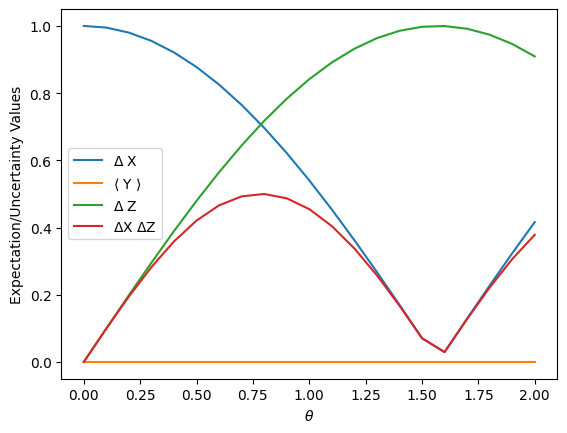

In [42]:
# Here we can plot the results from this simulation.
import matplotlib.pyplot as plt

plt.plot(params, delx, label=r"$\Delta$ X")
plt.plot(params, ys, label=r"$\langle$ Y $\rangle$")
plt.plot(params, delz, label=r"$\Delta$ Z")
plt.plot(params, prodxz, label=r"$\Delta$X $\Delta$Z")
plt.xlabel(r"$\theta$")
plt.ylabel("Expectation/Uncertainty Values")
plt.legend()
plt.show()

Note that the red curve $(\Delta X \Delta Z)$ is always greater than the orange curve $\langle Y \rangle.$ Sometimes the uncertainty product dips and is somewhat close to the limit, and other times it rises and is farther from the limit, but it always obeys the uncertainty relation.

Of course, this might not be the best test of the uncertainty relation, since our limit $\langle Y \rangle$ is always very close to zero. Let's use a quantum state that has a larger projection on eigenstates of $Y$. Specifically, we will still rotate rotate $|0\rangle$ down from the $z$ axis by varying angles, but now we will also rotate that resulting state around $z$ by some angle, perhaps $\pi/4$, and see what happens.



In [43]:
# The calculation below uses approximately 3-4 minutes of QPU time.
from qiskit.circuit import Parameter
import numpy as np

# Step 1: Map the problem to a quantum circuit

# Specify observables
obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Y")
obs3 = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Rotate away from |0> along one plane, and then along a transverse direction.
theta = Parameter("θ")
qc.ry(theta, 0)
qc.rz(pi / 4, 0)

params = np.linspace(0, 2, num=21)

# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend

job = noisy_estimator.run([(qc, [[obs1], [obs2], [obs3]], [params])])
res=job.result()

In [44]:
# Step 4: Post-processing and classical analysis.
xs = res[0].data.evs[0]
ys = abs(res[0].data.evs[1])
zs = res[0].data.evs[2]

# Calculate uncertainties

delx = []
delz = []
prodxz = []
for i in range(len(xs)):
    delx.append(abs((1 - xs[i] * xs[i])) ** 0.5)
    delz.append(abs((1 - zs[i] * zs[i])) ** 0.5)
    prodxz.append(delx[i] * delz[i])

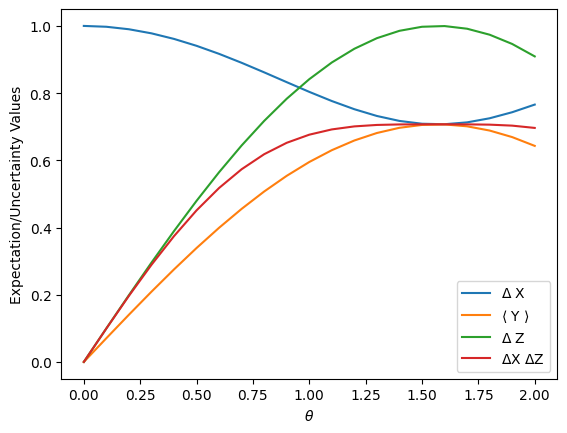

In [45]:
# Here we can plot the results from this simulation.
import matplotlib.pyplot as plt

plt.plot(params, delx, label=r"$\Delta$ X")
plt.plot(params, ys, label=r"$\langle$ Y $\rangle$")
plt.plot(params, delz, label=r"$\Delta$ Z")
plt.plot(params, prodxz, label=r"$\Delta$X $\Delta$Z")
plt.xlabel(r"$\theta$")
plt.ylabel("Expectation/Uncertainty Values")
plt.legend()
plt.show()

Now we see that the limit on the uncertainty $(\Delta X \Delta Z)$ is being put to the test! The red curve comes much closer to the orange curve than before. In fact, in the absence of noise, the uncertainty relation would be exactly saturated ($(\Delta X \Delta Z) = \langle Y \rangle$) one point. In the presence of noise and readout error, it should not be surprising if a run occassionally yields $(\Delta X \Delta Z)$ very slightly larger than $\langle Y \rangle.$ This is not a true violation of uncertainty; it is just an artifact of non-zero error.

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    Explain how you would push this to the absolute limit, making $\langle Y \rangle$ as large as possible?
  </summary>

  **Answer:**

  The code currently has lines that rotate the default initial state $|0\rangle$, down from the $z$ axis by some parametrized angle $\theta$ and then also around the $z$ axis by an angle $\pi/4,$ which rotates the state vector part of the way over to the $y$ axis.

  `qc.ry(theta,0)`

  `qc.rz(pi/4,0)`

  We could change the rotation about $z$ from $\pi/4$ to $\pi/2$, rotating all the way to an eigenstate of $Y$:

  `qc.ry(theta,0)`

  `qc.rz(pi/2,0)`

  No other changes would be required.
</details>

<details>
  <summary>
    Change the code or copy it over and implement that check of the uncertainty relation with the expectation value of Y maximized. Does the uncertainty relation hold?
  </summary>

  **Answer:**

  We would use exactly the code from the example above, with

  `qc.rz(pi/2,0)`

  swapped in to replace

  `qc.rz(pi/4,0).`

  The resulting figure should look like that below, and yes, the uncertainty principle should still be valid.

  ![A plot comparing uncertainty to the maximum expectation value of the Y operator.](/learning/images/modules/quantum-mechanics/exploring-uncertainty-with-qiskit/checkin.avif)
</details>



Q1: what we want is a full projection of Y, meaning that we hope that the state is fully on Y. Therefore, looking at the rotation, we could do the following: rotate it alone z by pi/2 instead of pi/4 would do the job.

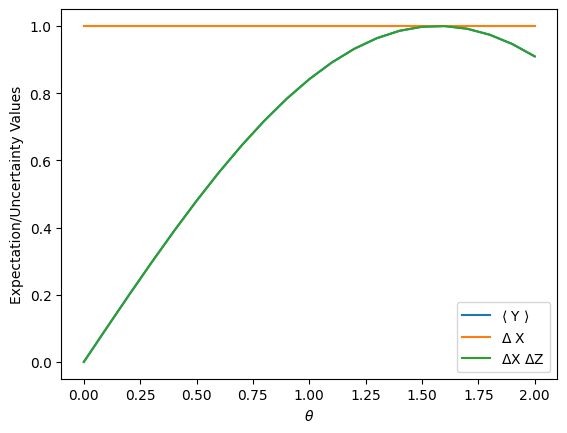

In [57]:
# The calculation below uses approximately 3-4 minutes of QPU time.
from qiskit.circuit import Parameter
import numpy as np

# Step 1: Map the problem to a quantum circuit

# Specify observables
obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Y")
obs3 = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Rotate away from |0> along one plane, and then along a transverse direction.
theta = Parameter("θ")
qc.ry(theta, 0)
qc.rz(pi / 2, 0)

params = np.linspace(0, 2, num=21)

# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend

job = noisy_estimator.run([(qc, [[obs1], [obs2], [obs3]], [params])])
res=job.result()

# Step 4: Post-processing and classical analysis.
xs = res[0].data.evs[0]
ys = abs(res[0].data.evs[1])
zs = res[0].data.evs[2]

# Calculate uncertainties

delx = []
delz = []
prodxz = []
for i in range(len(xs)):
    delx.append(abs((1 - xs[i] * xs[i])) ** 0.5)
    delz.append(abs((1 - zs[i] * zs[i])) ** 0.5)
    prodxz.append(delx[i] * delz[i])

# Here we can plot the results from this simulation.
import matplotlib.pyplot as plt

plt.plot(params, delx, label=r"$\Delta$ X")
plt.plot(params, ys, label=r"$\langle$ Y $\rangle$")
plt.plot(params, delz, label=r"$\Delta$ Z")
plt.plot(params, prodxz, label=r"$\Delta$X $\Delta$Z")
plt.xlabel(r"$\theta$")
plt.ylabel("Expectation/Uncertainty Values")
plt.legend()
plt.show()

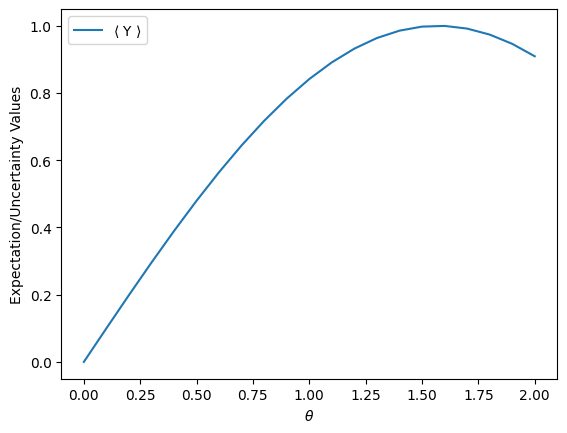

In [58]:
# Here we can plot the results from this simulation.
import matplotlib.pyplot as plt


plt.plot(params, ys, label=r"$\langle$ Y $\rangle$")

plt.xlabel(r"$\theta$")
plt.ylabel("Expectation/Uncertainty Values")
plt.legend()
plt.show()

The reason for these two plots i that we could not see the expectation value of Y from the above plot while showing the delta X delta Z, as they overlap with eachother. (I used simulation so there may be some error source missing here). 

<details>
  <summary>
    Modify the code above to make a similar picture, demonstrating that from measurements on the quantum computer the product $\Delta X \Delta Y$ behaves as it should. Choose any set of states you like.
  </summary>

  **Answer:**

  We would use exactly the code from the example above, and in face we could use the same results from above, just using the expectation values to calculate different uncertainties. For example, we could use

  ```
  xs=res[0].data.evs[0]
  ys=res[0].data.evs[1]
  zs=abs(res[0].data.evs[2])
  import math
  delx = []
  dely = []
  prodxy=[]|
  for i in range(len(xs)):
      delx.append((1-xs[i]*xs[i])**0.5)
      dely.append((1-ys[i]*ys[i])**0.5)
      prodxy.append(((1-xs[i]*xs[i])**0.5)*(1-ys[i]*ys[i])**0.5)
  ```

  and we could plot

  ```
  import matplotlib.pyplot as plt
  plt.plot(params, delx, label=r'$\Delta$ X')
  plt.plot(params, dely, label=r'$\langle$ Y $\rangle$')
  plt.plot(params, zs, label=r'$\Delta$ Z')
  plt.plot(params, prodxy, label=r'$\Delta$X $\Delta$Z')
  plt.xlabel(r'$\theta$')
  plt.ylabel('Expectation/Uncertainty Values')
  plt.legend()
  plt.show()
  ```
</details>



<>:60: SyntaxWarning: invalid escape sequence '\D'
<>:60: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jackz\AppData\Local\Temp\ipykernel_37708\4180619481.py:60: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Uncertainty Relation: $\Delta X \Delta Y \geq |\langle Z \\rangle|/2$")


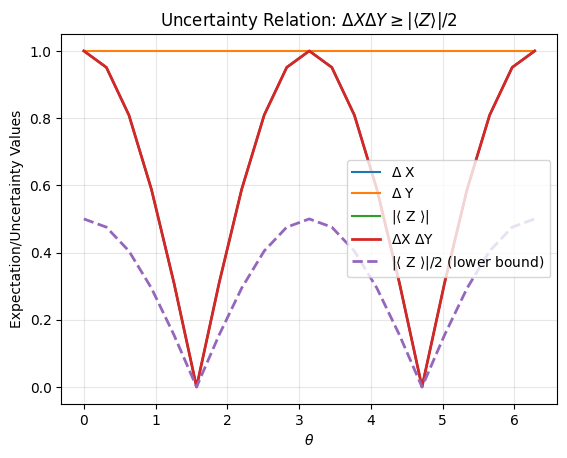

In [59]:
# The calculation below uses approximately 3-4 minutes of QPU time.
from qiskit.circuit import Parameter
import numpy as np

# Step 1: Map the problem to a quantum circuit
# Specify observables
obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Y")
obs3 = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Rotate away from |0> along the Y-axis
theta = Parameter("θ")
qc.ry(theta, 0)

params = np.linspace(0, 2*np.pi, num=21)

# Step 2: Transpile the circuit
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend
job = noisy_estimator.run([(qc, [[obs1], [obs2], [obs3]], [params])])
res = job.result()

# Step 4: Post-processing and classical analysis.
xs = res[0].data.evs[0]
ys = res[0].data.evs[1]
zs = abs(res[0].data.evs[2])

# Calculate uncertainties for X and Y
delx = []
dely = []
prodxy = []
lower_bound = []

for i in range(len(xs)):
    delx.append(abs((1 - xs[i] * xs[i])) ** 0.5)
    dely.append(abs((1 - ys[i] * ys[i])) ** 0.5)
    prodxy.append(delx[i] * dely[i])
    lower_bound.append(zs[i] / 2)  # Since [X,Y] = 2iZ, lower bound is |<Z>|/2

# Plot the results
import matplotlib.pyplot as plt
plt.plot(params, delx, label=r"$\Delta$ X")
plt.plot(params, dely, label=r"$\Delta$ Y")
plt.plot(params, zs, label=r"$|\langle$ Z $\rangle|$")
plt.plot(params, prodxy, label=r"$\Delta$X $\Delta$Y", linewidth=2)
plt.plot(params, lower_bound, '--', label=r"$|\langle$ Z $\rangle|$/2 (lower bound)", linewidth=2)
plt.xlabel(r"$\theta$")
plt.ylabel("Expectation/Uncertainty Values")
plt.legend()
plt.title("Uncertainty Relation: $\Delta X \Delta Y \geq |\langle Z \\rangle|/2$")
plt.grid(True, alpha=0.3)
plt.show()

<>:74: SyntaxWarning: invalid escape sequence '\D'
<>:74: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jackz\AppData\Local\Temp\ipykernel_37708\1304375764.py:74: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_title('Uncertainty Relation: $\Delta X \Delta Z \geq |\\langle Y \\rangle|/2$')


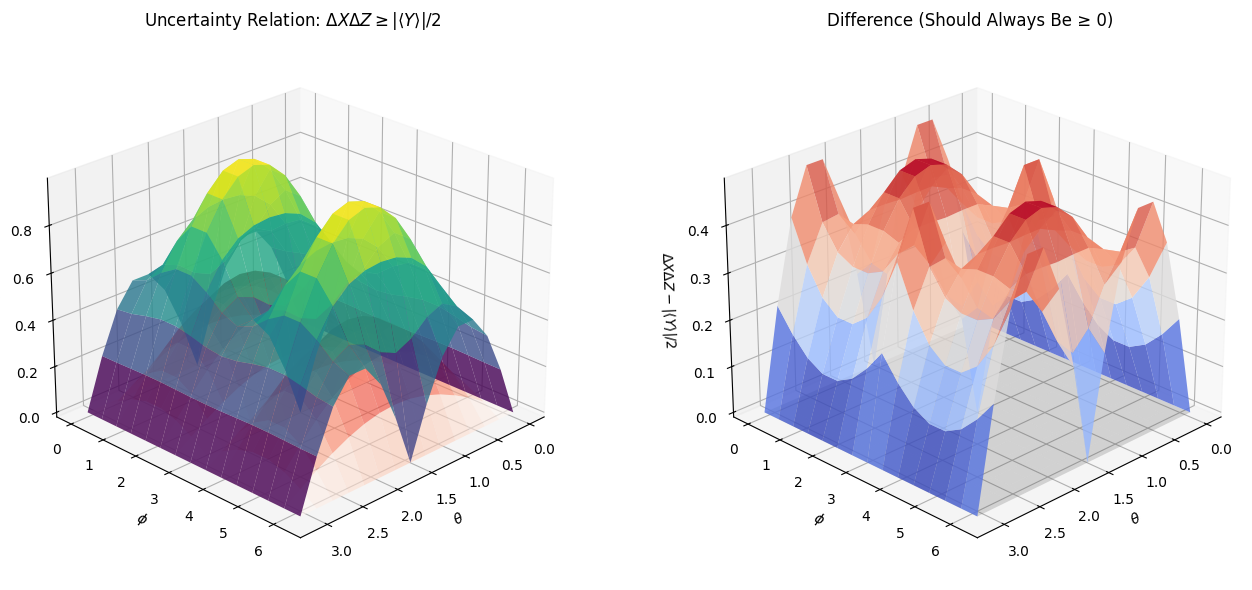

Minimum difference: -0.000000
Maximum difference: 0.487464
Uncertainty relation violated? False


In [61]:
# The calculation below uses more QPU time due to 2D parameter scan
from qiskit.circuit import Parameter
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Map the problem to a quantum circuit
# Specify observables - using X, Y, Z
obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Y")
obs3 = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Create general state using two rotation angles
theta = Parameter("θ")
phi = Parameter("φ")
qc.ry(theta, 0)
qc.rz(phi, 0)

# Create 2D parameter grid
theta_vals = np.linspace(0, np.pi, num=15)
phi_vals = np.linspace(0, 2*np.pi, num=15)

# Create list of parameter combinations
param_list = []
for t in theta_vals:
    for p in phi_vals:
        param_list.append([t, p])

# Step 2: Transpile the circuit
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)

# Run the job
job = noisy_estimator.run([(qc, [[obs1], [obs2], [obs3]], [param_list])])
res = job.result()

# Step 4: Post-processing
xs = res[0].data.evs[0]
ys = res[0].data.evs[1]
zs = res[0].data.evs[2]

# Clip values to [-1, 1] to handle numerical errors
xs = np.clip(xs, -1, 1)
ys = np.clip(ys, -1, 1)
zs = np.clip(zs, -1, 1)

# Calculate uncertainties with absolute value to ensure positive arguments
delx = np.array([np.sqrt(abs(1 - x**2)) for x in xs]).reshape(len(theta_vals), len(phi_vals))
delz = np.array([np.sqrt(abs(1 - z**2)) for z in zs]).reshape(len(theta_vals), len(phi_vals))
prodxz = delx * delz
lower_bound = np.abs(ys).reshape(len(theta_vals), len(phi_vals)) / 2

# Create meshgrid for 3D plotting
THETA, PHI = np.meshgrid(theta_vals, phi_vals, indexing='ij')

# Create 3D plot
fig = plt.figure(figsize=(14, 6))

# Plot 1: Product ΔX·ΔZ surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(THETA, PHI, prodxz, cmap='viridis', alpha=0.8, label='ΔX·ΔZ')
surf2 = ax1.plot_surface(THETA, PHI, lower_bound, cmap='Reds', alpha=0.6, label='|⟨Y⟩|/2')
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\phi$')
ax1.set_zlabel('Value')
ax1.set_title('Uncertainty Relation: $\Delta X \Delta Z \geq |\\langle Y \\rangle|/2$')
ax1.view_init(elev=25, azim=45)

# Plot 2: Difference (should always be positive)
ax2 = fig.add_subplot(122, projection='3d')
difference = prodxz - lower_bound
surf3 = ax2.plot_surface(THETA, PHI, difference, cmap='coolwarm', alpha=0.8)
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\phi$')
ax2.set_zlabel(r'$\Delta X \Delta Z - |\langle Y \rangle|/2$')
ax2.set_title('Difference (Should Always Be ≥ 0)')
ax2.view_init(elev=25, azim=45)

# Add a horizontal plane at z=0 for reference
xx, yy = np.meshgrid(theta_vals, phi_vals)
ax2.plot_surface(xx.T, yy.T, np.zeros_like(difference), alpha=0.2, color='gray')

plt.tight_layout()
plt.show()

# Print verification
print(f"Minimum difference: {np.min(difference):.6f}")
print(f"Maximum difference: {np.max(difference):.6f}")
print(f"Uncertainty relation violated? {np.any(difference < -1e-10)}")

## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts:

*   There are uncertainty relations between many sets of physical observables, including position & linear momentum, and components of spin.
*   The Pauli matrices do not commute. This is a mathematical reflection of the fact that not all components of spin can be simultaneously known/determined.
*   Quantum computing makes heavy use of the Pauli operators/matrices, so it is useful to know the uncertainty relation for Pauli operators, as well as the closely-related spin operators.
*   A general formula for the uncertainty of two operators $A$ and $B$ is $\Delta A \Delta B \geq \frac{1}{2}|\langle [A,B] \rangle|.$
*   An eigenstate $|a\rangle$ of some operator $A$ yields zero uncertainty in the physical observable associated with that operator. Even experimentally, $\langle a|A|a\rangle \approx 0.$
*   An eigenstate $|a\rangle$ of some operator $A$ will yield a larger uncertainty for an operator $B$ that does not commute with $A$.
*   Experimental results using a real quantum computer confirm the intuition we gain from matrix representations of physical operators.

### T/F Questions:

1.  T/F One can simultaneously measure $X$ and $Y$, but not $Z$.
2.  T/F One can simultaneously measure $X$ and $Z$, but not $Y$.
3.  T/F Linear position and linear momentum operators do not commute.
4.  T/F IBM quantum computers measure along $Z$ by default, so a rotation must be performed to measure along any other direction.
5.  T/F The circuit below effectively measures $Z$ and then $X$.

![A circuit diagram showing a measurement, a Hadamard gate, and then another measurement.](/learning/images/modules/quantum-mechanics/exploring-uncertainty-with-qiskit/tf-q5.avif)

### MC Questions:

1.  The diagram below demonstrates which of the following uncertainty relations?

    *   a. $\Delta X \Delta Y \geq |\langle Z \rangle|$
    *   b. $\Delta Y \Delta Z \geq |\langle X \rangle|$
    *   c. $\Delta Z \Delta X \geq |\langle Y \rangle|$
    *   d. None of the above

![A plot comparing uncertainty to the maximum expectation value of the Y operator.](/learning/images/modules/quantum-mechanics/exploring-uncertainty-with-qiskit/checkin.avif)

2.  Which of the following is the standard sequence to perform a measurement along $x$?
    *   a. Only `qc.measure()`
    *   b. `qc.h()` then `qc.measure()`
    *   c. `qc.h()`, `qc.h()` then `qc.measure()`
    *   d. `qc.h()`, `qc.s`, `qc.h()`then `qc.measure()`
    *   e. `qc.sdg()`, `qc.h()`, `qc.s` then `qc.measure()`
    *   f. `qc.sdg()`, `qc.h()`, `qc.s`, `qc.h()` then `qc.measure()`

3.  Which of the following states yields the largest expectation value $\langle X \rangle$?
    *   a. $|+\rangle_x$
    *   b. $|-\rangle_x$
    *   c. $|+\rangle_y$ also called $|+i\rangle$
    *   d. $|-\rangle_y$ also called $|-i\rangle$
    *   e. $|0\rangle$ also called $|\uparrow\rangle$
    *   f. $|1\rangle$ also called $|\downarrow\rangle$

4.  Which of the following states yields the largest uncertainty $\Delta X$?
    *   a. $|+\rangle_x$
    *   b. $|+\rangle_y$ also called $|+i\rangle$
    *   c. $|0\rangle$ also called $|\uparrow\rangle$
    *   d. a and b are tied
    *   e. b and c are tied
    *   f. a, b, and c are tied

### Discussion Questions:

1.  Does this concept of uncertainty conflict in any way with the notion of spin as a vector arrow in Cartesian space? How about on the Bloch sphere?

2.  Suppose you orient a measurement device along a direction half-way between the $x$ and $y$ axes. What happens? Can you make a measurement along this direction? How does this relate to uncertainty in $X$ and $Y$?

3.  What additional experiments would you like to do to convince yourself of the results obtained here?



T/F
1. F
2. F
3. T
4. T?
5. T, Hardmard gate turns Z to X

MC:
1. c
2. b
3. a
4. e

Discussion Questions:
1. A classical vector has zero uncertainty in all components simultaneously, which violates the commutation relations.
2. Yes we can, but the uncertainty relation will maintain the same. While we measure the direction and get a result, we will still be get the uncertainty in X and Y.

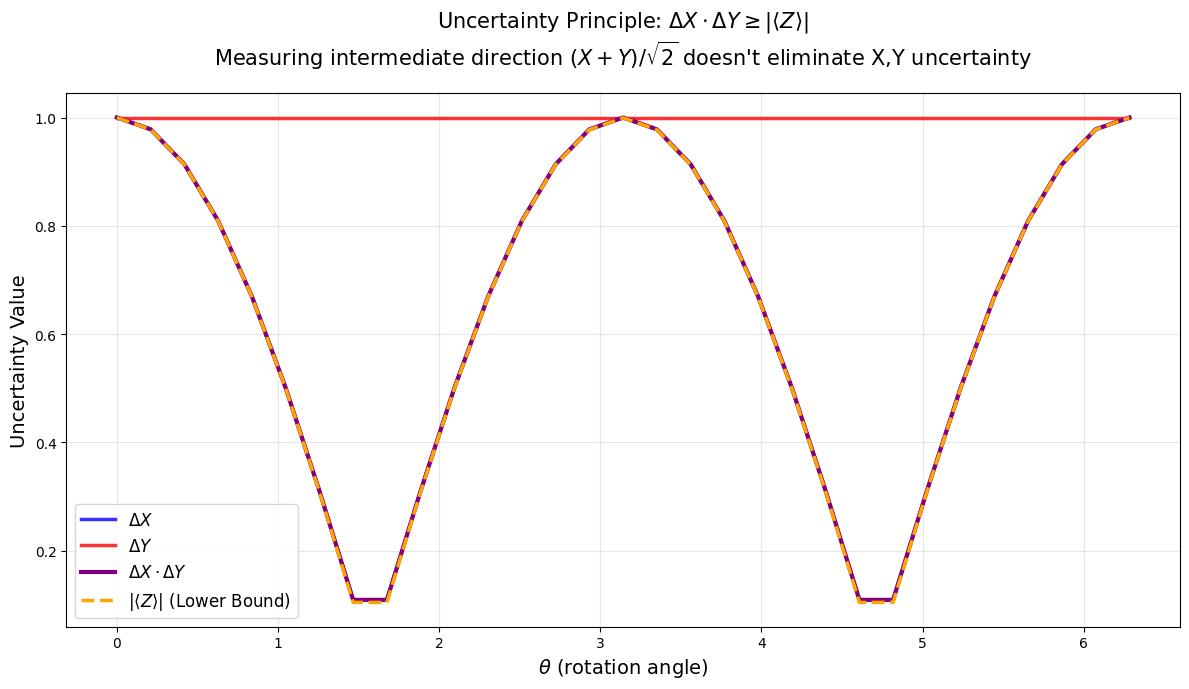

In [87]:
# Exploring measurements in intermediate directions
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
import numpy as np

# Step 1: Define observables
obs_x = SparsePauliOp("X")
obs_y = SparsePauliOp("Y")
obs_z = SparsePauliOp("Z")

# Observable halfway between X and Y: (X + Y)/√2
obs_intermediate = (obs_x + obs_y) / np.sqrt(2)

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Rotate away from |0> using RY to explore different states
theta = Parameter("θ")
qc.ry(theta, 0)
params = np.linspace(0, 2*np.pi, num=31)

# Step 2: Transpile the circuit
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs_x_isa = obs_x.apply_layout(layout=qc_isa.layout)
obs_y_isa = obs_y.apply_layout(layout=qc_isa.layout)
obs_z_isa = obs_z.apply_layout(layout=qc_isa.layout)
obs_int_isa = obs_intermediate.apply_layout(layout=qc_isa.layout)

# Step 3: Run the job
job = noisy_estimator.run([(qc_isa, [[obs_x_isa], [obs_y_isa], [obs_z_isa], [obs_int_isa]], [params])])
res = job.result()

# Step 4: Post-processing and classical analysis
xs = res[0].data.evs[0]
ys = res[0].data.evs[1]
zs = abs(res[0].data.evs[2])

# Calculate uncertainties
delx = []
dely = []
prodxy = []
uncertainty_bound = []

for i in range(len(xs)):
    delx.append(np.sqrt(abs(1 - xs[i]**2)))
    dely.append(np.sqrt(abs(1 - ys[i]**2)))
    prodxy.append(delx[i] * dely[i])
    uncertainty_bound.append(zs[i])

# Single plot that tells the complete story
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(params, delx, 'b-', label=r"$\Delta X$", linewidth=2.5, alpha=0.8)
plt.plot(params, dely, 'r-', label=r"$\Delta Y$", linewidth=2.5, alpha=0.8)
plt.plot(params, prodxy, 'purple', label=r"$\Delta X \cdot \Delta Y$", linewidth=3)
plt.plot(params, uncertainty_bound, 'orange', label=r"$|\langle Z \rangle|$ (Lower Bound)", linewidth=2.5, linestyle='--')

plt.xlabel(r"$\theta$ (rotation angle)", fontsize=14)
plt.ylabel("Uncertainty Value", fontsize=14)
plt.title(r"Uncertainty Principle: $\Delta X \cdot \Delta Y \geq |\langle Z \rangle|$" + "\n" + 
          r"Measuring intermediate direction $(X+Y)/\sqrt{2}$ doesn't eliminate X,Y uncertainty", 
          fontsize=15, pad=20)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

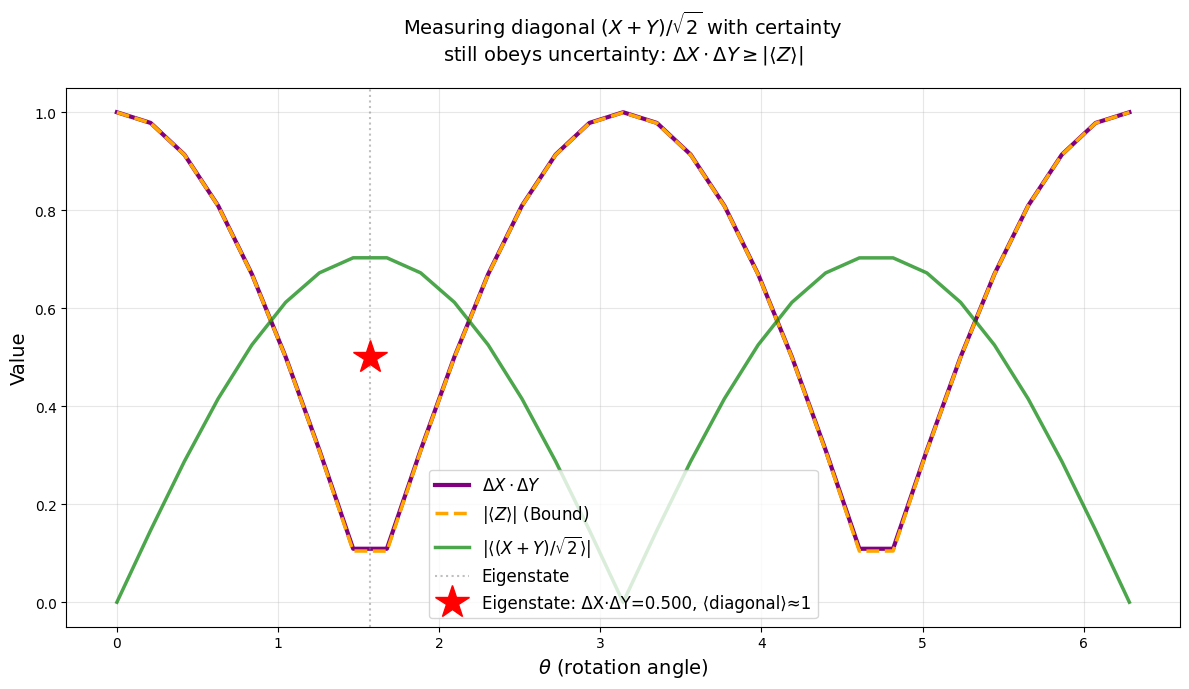


=== Eigenstate of (X+Y)/√2 ===
⟨(X+Y)/√2⟩ = 0.9997 ≈ 1 ✓ (measured with certainty)
But ΔX·ΔY = 0.5003
Bound |⟨Z⟩| = 0.0001
Uncertainty satisfied: 0.5003 ≥ 0.0001 ✓


In [89]:
# Demonstrating eigenstate of intermediate observable
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
import numpy as np

# Step 1: Define observables
obs_x = SparsePauliOp("X")
obs_y = SparsePauliOp("Y")
obs_z = SparsePauliOp("Z")

# Observable halfway between X and Y: (X + Y)/√2
obs_intermediate = (obs_x + obs_y) / np.sqrt(2)

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")

# Create TWO circuits to compare:

# Circuit 1: Eigenstate of (X+Y)/√2
qc_eigen = QuantumCircuit(qr, cr)
qc_eigen.ry(np.pi/2, 0)  # Rotate to XY plane
qc_eigen.rz(np.pi/4, 0)   # Rotate to diagonal between X and Y

# Circuit 2: Varying states
qc_vary = QuantumCircuit(qr, cr)
theta = Parameter("θ")
qc_vary.ry(theta, 0)
params = np.linspace(0, 2*np.pi, num=31)

# Step 2: Transpile both circuits
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_eigen_isa = pm.run(qc_eigen)
qc_vary_isa = pm.run(qc_vary)

obs_x_isa = obs_x.apply_layout(layout=qc_vary_isa.layout)
obs_y_isa = obs_y.apply_layout(layout=qc_vary_isa.layout)
obs_z_isa = obs_z.apply_layout(layout=qc_vary_isa.layout)
obs_int_isa = obs_intermediate.apply_layout(layout=qc_vary_isa.layout)

# Step 3: Run jobs
job_eigen = noisy_estimator.run([(qc_eigen_isa, [obs_x_isa, obs_y_isa, obs_z_isa, obs_int_isa])])
res_eigen = job_eigen.result()

job_vary = noisy_estimator.run([(qc_vary_isa, [[obs_x_isa], [obs_y_isa], [obs_z_isa], [obs_int_isa]], [params])])
res_vary = job_vary.result()

# Step 4: Post-processing
# Eigenstate results
x_eigen = res_eigen[0].data.evs[0]
y_eigen = res_eigen[0].data.evs[1]
z_eigen = abs(res_eigen[0].data.evs[2])
int_eigen = res_eigen[0].data.evs[3]
delx_eigen = np.sqrt(abs(1 - x_eigen**2))
dely_eigen = np.sqrt(abs(1 - y_eigen**2))
prodxy_eigen = delx_eigen * dely_eigen

# Varying state results
xs = res_vary[0].data.evs[0]
ys = res_vary[0].data.evs[1]
zs = abs(res_vary[0].data.evs[2])
int_vals = res_vary[0].data.evs[3]

delx = []
dely = []
prodxy = []
uncertainty_bound = []

for i in range(len(xs)):
    delx.append(np.sqrt(abs(1 - xs[i]**2)))
    dely.append(np.sqrt(abs(1 - ys[i]**2)))
    prodxy.append(delx[i] * dely[i])
    uncertainty_bound.append(zs[i])  # Correct bound: |⟨Z⟩|

# Clean, focused plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Main curves
plt.plot(params, prodxy, 'purple', label=r"$\Delta X \cdot \Delta Y$", linewidth=3)
plt.plot(params, uncertainty_bound, 'orange', label=r"$|\langle Z \rangle|$ (Bound)", linewidth=2.5, linestyle='--')
plt.plot(params, abs(int_vals), 'green', label=r"$|\langle (X+Y)/\sqrt{2} \rangle|$", linewidth=2.5, alpha=0.7)

# Eigenstate marker
eigen_pos = np.pi/2
plt.axvline(x=eigen_pos, color='gray', linestyle=':', linewidth=1.5, alpha=0.5, label='Eigenstate')
plt.plot(eigen_pos, prodxy_eigen, 'r*', markersize=25, 
         label=f'Eigenstate: ΔX·ΔY={prodxy_eigen:.3f}, ⟨diagonal⟩≈1')

plt.xlabel(r"$\theta$ (rotation angle)", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.title(r"Measuring diagonal $(X+Y)/\sqrt{2}$ with certainty" + "\n" + 
          r"still obeys uncertainty: $\Delta X \cdot \Delta Y \geq |\langle Z \rangle|$", 
          fontsize=14, pad=20)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== Eigenstate of (X+Y)/√2 ===")
print(f"⟨(X+Y)/√2⟩ = {int_eigen:.4f} ≈ 1 ✓ (measured with certainty)")
print(f"But ΔX·ΔY = {prodxy_eigen:.4f}")
print(f"Bound |⟨Z⟩| = {z_eigen:.4f}")
print(f"Uncertainty satisfied: {prodxy_eigen:.4f} ≥ {z_eigen:.4f} ✓")

# 2025/10/31


# 2 Quantum Basics: From States to Circuits and Protocols

## 2.a Quantum Circuit Visulizations

### Tutorial 1: Visualize circuits

In [1]:
from qiskit import QuantumCircuit

## Draw a quantum circuit

The `QuantumCircuit` class supports drawing circuits through the `draw()` method, or by printing the circuit object. By default, both render an ASCII art version of the circuit diagram.

Note that `print` returns `None` but has the side effect of printing the diagram, whereas `QuantumCircuit.draw` returns the diagram with no side effects. Since Jupyter notebooks display the output of the last line of each cell, they appear to have the same effect.



In [2]:
# Build a quantum circuit
# have 3 qubits
circuit = QuantumCircuit(3, 3)

# apply X to q_1
circuit.x(1)

# apply hardmard to all 3 (range (3)) refers to all three)
circuit.h(range(3))

# apply control-X, control by 0, apply on 1
circuit.cx(0, 1)

# measure all 3 qubits
circuit.measure(range(3), range(3));

In [3]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


In [4]:
circuit.draw()

┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1

### Alternative renderers

A text output is useful for quickly seeing the output while developing a circuit, but it doesn't provide the most flexibility. There are two alternative output renderers for the quantum circuit. One uses [Matplotlib](https://matplotlib.org/) and the other uses [LaTeX](https://www.latex-project.org/). The LaTeX renderer requires the [qcircuit package](https://github.com/CQuIC/qcircuit). Select these renderers by setting the "output" argument to the strings `mpl` and `latex`.



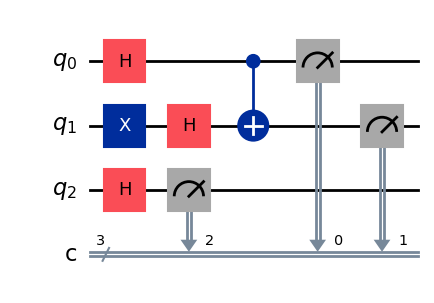

In [5]:
# Matplotlib drawing
circuit.draw(output="mpl")

### Save output

Drawing a large-scale circuit inline in a Jupyter notebook can be slow or unreadable.
You can save the diagram directly to a file, then open it in an image viewer and zoom in as needed.



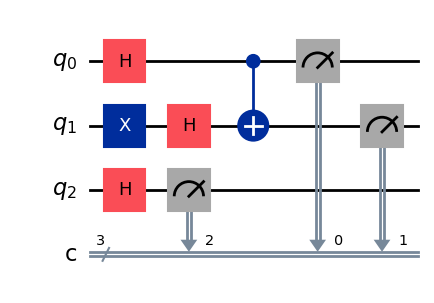

In [7]:
# Save as an image using the Matplotlib drawer
circuit.draw(output="mpl", filename="circuit-mpl.jpeg")

### Control circuit drawings

By default, the `draw()` method returns the rendered image as an object and does not output anything. The exact class returned depends on the output specified: `'text'` (the default) returns a `TextDrawer` object, `'mpl'` returns a `matplotlib.Figure` object, and `latex` returns a `PIL.Image` object. Jupyter notebooks understand these return types and render them properly, but when running outside of Jupyter, images will not display automatically.

The `draw()` method has optional arguments to display or save the output. When specified, the `filename` kwarg takes a path to which it saves the rendered output. Alternatively, if you're using the `mpl` or `latex` outputs, you can use the `interactive` kwarg to open the image in a new window (this will not always work from within a notebook).



### Customize the output

Depending on the output, there are also options to customize the circuit diagram.

#### Disable plot barriers and reverse bit order

The first two options are shared among all three backends. They allow you to configure both the bit orders and whether or not you draw barriers. These can be set by the `reverse_bits` kwarg and `plot_barriers` kwarg, respectively. The following examples work with any output renderer; `mpl` is used here for brevity.



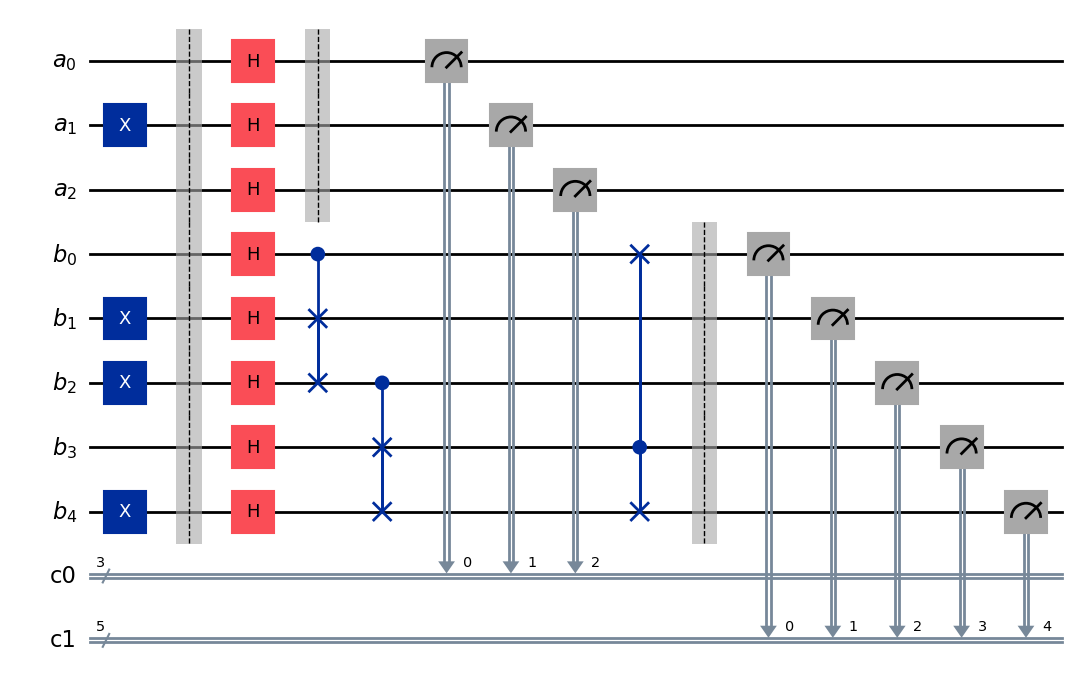

In [8]:
from qiskit import QuantumRegister, ClassicalRegister

# Draw a new circuit with barriers and more registers
q_a = QuantumRegister(3, name="a")
q_b = QuantumRegister(5, name="b")
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)

circuit = QuantumCircuit(q_a, q_b, c_a, c_b)
circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);

# Draw the circuit
circuit.draw(output="mpl")

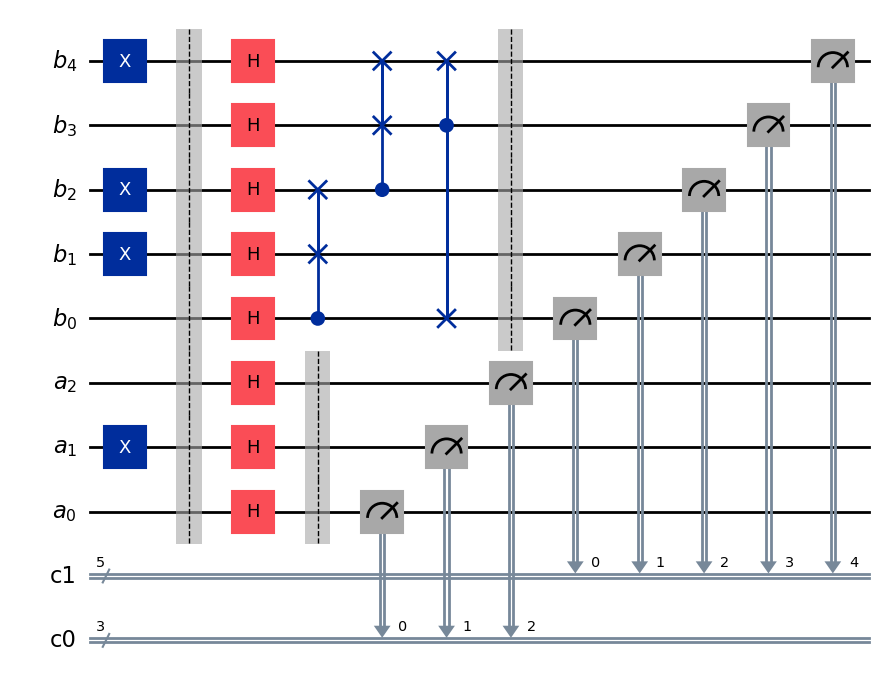

In [9]:
# Draw the circuit with reversed bit order
circuit.draw(output="mpl", reverse_bits=True)

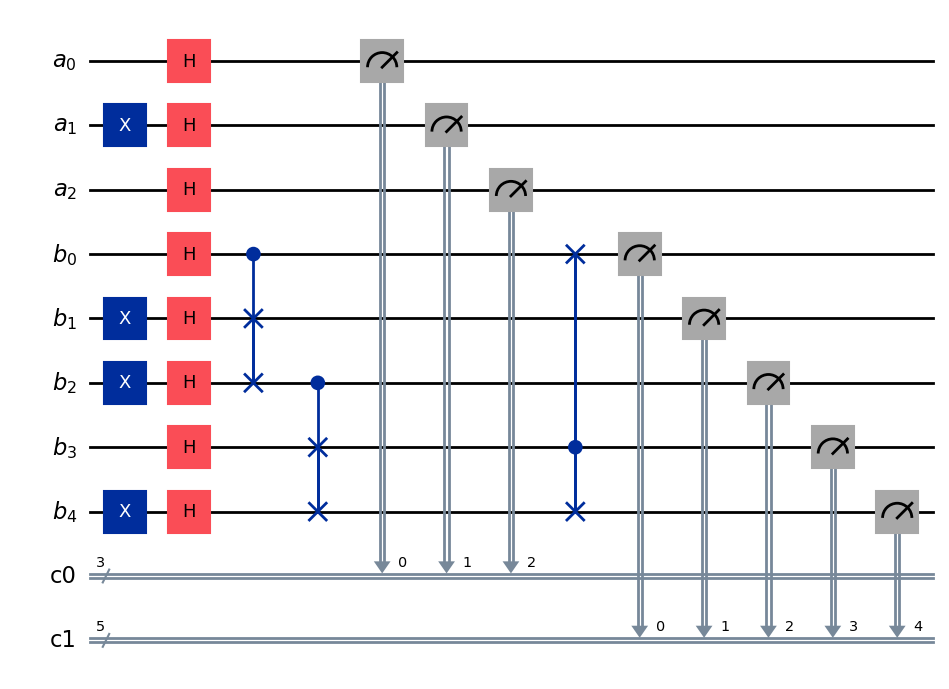

In [10]:
# Draw the circuit without barriers
circuit.draw(output="mpl", plot_barriers=False)

### Renderer-specific customizations

Some available customizing options are specific to a renderer.

The `fold` argument sets a maximum width for the output. In the `text` renderer, this sets the length of the lines of the diagram before it is wrapped to the next line.  When using the 'mpl' renderer, this is the number of (visual) layers before folding to the next line.

The `mpl` renderer has the `style` kwarg, which changes the colors and outlines. See the [API documentation](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#draw) for more details.

The `scale` option scales the output of the `mpl` and `latex` renderers.



In [11]:
circuit = QuantumCircuit(1)
for _ in range(10):
    circuit.h(0)
# limit line length to 40 characters
circuit.draw(output="text", fold=40)

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
q: ┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├»
   └───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«   ┌───┐┌───┐┌───┐
«q: ┤ H ├┤ H ├┤ H ├
«   └───┘└───┘└───┘

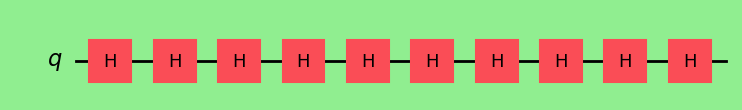

In [12]:
# Change the background color in mpl

style = {"backgroundcolor": "lightgreen"}
circuit.draw(output="mpl", style=style)

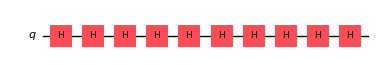

In [13]:
# Scale the mpl output to 1/2 the normal size
circuit.draw(output="mpl", scale=0.5)

### Standalone circuit-drawing function

If you have an application where you prefer to draw a circuit with a self-contained function instead of as a method of a circuit object, you can directly use the `circuit_drawer()` function, which is part of the public stable interface from `qiskit.visualization`. The function behaves identically to the `circuit.draw()` method, except that it takes in a circuit object as a required argument.



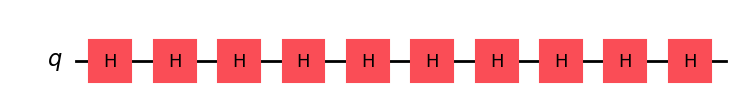

In [14]:
from qiskit.visualization import circuit_drawer

circuit_drawer(circuit, output="mpl", plot_barriers=False)

## Tutorial 2: Plot quantum states

In many situations – such as learning or debugging – it's helpful to visualize the state of a quantum computer. Here we assume you already have a particular state from simulation or state tomography.  It's only possible to view the states of small quantum systems.

<Admonition title="Using the output from functions" type="tip">
  All functions on this page return rich objects. When the last line of a code cell outputs these objects, Jupyter notebooks display them below the cell. If you call these functions in some other environments or in scripts, you will need to explicitly show or save the outputs.

  Most functions return images, which are `matplotlib.Figure` objects. Two options are:

  *   Call `.show()` on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive).
  *   Call `.savefig("out.png")` to save the figure to `out.png` in the current working directory. The `savefig()` method takes a path so you can adjust the location and filename where you're saving the output. For example, `plot_state_city(psi).savefig("out.png")`.

  The LaTeX outputs are `IPython.display.Latex` objects. The best option in a non-Jupyter environment is to avoid this output by either printing the state for a text representation, or switching to the `latex_source` drawer to return a LaTeX source string.
</Admonition>

A quantum state is either a density matrix $\rho$ (Hermitian matrix) or statevector $|\psi\rangle$ (complex vector). The density matrix is related to the statevector by

$\rho = |\psi\rangle\langle \psi|,$

and is more general, as it can represent mixed states (positive sum of statevectors)

$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |.$

Qiskit represents quantum states through the `Statevector` and `DensityMatrix` classes and provides many visualization functions. See the sections after the following the code cell to see how Qiskit's different visualization functions plot the following quantum state.



In [15]:
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a Bell state for demonstration
qc = QuantumCircuit(2)
qc.h(0)
qc.crx(pi / 2, 0, 1)
psi = Statevector(qc)

### City
This plot displays the real and imaginary parts of each density-matrix element as two 3D bar charts.

The state we’re plotting has density matrix
$$
\begin{bmatrix}
\frac{1}{2} & \frac{\sqrt{2}}{4} & 0 & \frac{\sqrt{2} i}{4}  \\
\frac{\sqrt{2}}{4} & \frac{1}{4} & 0 & \frac{i}{4}  \\
0 & 0 & 0 & 0  \\
- \frac{\sqrt{2} i}{4} & - \frac{i}{4} & 0 & \frac{1}{4}  \\
\end{bmatrix}
=
\underbrace{\begin{bmatrix}
\frac{1}{2} & \frac{\sqrt{2}}{4} & 0 & 0 \\
\frac{\sqrt{2}}{4} & \frac{1}{4} & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & \frac{1}{4}
\end{bmatrix}}_{\text{Real part}}
\;+\;
i\,\underbrace{\begin{bmatrix}
0 & 0 & 0 & \frac{\sqrt{2}}{4} \\
0 & 0 & 0 & \frac{1}{4} \\
0 & 0 & 0 & 0 \\
-\frac{\sqrt{2}}{4} & -\frac{1}{4} & 0 & 0
\end{bmatrix}}_{\text{Imag part (real numbers)}}
$$


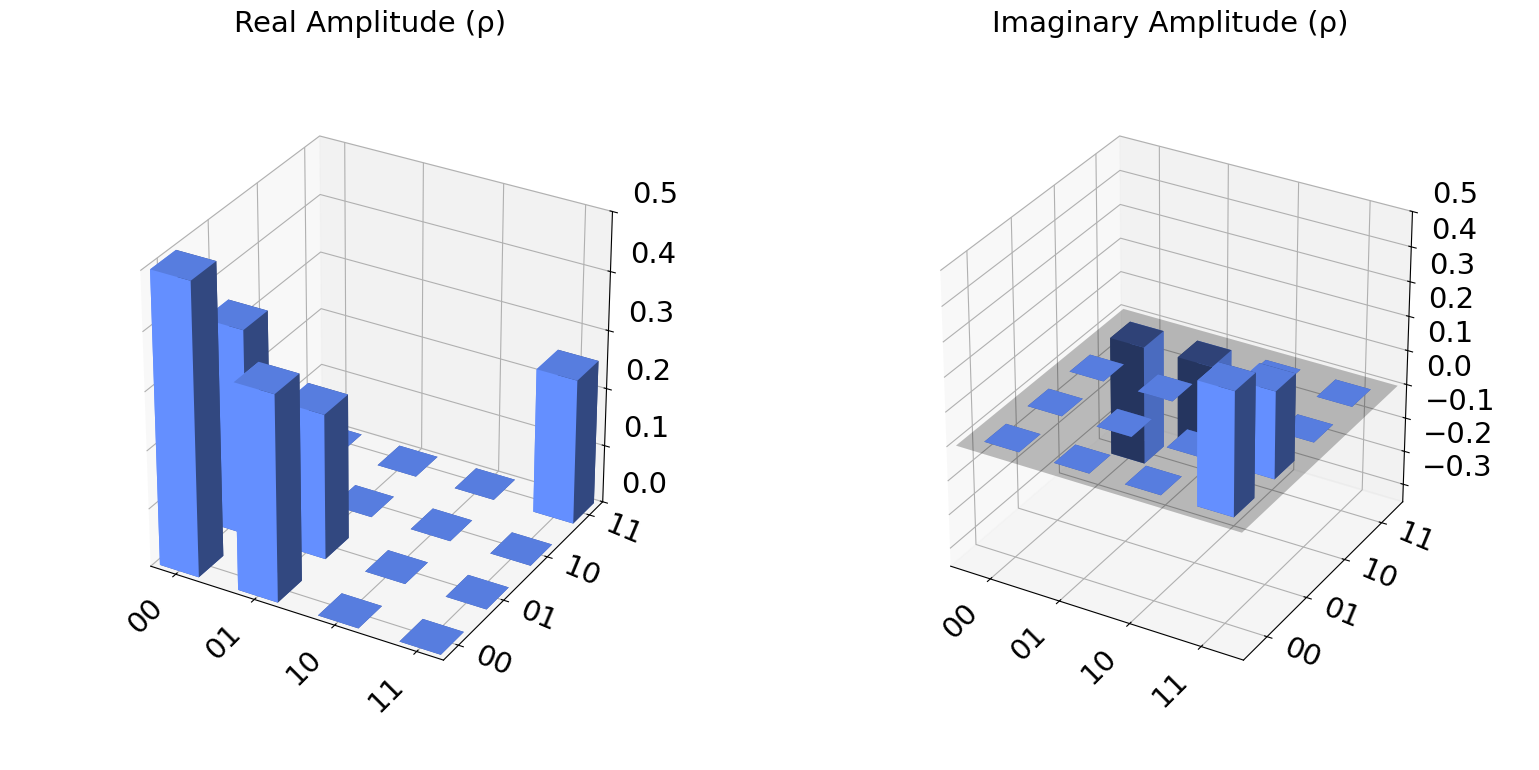

In [16]:
from qiskit.visualization import plot_state_city
 
plot_state_city(psi)
# Alternative: psi.draw("city")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

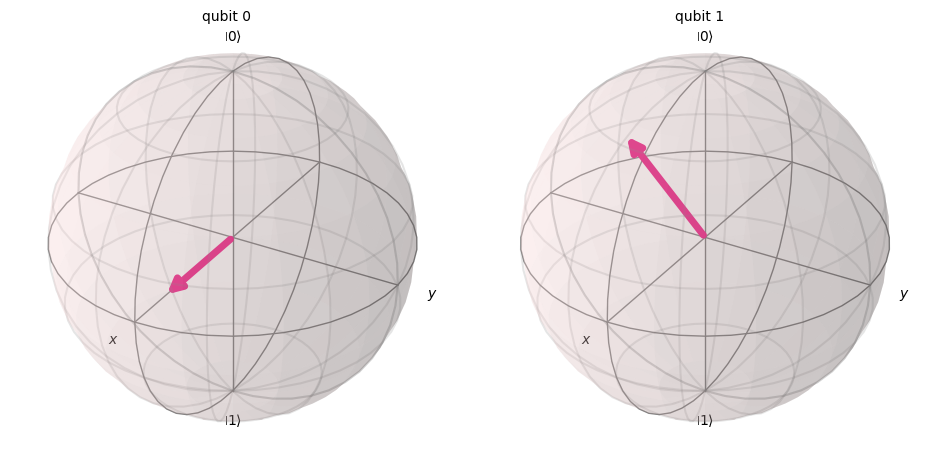

In [17]:
# !pip install qiskit  # uncomment if needed

import numpy as np
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import (
    plot_state_city, plot_state_hinton, plot_state_paulivec, plot_state_qsphere, plot_bloch_multivector
)
from IPython.display import display, Latex

# Example state (your matrix from the text)
rho = np.array([
    [1/2,  np.sqrt(2)/4, 0,         1j*np.sqrt(2)/4],
    [np.sqrt(2)/4, 1/4,  0,         1j/4],
    [0,             0,   0,         0],
    [-1j*np.sqrt(2)/4, -1j/4, 0,    1/4]
], dtype=complex)

dm = DensityMatrix(rho)

# LaTeX rendering (works nicely in Jupyter)
sv = Statevector([1, 0])  # example statevector
display(dm.draw('latex'))               # pretty LaTeX for density matrix
display(Latex(dm.draw('latex_source'))) # raw LaTeX source
display(sv.draw('latex'))               # pretty LaTeX for statevector
display(Latex(sv.draw('latex_source'))) # raw LaTeX source

# Plots
plot_state_city(dm)        # "City" plot
plot_state_hinton(dm)      # Hinton plot
plot_state_paulivec(dm)    # Pauli-vector bar chart
plot_state_qsphere(dm)     # Qsphere (mixed states supported)
plot_bloch_multivector(dm) # Bloch spheres per qubit (projection)


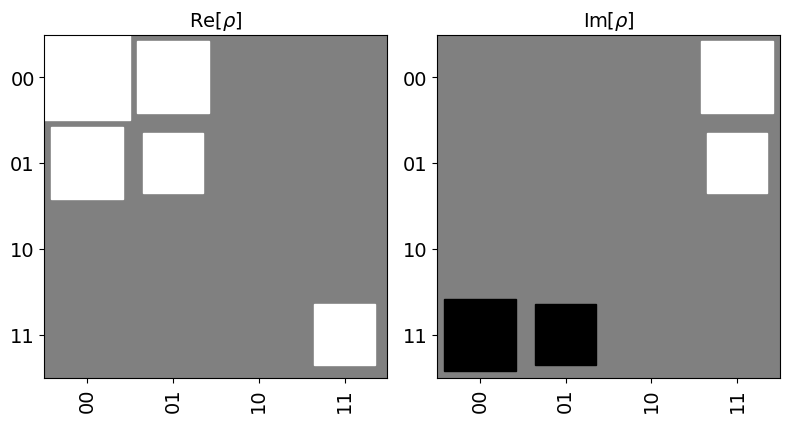

In [18]:
from qiskit.visualization import plot_state_hinton

plot_state_hinton(psi)
# Alternative: psi.draw("hinton")

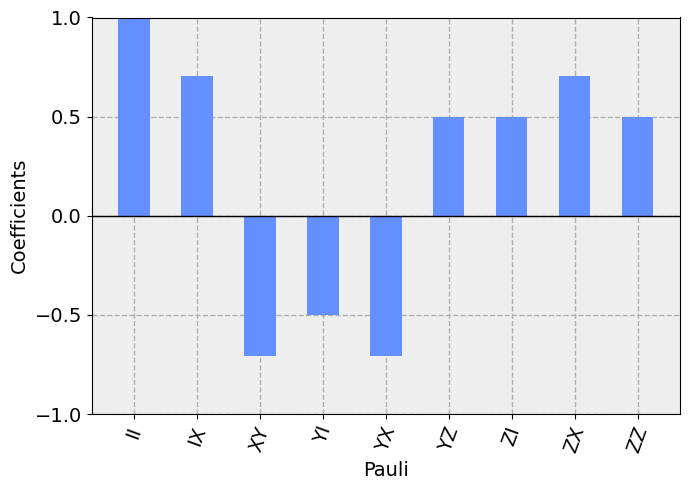

In [19]:
from qiskit.visualization import plot_state_paulivec

plot_state_paulivec(psi)
# Alternative: psi.draw("paulivec")

In [20]:
from qiskit.quantum_info import SparsePauliOp

SparsePauliOp.from_operator(psi)

SparsePauliOp(['II', 'IX', 'XY', 'YI', 'YX', 'YZ', 'ZI', 'ZX', 'ZZ'],
              coeffs=[ 0.25     +0.j,  0.1767767+0.j, -0.1767767+0.j, -0.125    +0.j,
 -0.1767767+0.j,  0.125    +0.j,  0.125    +0.j,  0.1767767+0.j,
  0.125    +0.j])

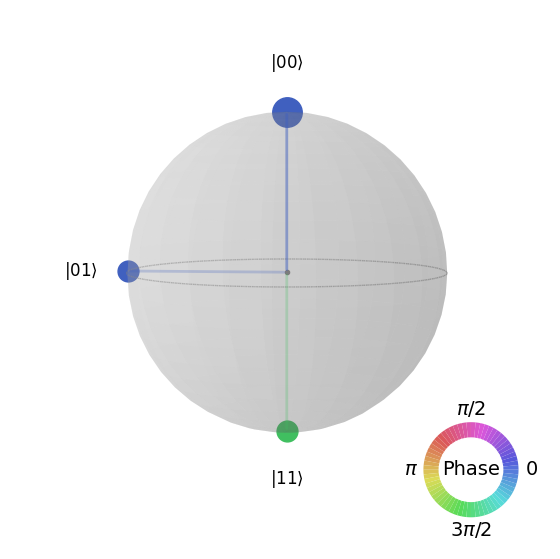

In [21]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(psi)
# Alternative: psi.draw("qsphere")

### Tutorial 3: IBM Quantum Composer

As the composer is a external method, no content will be shown here, but try and use the composer. 

## 2.b Basic Quantum Protocols

# Deutsch's algorithm

Deutsch's algorithm solves the parity problem for the special case that $n = 1.$
In the context of quantum computing this problem is sometimes referred to as *Deutsch's problem*, and we'll follow that nomenclature in this lesson.

To be precise, the input is represented by a function $f:\Sigma \rightarrow \Sigma$ from one bit to one bit.
There are four such functions:

$$
\rule[-10mm]{0mm}{10mm}
\begin{array}{c|c}
  a & f_1(a)\\
  \hline
  0 & 0\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_2(a)\\
  \hline
  0 & 0\\
  1 & 1
\end{array}
\qquad
\begin{array}{c|c}
  a & f_3(a)\\
  \hline
  0 & 1\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_4(a)\\
  \hline
  0 & 1\\
  1 & 1
\end{array}
$$

The first and last of these functions are *constant* and the middle two are *balanced*, meaning that the two possible output values for the function occur the same number of times as we range over the inputs.
Deutsch's problem is to determine which of these two categories the input function belongs to: constant or balanced.

<Figure title="Deutsch's problem">
  Input:  a function $f:\{0,1\}\rightarrow\{0,1\}$ \
  Output: $0$ if $f$ is constant, $1$ if $f$ is balanced
</Figure>

If we view the input function $f$ in Deutsch's problem as representing random access to a string, we're thinking about a two-bit string: $f(0)f(1).$

$$
\begin{array}{cc}
\mathsf{function} & \mathsf{string}\\
\hline
f_1 & 00 \\
f_2 & 01 \\
f_3 & 10 \\
f_4 & 11
\end{array}
$$

When viewed in this way, Deutsch's problem is to compute the parity (or, equivalently, the exclusive-OR) of the two bits.

Every classical query algorithm that correctly solves this problem must query both bits: $f(0)$ and $f(1).$
If we learn that $f(1) = 1,$ for instance, the answer could still be $0$ or $1,$ depending on whether $f(0) = 1$ or $f(0) = 0,$ respectively.
Every other case is similar; knowing just one of two bits doesn't provide any information at all about their parity.
So, the Boolean circuit described in the previous section is the best we can do in terms of the number of queries required to solve this problem.

## Quantum circuit description

Deutsch's algorithm solves Deutsch's problem using a single query, therefore providing a quantifiable advantage of quantum over classical computations.
This may be a modest advantage — one query as opposed to two — but we have to start somewhere.
Scientific advances sometimes have seemingly humble origins.

## Analysis

The initial state is $\vert 1\rangle \vert 0 \rangle,$ and the two Hadamard operations on the left-hand side of the circuit transform this state to

$$
\vert \pi_1 \rangle = \vert - \rangle \vert + \rangle
= \frac{1}{2} \bigl( \vert 0\rangle - \vert 1\rangle \bigr) \vert 0\rangle
+ \frac{1}{2} \bigl( \vert 0\rangle - \vert 1\rangle \bigr) \vert 1\rangle.
$$

(As always, we're following Qiskit's qubit ordering convention, which puts the top qubit to the right and the bottom qubit to the left.)

Next, the $U_f$ gate is performed.
According to the definition of the $U_f$ gate, the value of the function $f$ for the classical state of the top/rightmost qubit is XORed onto the bottom/leftmost qubit, which transforms $\vert \pi_1\rangle$ into the state

$$
\vert \pi_2 \rangle
= \frac{1}{2} \bigl( \vert 0 \oplus f(0) \rangle - \vert 1 \oplus f(0) \rangle \bigr) \vert 0 \rangle
+ \frac{1}{2} \bigl( \vert 0 \oplus f(1) \rangle - \vert 1 \oplus f(1) \rangle \bigr) \vert 1 \rangle.
$$

We can simplify this expression by observing that the formula

$$
\vert 0 \oplus a\rangle - \vert 1 \oplus a\rangle = (-1)^a \bigl( \vert 0\rangle - \vert 1\rangle \bigr)
$$

works for both possible values $a\in\Sigma.$
More explicitly, the two cases are as follows.

$$
\begin{aligned}
\vert 0 \oplus 0\rangle - \vert 1 \oplus 0\rangle
& = \vert 0 \rangle - \vert 1 \rangle
= (-1)^0 \bigl( \vert 0\rangle - \vert 1\rangle \bigr)\\
\vert 0 \oplus 1\rangle - \vert 1 \oplus 1\rangle & = \vert 1 \rangle - \vert 0\rangle
= (-1)^1 \bigl( \vert 0\rangle - \vert 1\rangle \bigr)
\end{aligned}
$$

Thus, we can alternatively express $\vert\pi_2\rangle$ like this:

$$
\begin{aligned}
  \vert\pi_2\rangle
  & = \frac{1}{2} (-1)^{f(0)} \bigl( \vert 0 \rangle - \vert 1 \rangle \bigr) \vert 0 \rangle
  + \frac{1}{2} (-1)^{f(1)} \bigl( \vert 0 \rangle - \vert 1 \rangle \bigr) \vert 1 \rangle \\
  & = \vert - \rangle \biggl( \frac{(-1)^{f(0)} \vert 0\rangle + (-1)^{f(1)} \vert 1\rangle}{\sqrt{2}}\biggr).
\end{aligned}
$$

Something interesting just happened!
Although the action of the $U_f$ gate on standard basis states leaves the top/rightmost qubit alone and XORs the function value onto the bottom/leftmost qubit, here we see that the state of the top/rightmost qubit has changed (in general) while the state of the bottom/leftmost qubit remains the same — specifically being in the $\vert - \rangle$ state before and after the $U_f$ gate is performed.
This phenomenon is known as the *phase kickback*, and we will have more to say about it shortly.

With one final simplification, which is to pull the factor of $(-1)^{f(0)}$ outside of the sum, we obtain this expression of the state $\vert\pi_2\rangle$:

$$
\begin{aligned}
  \vert\pi_2\rangle
  & = (-1)^{f(0)} \vert - \rangle
      \biggl( \frac{\vert 0\rangle + (-1)^{f(0) \oplus f(1)} \vert 1\rangle}{\sqrt{2}}\biggr) \\
  & = \begin{cases}
        (-1)^{f(0)} \vert - \rangle \vert + \rangle & \text{if $f(0) \oplus f(1) = 0$}\\[1mm]
        (-1)^{f(0)} \vert - \rangle \vert - \rangle & \text{if $f(0) \oplus f(1) = 1$}.
      \end{cases}
\end{aligned}
$$

Notice that in this expression, we have $f(0) \oplus f(1)$ in the exponent of $-1$ as opposed to $f(1) - f(0),$ which is what we might expect from a purely algebraic viewpoint, but we obtain the same result either way.
This is because the value $(-1)^k$ for any integer $k$ depends only on whether $k$ is even or odd.

Applying the final Hadamard gate to the top qubit leaves us with the state

$$
\vert \pi_3 \rangle =
\begin{cases}
  (-1)^{f(0)} \vert - \rangle \vert 0 \rangle & \text{if $f(0) \oplus f(1) = 0$}\\[1mm]
  (-1)^{f(0)} \vert - \rangle \vert 1 \rangle & \text{if $f(0) \oplus f(1) = 1$},
\end{cases}
$$

which leads to the correct outcome with probability $1$ when the right/topmost qubit is measured.

## Further remarks on the phase kickback

Before moving on, let's look at the analysis above from a slightly different angle that may shed some light on the phase kickback phenomenon.

First, notice that the following formula works for all choices of bits $b,c\in\Sigma.$

$$
\vert b \oplus c\rangle = X^c \vert b \rangle
$$

This can be verified by checking it for the two possible values $c = 0$ and $c = 1$:

$$
\begin{aligned}
\vert b \oplus 0 \rangle & = \vert b\rangle = \mathbb{I} \vert b \rangle = X^0 \vert b \rangle\\
\vert b \oplus 1 \rangle & = \vert \neg b\rangle = X \vert b \rangle = X^1 \vert b \rangle.
\end{aligned}
$$

Using this formula, we see that

$$
U_f \bigl(\vert b\rangle \vert a \rangle\bigr)
= \vert b \oplus f(a) \rangle \vert a \rangle
= \bigl(X^{f(a)}\vert b \rangle\bigr) \vert a \rangle
$$

for every choice of bits $a,b\in\Sigma.$
Because this formula is true for $b=0$ and $b=1,$ we see by linearity that

$$
U_f \bigl( \vert \psi \rangle \vert a \rangle \bigr) = \bigl(X^{f(a)}\vert \psi \rangle\bigr) \vert a \rangle
$$

for all qubit state vectors $\vert \psi\rangle,$ and therefore

$$
U_f \bigl( \vert - \rangle \vert a \rangle \bigr) = \bigl(X^{f(a)} \vert - \rangle \bigr) \vert a \rangle
= (-1)^{f(a)} \vert - \rangle \vert a \rangle.
$$

The key that makes this work is that $X\vert - \rangle = - \vert - \rangle.$
In mathematical terms, the vector $\vert - \rangle$ is an *eigenvector* of the matrix $X$ having *eigenvalue* $-1.$

We'll discuss eigenvectors and eigenvalues in greater detail in the upcoming lesson on *Phase estimation and factoring,* where the phase kickback phenomenon is generalized to other unitary operations.

Keeping in mind that scalars float freely through tensor products, we find an alternative way of reasoning how the operation $U_f$ transforms $\vert \pi_1\rangle$ into $\vert \pi_2\rangle$ in the analysis above:

$$
\begin{aligned}
  \vert \pi_2 \rangle
  & = U_f \bigl( \vert - \rangle \vert + \rangle \bigr)\\
  & = \frac{1}{\sqrt{2}} U_f \bigl(\vert - \rangle \vert 0\rangle \bigr)
    + \frac{1}{\sqrt{2}} U_f \bigl(\vert - \rangle \vert 1\rangle \bigr)\\
  & = \vert - \rangle \biggl( \frac{(-1)^{f(0)} \vert 0\rangle + (-1)^{f(1)} \vert 1\rangle}{\sqrt{2}}\biggr).
\end{aligned}
$$



## Implementation in Qiskit

Now let's see how we can implement Deutsch's algorithm in Qiskit. We'll start with a version check and then perform the imports required solely for this implementation.
For the implementations of other algorithms that follows, we'll perform the required imports separately for the sake of greater modularity.



In [22]:
from qiskit import __version__
 
print(__version__)

2.2.1


In [23]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

First we'll define a quantum circuit that implements a query gate for one of the four functions $f_1,$ $f_2,$ $f_3,$ or $f_4$ from one bit to one bit described previously. As we already mentioned, the implementation of query gates is not really a part of Deutsch's algorithm itself;
here we're essentially just showing one way to prepare the input, in the form of a circuit implementation of a query gate.



In [24]:
def deutsch_function(case: int):
    # This function generates a quantum circuit for one of the 4 functions
    # from one bit to one bit
 
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")
 
    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

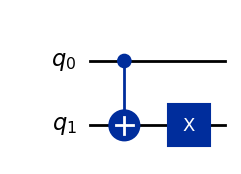

In [25]:
display(deutsch_function(3).draw(output="mpl"))

Next we will create the actual quantum circuit for Deutsch's algorithm, substituting the query gate with a quantum circuit implementation given as an argument. Shortly we'll plug in one of the four circuits defined by the function `deutsch_function` we defined earlier.
Barriers are included to show the visual separation between the query gate implementation and the rest of the circuit.



In [26]:
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in Deutsch's algorithm.
 
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
 
    qc.x(n)
    qc.h(range(n + 1))
 
    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()
 
    qc.h(range(n))
    qc.measure(range(n), range(n))
 
    return qc

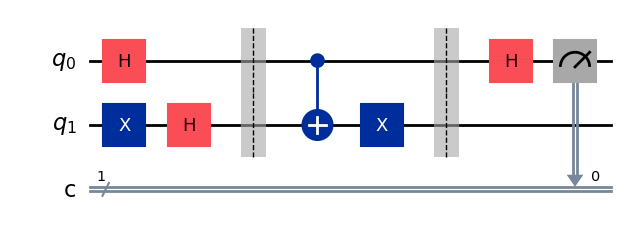

In [27]:
display(compile_circuit(deutsch_function(3)).draw(output="mpl"))

In [28]:
def deutsch_algorithm(function: QuantumCircuit):
    # Determine if a one-bit function is constant or balanced.
 
    qc = compile_circuit(function)
 
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

In [29]:
f = deutsch_function(3)
display(deutsch_algorithm(f))

'balanced'

Here, we see how we get the result of balance or constant in a single trail.

# Quantum teleportation

Quantum teleportation, or just teleportation for short, is a protocol where a sender (Alice) transmits a qubit to a receiver (Bob) by making use of a shared entangled quantum state (one e-bit, to be specific) along with two bits of classical communication.
The name *teleportation* is meant to be suggestive of the concept in science fiction where matter is transported from one location to another by a futuristic process, but it must be understood that matter is not teleported in quantum teleportation — what is actually teleported is quantum information.

The set-up for teleportation is as follows.

We assume that Alice and Bob share an e-bit: Alice holds a qubit $\mathsf{A},$ Bob holds a qubit $\mathsf{B},$ and together the pair $(\mathsf{A},\mathsf{B})$ is in the state $\vert\phi^+\rangle.$
It could be, for instance, that Alice and Bob were in the same location in the past, they prepared the qubits $\mathsf{A}$ and $\mathsf{B}$ in the state $\vert \phi^+ \rangle,$ and then each went their own way with their qubit in hand.
Or, it could be that a different process, such as one involving a third party or a complex distributed process, was used to establish this shared e-bit.
These details are not part of the teleportation protocol itself.

Alice then comes into possession of a third qubit $\mathsf{Q}$ that she wishes to transmit to Bob.
The state of the qubit $\mathsf{Q}$ is considered to be *unknown* to Alice and Bob, and no assumptions are made about it.
For example, the qubit $\mathsf{Q}$ might be entangled with one or more other systems that neither Alice nor Bob can access.
To say that Alice wishes to transmit the qubit $\mathsf{Q}$ to Bob means that Alice would like Bob to be holding a qubit that is in the same state that $\mathsf{Q}$ was in at the start of the protocol, having whatever correlations that $\mathsf{Q}$ had with other systems, as if Alice had physically handed $\mathsf{Q}$ to Bob.

We could imagine that Alice physically sends the qubit $\mathsf{Q}$ to Bob, and if it reaches Bob without being altered or disturbed in transit, then Alice and Bob's task will be accomplished.
In the context of teleportation, however, it is our assumption that this is not feasible; Alice cannot send qubits directly to Bob.
She may, however, send classical information to Bob.

These are reasonable assumptions in a variety of settings.
For example, if Alice doesn't know Bob's exact location, or the distance between them is large, physically sending a qubit using the technology of today, or the foreseeable future, would be challenging to say the least.
However, as we know from everyday experiences, classical information transmission under these circumstances is quite straightforward.

At this point, one might ask whether it is possible for Alice and Bob to accomplish their task without even needing to make use of a shared e-bit.
In other words, is there any way to transmit a qubit using classical communication alone?

The answer is no, it is not possible to transmit quantum information using classical communication alone.
This is not too difficult to prove mathematically using basic quantum information theory, but we can alternatively rule out the possibility of transmitting qubits using classical communication alone by thinking about the no-cloning theorem.

Imagine that there was a way to send quantum information using classical communication alone.
Classical information can easily be copied and broadcast, which means that any classical transmission from Alice to Bob might also be received by a second receiver (Charlie, let us say).
But if Charlie receives the same classical communication that Bob received, then would he not also be able to obtain a copy of the qubit $\mathsf{Q}?$
This would suggest that $\mathsf{Q}$ was cloned, which we already know is impossible by the no-cloning theorem, and so we conclude that there is no way to send quantum information using classical communication alone.

When the assumption that Alice and Bob share an e-bit is in place, however, it is possible for Alice and Bob to accomplish their task.
This is precisely what the quantum teleportation protocol does.

## Protocol

Here is a quantum circuit diagram that describes the teleportation protocol:

![Teleportation circuit](/learning/images/courses/basics-of-quantum-information/entanglement-in-action/teleportation.svg)

The diagram is slightly stylized in that it depicts the separation between Alice and Bob, with two diagonal wires representing classical bits that are sent from Alice to Bob, but otherwise it is an ordinary quantum circuit diagram.
The qubit names are shown above the wires rather than to the left so that the initial states can be shown as well (which we will commonly do when it is convenient).
It should also be noted that the $X$ and $Z$ gates have *classical* controls, which simply means that the gates are not applied or applied depending on whether these classical control bits are $0$ or $1,$ respectively.

In words, the teleportation protocol is as follows:

1.  Alice performs a controlled-NOT operation on the pair $(\mathsf{A},\mathsf{Q}),$ with $\mathsf{Q}$ being the control and $\mathsf{A}$ being the target, and then performs a Hadamard operation on $\mathsf{Q}.$

2.  Alice then measures both $\mathsf{A}$ and $\mathsf{Q},$ with respect to a standard basis measurement in both cases, and transmits the classical outcomes to Bob. Let us refer to the outcome of the measurement of $\mathsf{A}$ as $a$ and the outcome of the measurement of $\mathsf{Q}$ as $b.$

3.  Bob receives $a$ and $b$ from Alice, and depending on the values of these bits he performs these operations:

    *   If $a = 1,$ then Bob performs a bit flip (or $X$ gate) on his qubit $\mathsf{B}.$
    *   If $b = 1,$ then Bob performs a phase flip (or $Z$ gate) on his qubit $\mathsf{B}.$

    That is, conditioned on $ab$ being $00,$ $01,$ $10,$ or $11,$ Bob performs one of the operations $\mathbb{I},$ $Z,$ $X,$ or $ZX$ on the qubit $\mathsf{B}.$

This is the complete description of the teleportation protocol.
The analysis that appears below reveals that when it is run, the qubit $\mathsf{B}$ will be in whatever state $\mathsf{Q}$ was in prior to the protocol being executed, including whatever correlations it had with any other systems — which is to say that the protocol has effectively implemented a perfect qubit communication channel, where the state of $\mathsf{Q}$ has been "teleported" into $\mathsf{B}.$

Before proceeding to the analysis, notice that this protocol does not succeed in cloning the state of $\mathsf{Q},$ which we already know is impossible by the no-cloning theorem.
Rather, when the protocol is finished, the state of the qubit $\mathsf{Q}$ will have changed from its original value to $\vert b\rangle$ as a result of the measurement performed on it.
Also notice that the e-bit has effectively been "burned" in the process: the state of $\mathsf{A}$ has changed to $\vert a\rangle$ and is no longer entangled with $\mathsf{B}$ (or any other system).
This is the cost of teleportation.

## Analysis

To analyze the teleportation protocol, we'll examine the behavior of the circuit described above, one step at a time, beginning with the situation in which $\mathsf{Q}$ is initially in the state $\alpha\vert 0\rangle + \beta\vert 1\rangle.$
This is not the most general situation, as it does not capture the possibility that $\mathsf{Q}$ is entangled with other systems, but starting with this simpler case will add clarity to the analysis.
The more general case is addressed below, following the analysis of the simpler case.

Specifically, we will consider the states of the qubits $(\mathsf{B},\mathsf{A},\mathsf{Q})$ at the times suggested by this figure:

![Teleportation circuit time-steps](/learning/images/courses/basics-of-quantum-information/entanglement-in-action/teleportation-time-steps.svg)

Under the assumption that the qubit $\mathsf{Q}$ begins the protocol in the state $\alpha\vert 0\rangle + \beta\vert 1\rangle,$ the state of the three qubits $(\mathsf{B},\mathsf{A},\mathsf{Q})$ together at the start of the protocol is therefore

$$
\vert \pi_0 \rangle
= \vert \phi^+\rangle \otimes
\bigl(\alpha\vert 0\rangle + \beta\vert 1\rangle \bigr)
= \frac{\alpha \vert 000 \rangle + \alpha \vert 110\rangle + \beta \vert 001\rangle + \beta \vert 111\rangle}{\sqrt{2}}.
$$

The first gate that is performed is the controlled-NOT gate, which transforms the state $\vert\pi_0\rangle$ into

$$
\vert \pi_1 \rangle  = \frac{\alpha \vert 000 \rangle + \alpha \vert 110\rangle + \beta \vert 011\rangle + \beta \vert 101\rangle}{\sqrt{2}}.
$$

Then the Hadamard gate is applied, which transforms the state $\vert\pi_1\rangle$ into

$$
\begin{aligned}
\vert\pi_2\rangle
& =
\frac{\alpha \vert 00\rangle \vert + \rangle + \alpha \vert 11\rangle\vert +\rangle + \beta \vert 01\rangle\vert -\rangle + \beta \vert 10\rangle\vert -\rangle}{\sqrt{2}}\\[2mm]
& = \frac{\alpha \vert 000 \rangle
+ \alpha \vert 001 \rangle
+ \alpha \vert 110 \rangle
+ \alpha \vert 111 \rangle
+ \beta \vert 010 \rangle
- \beta \vert 011 \rangle
+ \beta \vert 100 \rangle
- \beta \vert 101 \rangle}{2}.
\end{aligned}
$$

Using the multilinearity of the tensor product, we may alternatively write this state as follows:

$$
\begin{aligned}
\vert\pi_2\rangle = \quad
& \frac{1}{2} \bigl(\alpha\vert 0 \rangle + \beta \vert 1\rangle \bigr)\vert 00\rangle \\[2mm]
+ & \frac{1}{2} \bigl(\alpha\vert 0 \rangle - \beta \vert 1\rangle \bigr)\vert 01\rangle \\[2mm]
+ & \frac{1}{2} \bigl(\alpha\vert 1 \rangle + \beta \vert 0\rangle \bigr)\vert 10\rangle \\[2mm]
+ & \frac{1}{2} \bigl(\alpha\vert 1 \rangle - \beta \vert 0\rangle \bigr)\vert 11\rangle.
\end{aligned}
$$

At first glance, it might look like something magical has happened, because the leftmost qubit $\mathsf{B}$ now seems to depend on the numbers $\alpha$ and $\beta,$ even though there has not yet been any communication from Alice to Bob.
This is an illusion.
Scalars float freely through tensor products, so $\alpha$ and $\beta$ are neither more nor less associated with the leftmost qubit than they are with the other qubits, and all we have done is to use algebra to express the state in a way that facilitates an analysis of the measurements.

Now let us consider the four possible outcomes of Alice's standard basis measurements, together with the actions that Bob performs as a result.

### Possible outcomes

*   The outcome of Alice's measurement is $ab = 00$ with probability

    $$
    \Biggl\| \frac{1}{2}\bigl(\alpha \vert 0\rangle + \beta\vert 1\rangle\bigr) \Biggr\|^2
    = \frac{\vert\alpha\vert^2 + \vert\beta\vert^2}{4} = \frac{1}{4},
    $$

    in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

    $$
    \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 00 \rangle.
    $$

    Bob does nothing in this case, and so this is the final state of these three qubits.

*   The outcome of Alice's measurement is $ab = 01$ with probability

    $$
    \Biggl\| \frac{1}{2}\bigl(\alpha \vert 0\rangle - \beta\vert 1\rangle\bigr) \Biggr\|^2
    = \frac{\vert\alpha\vert^2 + \vert{-\beta}\vert^2}{4} = \frac{1}{4},
    $$

    in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

    $$
    \bigl( \alpha \vert 0 \rangle - \beta \vert 1 \rangle \bigr) \vert 01 \rangle.
    $$

    In this case Bob applies a $Z$ gate to $\mathsf{B},$ leaving $(\mathsf{B},\mathsf{A},\mathsf{Q})$ in the state

    $$
    \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 01 \rangle.
    $$

*   The outcome of Alice's measurement is $ab = 10$ with probability

    $$
    \Biggl\| \frac{1}{2}\bigl(\alpha \vert 1\rangle + \beta\vert 0\rangle\bigr) \Biggr\|^2
    = \frac{\vert\alpha\vert^2 + \vert\beta\vert^2}{4} = \frac{1}{4},
    $$

    in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

    $$
    \bigl( \alpha \vert 1 \rangle + \beta \vert 0 \rangle \bigr) \vert 10 \rangle.
    $$

    In this case, Bob applies an $X$ gate to the qubit $\mathsf{B},$ leaving $(\mathsf{B},\mathsf{A},\mathsf{Q})$ in the state

    $$
    \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 10 \rangle.
    $$

*   The outcome of Alice's measurement is $ab = 11$ with probability

    $$
    \Biggl\| \frac{1}{2}\bigl(\alpha \vert 1\rangle - \beta\vert 0\rangle\bigr) \Biggr\|^2
    = \frac{\vert\alpha\vert^2 + \vert{-\beta}\vert^2}{4} = \frac{1}{4},
    $$

    in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

    $$
    \bigl( \alpha \vert 1 \rangle - \beta \vert 0 \rangle \bigr) \vert 11 \rangle.
    $$

    In this case, Bob performs the operation $ZX$ on the qubit $\mathsf{B},$ leaving $(\mathsf{B},\mathsf{A},\mathsf{Q})$ in the state

    $$
    \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 11 \rangle.
    $$

We now see, in all four cases, that Bob's qubit $\mathsf{B}$ is left in the state
$\alpha\vert 0\rangle + \beta\vert 1\rangle$ at the end of the protocol, which is the initial state of the qubit $\mathsf{Q}.$
This is what we wanted to show: the teleportation protocol has worked correctly.

We also see that the qubits $\mathsf{A}$ and $\mathsf{Q}$ are left in one of the four states $\vert 00\rangle,$ $\vert 01\rangle,$ $\vert 10\rangle,$ or $\vert 11\rangle,$ each with probability $1/4,$ depending upon the measurement outcomes that Alice obtained.
Thus, as was already suggested above, at the end of the protocol Alice no longer has the state $\alpha \vert 0\rangle + \beta \vert 1\rangle,$ which is consistent with the no-cloning theorem.

Notice that Alice's measurements yield absolutely no information about the state $\alpha \vert 0\rangle + \beta \vert 1\rangle.$
That is, the probability for each of the four possible measurement outcomes is $1/4,$ irrespective of $\alpha$ and $\beta.$
This is also essential for teleportation to work correctly.
Extracting information from an unknown quantum state necessarily disturbs it in general, but here Bob obtains the state without it being disturbed.

Now let's consider the more general situation in which the qubit $\mathsf{Q}$ is initially entangled with another system, which we'll name $\mathsf{R}.$
A similar analysis to the one above reveals that the teleportation protocol functions correctly in this more general case:
at the end of the protocol, the qubit $\mathsf{B}$ held by Bob is entangled with $\mathsf{R}$ in the same way that $\mathsf{Q}$ was at the start of the protocol, as if Alice had simply handed $\mathsf{Q}$ to Bob.

To prove this, let us suppose that the state of the pair $(\mathsf{Q},\mathsf{R})$ is initially given by a quantum state vector of the form

$$
\alpha \vert 0 \rangle_{\mathsf{Q}} \vert \gamma_0\rangle_{\mathsf{R}}
+ \beta \vert 1 \rangle_{\mathsf{Q}} \vert \gamma_1\rangle_{\mathsf{R}},
$$

where $\vert\gamma_0\rangle$ and $\vert\gamma_1\rangle$ are quantum state vectors for the system $\mathsf{R}$ and $\alpha$ and $\beta$ are complex numbers satisfying $\vert \alpha \vert^2 + \vert\beta\vert^2 = 1.$
Any quantum state vector of the pair $(\mathsf{Q},\mathsf{R})$ can be expressed in this way.

The following figure depicts the same circuit as before, with the addition of the system $\mathsf{R}$ (represented by a collection of qubits on the top of the diagram that nothing happens to).

![Teleportation with an entangled input](/learning/images/courses/basics-of-quantum-information/entanglement-in-action/teleportation-with-entanglement.svg)

To analyze what happens when the teleportation protocol is run, it is helpful to permute the systems, along the same lines that was described in the previous lesson.
Specifically, we'll consider the state of the systems in the order $(\mathsf{B},\mathsf{R},\mathsf{A},\mathsf{Q})$ rather than $(\mathsf{B},\mathsf{A},\mathsf{Q},\mathsf{R}).$
The names of the various systems are included as subscripts in the expressions that follow for clarity.

At the start of the protocol, the state of these systems is as follows:

$$
\begin{aligned}
\vert \pi_0\rangle
& = \vert \phi^+\rangle_{\mathsf{BA}} \otimes \bigl(
  \alpha \vert 0\rangle_{\mathsf{Q}} \vert\gamma_0\rangle_{\mathsf{R}}
+ \beta \vert 1\rangle_{\mathsf{Q}}\vert\gamma_1\rangle_{\mathsf{R}}\bigr)\\[1mm]
& = \frac{
  \alpha \vert 0\rangle_{\mathsf{B}} \vert \gamma_0 \rangle_{\mathsf{R}} \vert 00 \rangle_{\mathsf{AQ}}
+ \alpha \vert 1\rangle_{\mathsf{B}} \vert \gamma_0 \rangle_{\mathsf{R}} \vert 10 \rangle_{\mathsf{AQ}}
+ \beta \vert 0\rangle_{\mathsf{B}} \vert \gamma_1 \rangle_{\mathsf{R}} \vert 01 \rangle_{\mathsf{AQ}}
+ \beta \vert 1\rangle_{\mathsf{B}} \vert \gamma_1 \rangle_{\mathsf{R}} \vert 11 \rangle_{\mathsf{AQ}}}{\sqrt{2}}.
\end{aligned}
$$

First the controlled-NOT gate is applied, which transforms this state to

$$
\vert\pi_1\rangle =
\frac{
  \alpha \vert 0\rangle_{\mathsf{B}} \vert\gamma_0 \rangle_{\mathsf{R}} \vert 00\rangle_{\mathsf{AQ}}
+ \alpha \vert 1\rangle_{\mathsf{B}} \vert\gamma_0 \rangle_{\mathsf{R}} \vert 10\rangle_{\mathsf{AQ}}
+ \beta \vert 0\rangle_{\mathsf{B}} \vert\gamma_1 \rangle_{\mathsf{R}} \vert 11\rangle_{\mathsf{AQ}}
+ \beta \vert 1\rangle_{\mathsf{B}} \vert\gamma_1 \rangle_{\mathsf{R}} \vert 01\rangle_{\mathsf{AQ}}}{\sqrt{2}}.
$$

Then the Hadamard gate is applied.
After expanding and simplifying the resulting state, along similar lines to the analysis of the simpler case above, we obtain this expression of the resulting state:

$$
\begin{aligned}
\vert \pi_2 \rangle = \quad
  & \frac{1}{2} \bigl(
   \alpha \vert 0\rangle_{\mathsf{B}} \vert\gamma_0\rangle_{\mathsf{R}}
  + \beta \vert 1\rangle_{\mathsf{B}} \vert\gamma_1\rangle_{\mathsf{R}}
  \bigr) \vert 00\rangle_{\mathsf{AQ}}\\[2mm]
  + & \frac{1}{2} \bigl(
   \alpha \vert 0\rangle_{\mathsf{B}} \vert\gamma_0\rangle_{\mathsf{R}}
  - \beta \vert 1\rangle_{\mathsf{B}} \vert\gamma_1\rangle_{\mathsf{R}}
  \bigr) \vert 01\rangle_{\mathsf{AQ}}\\[2mm]
  + & \frac{1}{2} \bigl(
   \alpha \vert 1\rangle_{\mathsf{B}} \vert\gamma_0\rangle_{\mathsf{R}}
  + \beta \vert 0\rangle_{\mathsf{B}} \vert\gamma_1\rangle_{\mathsf{R}}
  \bigr) \vert 10\rangle_{\mathsf{AQ}}\\[2mm]
  + & \frac{1}{2} \bigl(
   \alpha \vert 1\rangle_{\mathsf{B}} \vert\gamma_0\rangle_{\mathsf{R}}
  - \beta \vert 0\rangle_{\mathsf{B}} \vert\gamma_1\rangle_{\mathsf{R}}
  \bigr) \vert 11\rangle_{\mathsf{AQ}}.
\end{aligned}
$$

Proceeding exactly as before, where we consider the four different possible outcomes of Alice's measurements along with the corresponding actions performed by Bob, we find that at the end of the protocol, the state of $(\mathsf{B},\mathsf{R})$ is always

$$
\alpha \vert 0 \rangle \vert \gamma_0\rangle + \beta \vert 1 \rangle \vert \gamma_1\rangle.
$$

Informally speaking, the analysis does not change in a significant way as compared with the simpler case above;
$\vert\gamma_0\rangle$ and $\vert\gamma_1\rangle$ essentially just "come along for the ride."
So, teleportation succeeds in creating a perfect quantum communication channel, effectively transmitting the contents of the qubit $\mathsf{Q}$ into $\mathsf{B}$ and preserving all correlations with other systems.

This is actually not surprising at all, given the analysis of the simpler case above.
As that analysis revealed, we have a physical process that acts like the identity operation on a qubit in an arbitrary quantum state, and there's only one way that can happen: the operation implemented by the protocol must *be* the identity operation.
That is, once we know that teleportation works correctly for a single qubit in isolation, we can conclude that the protocol effectively implements a perfect, noiseless quantum channel, and so it must work correctly even if the input qubit is entangled with another system.

## Further discussion

Here are a few brief, concluding remarks on teleportation.

First, teleportation is not an *application* of quantum information, it's a *protocol* for performing quantum communication.
It is therefore useful only insofar as quantum communication is useful.

Indeed, it is reasonable to speculate that teleportation could one day become a standard way to communicate quantum information, perhaps through a process known as *entanglement distillation*.
This is a process that converts a larger number of noisy (or imperfect) e-bits into a smaller number of high quality e-bits, that could then be used for noiseless or near-noiseless teleportation.
The idea is that the process of entanglement distillation is not as delicate as direct quantum communication.
We could accept losses, for instance, and if the process doesn't work out, we can just try again.
In contrast, the actual qubits we hope to communicate might be much more precious.

Finally, it should be understood that the idea behind teleportation and the way that it works is quite fundamental in quantum information and computation.
It really is a cornerstone of quantum information theory, and variations of it arise.
For example, quantum gates can be implemented through a closely related process known as *quantum gate teleportation*, which uses teleportation to apply *operations* to qubits rather than communicating them.



# Superdense coding

Superdense coding is a protocol that, in some sense, achieves a complementary aim to teleportation.
Rather than allowing for the transmission of one qubit using two classical bits of communication (at the cost of one e-bit of entanglement), it allows for the transmission of two classical bits using one qubit of quantum communication (again, at the cost of one e-bit of entanglement).

In greater detail, we have a sender (Alice) and a receiver (Bob) that share one e-bit of entanglement.
According to the conventions in place for the lesson, this means that Alice holds a qubit $\mathsf{A},$ Bob holds a qubit $\mathsf{B},$ and together the pair $(\mathsf{A},\mathsf{B})$ is in the state $\vert\phi^+\rangle.$
Alice wishes to transmit two classical bits to Bob, which we'll denote by $c$ and $d,$ and she will accomplish this by sending him one qubit.

It is reasonable to view this feat as being less interesting than the one that teleportation accomplishes.
Sending qubits is likely to be so much more difficult than sending classical bits for the foreseeable future that trading one qubit of quantum communication for two bits of classical communication, at the cost of an e-bit no less, hardly seems worth it.
However, this does not imply that superdense coding is not interesting, for it most certainly is.

Fitting the theme of the lesson, one reason why superdense coding is interesting is that it demonstrates a concrete and (in the context of information theory) rather striking use of entanglement.
A famous theorem in quantum information theory, known as *Holevo's theorem*, implies that without the use of a shared entangled state, it is impossible to communicate more than one bit of classical information by sending a single qubit.
(Holevo's theorem is more general than this.
Its precise statement is technical and requires explanation, but this is one consequence of it.)
So, through superdense coding, shared entanglement effectively allows for the *doubling* of the classical information-carrying capacity of sending qubits.

## Protocol

The following quantum circuit diagram describes the superdense coding protocol:

![Superdense coding circuit](/learning/images/courses/basics-of-quantum-information/entanglement-in-action/superdense-coding.svg)

In words, here is what Alice does:

1.  If $d=1,$ Alice performs a $Z$ gate on her qubit $\mathsf{A}$ (and if $d=0$ she does not).

2.  If $c=1,$ Alice performs an $X$ gate on her qubit $\mathsf{A}$ (and if $c=0$ she does not).

Alice then sends her qubit $\mathsf{A}$ to Bob.

What Bob does when he receives the qubit $\mathsf{A}$ is to first perform a controlled-NOT gate, with $\mathsf{A}$ being the control and $\mathsf{B}$ being the target, and then he applies a Hadamard gate to $\mathsf{A}.$
He then measures $\mathsf{B}$ to obtain $c$ and $\mathsf{A}$ to obtain $d,$ with standard basis measurements in both cases.

## Analysis

The idea behind this protocol is pretty simple:
Alice effectively chooses which Bell state she would like to be sharing with Bob,
she sends Bob her qubit, and Bob measures to determine which Bell state Alice chose.

That is, they initially share $\vert\phi^+\rangle,$ and depending upon the bits $c$ and $d,$ Alice either leaves this state alone or shifts it to one of the other Bell states by applying $\mathbb{I},$ $X,$ $Z,$ or $XZ$ to her qubit
$\mathsf{A}.$

$$
\begin{aligned}
(\mathbb{I} \otimes \mathbb{I}) \vert \phi^+ \rangle & = \vert \phi^+\rangle \\
(\mathbb{I} \otimes Z) \vert \phi^+ \rangle & = \vert \phi^-\rangle \\
(\mathbb{I} \otimes X) \vert \phi^+ \rangle & = \vert \psi^+\rangle \\
(\mathbb{I} \otimes XZ) \vert \phi^+ \rangle & = \vert \psi^-\rangle
\end{aligned}
$$

Bob's actions have the following effects on the four Bell states:

$$
\begin{aligned}
\vert \phi^+\rangle & \mapsto \vert 00\rangle\\
\vert \phi^-\rangle & \mapsto \vert 01\rangle\\
\vert \psi^+\rangle & \mapsto \vert 10\rangle\\
\vert \psi^-\rangle & \mapsto -\vert 11\rangle\\
\end{aligned}
$$

This can be checked directly, by computing the results of Bob's operations on these states one at a time.

So, when Bob performs his measurements, he is able to determine which Bell state Alice chose.
To verify that the protocol works correctly is a matter of checking each case:

*   If $cd = 00,$ then the state of $(\mathsf{B},\mathsf{A})$ when Bob receives $\mathsf{A}$ is $\vert \phi^+\rangle.$ He transforms this state into $\vert 00\rangle$ and obtains $cd = 00.$

*   If $cd = 01,$ then the state of $(\mathsf{B},\mathsf{A})$ when Bob receives $\mathsf{A}$ is $\vert \phi^-\rangle.$ He transforms this state into $\vert 01\rangle$ and obtains $cd = 01.$

*   If $cd = 10,$ then the state of $(\mathsf{B},\mathsf{A})$ when Bob receives $\mathsf{A}$ is $\vert \psi^+\rangle.$ He transforms this state into $\vert 10\rangle$ and obtains $cd = 10.$

*   If $cd = 11,$ then the state of $(\mathsf{B},\mathsf{A})$ when Bob receives $\mathsf{A}$ is $\vert \psi^-\rangle.$ He transforms this state into $-\vert 11\rangle$ and obtains $cd = 11.$ (The negative-one phase factor has no effect here.)



In a short conclusion to the above two algroithms, teleprotation allows alice to tell bob what the state of her qubit is by sharing the classic information, making bob able to "get" the qubit parameters without physicslly revieveing a qubit. Superdense coding is a bit different, Alice have her info in mind, like 00, 01 or something similar. She operates on her qubit A with a given gates, and then send the qubit to bob. With the qubit, bob use it as a control, to operate on his qubit B, recieveing the final measurement with what Alice want to tell him, In this case, a single state was transported to bob with info of 2 classic bits, that's why its called superdense.

### Reflection: Resource Trade-off

Both protocols consume 1 e-bit of entanglement but trade different resources:

| Protocol | Uses | Achieves |
|----------|------|----------|
| Teleportation | 2 classical bits | Transfer 1 qubit state |
| Superdense Coding | 1 qubit transmission | Transfer 2 classical bits |

Neither enables faster-than-light communication - teleportation needs classical bits sent normally, and superdense coding needs the qubit physically transported. The entanglement acts as a pre-shared resource that enhances channel capacity.

# 2025/11/01

# The Deutsch-Jozsa algorithm

For this Qiskit in Classrooms module, students must have a working Python environment with the following packages installed:

*   `qiskit` v2.1.0 or newer
*   `qiskit-ibm-runtime` v0.40.1 or newer
*   `qiskit-aer` v0.17.0 or newer
*   `qiskit.visualization`
*   `numpy`
*   `pylatexenc`

To set up and install the packages above, see the [Install Qiskit](/docs/guides/install-qiskit) guide.
In order to run jobs on real quantum computers, students will need to set up an account with IBM Quantum® by following the steps in the [Set up your IBM Cloud account](/docs/guides/cloud-setup) guide.

This module was tested and used four seconds of QPU time. This is an estimate only. Your actual usage may vary.



## Intro

In the early 1980's, quantum physicists and computer scientists had a vague notion that quantum mechanics could be harnessed to make computations that were far more powerful than classical computers can make. Their reasoning was this: it's difficult for a classical computer to simulate quantum systems, but a *quantum* computer should be able to do it more efficiently. And if a quantum computer could simulate quantum systems more efficiently, perhaps there were other tasks that it could perform more efficiently than a classical computer.

The logic was sound, but the details remained to be worked out. This began in 1985, when David Deutsch described the first "universal quantum computer." In this same paper, he provided the first example problem for which a quantum computer could solve something more efficiently than a classical computer could. This first toy example is now known as "Deutsch's algorithm." The improvement in Deutsch's algorithm was modest, but Deutsch worked with Richard Jozsa a few years later to further widen the gap between classical and quantum computers.

These algorithms — Deutsch's, and the Deutsch-Jozsa extension — are not particularly useful, but they are still really important for a few reasons:

1.  Historically, they were some of the first quantum algorithms that were demonstrated to beat their classical counterparts. Understanding them can help us understand how the community's thinking on quantum computing has evolved over time.
2.  They can help us understand some aspects of the answer to a surprisingly subtle question: What gives quantum computing its power? Sometimes, quantum computers are compared to giant, exponentially-scaling parallel processors. But this isn't quite right. While a piece of the answer to this question lies in so-called "quantum parallelism," extracting as much information as possible in a single run is a subtle art. The Deutsch and Deutsch-Jozsa algorithms show how this can be done.

In this module, we'll learn about Deutsch's algorithm, the Deutsch-Jozsa algorithm, and what they teach us about the power of quantum computing.



## Quantum parallelism and its limits

Part of the power of quantum computing is derived from "quantum parallelism." which is essentially the ability to perform operations on multiple inputs at the same time, since the qubit input states could be in a superposition of multiple classically allowed states. HOWEVER, while a quantum circuit might be able to evaluate multiple input states at once, extracting all of that information in one go is impossible.

To see what I mean here, let's say we have a bit, $x$ and some function applied to that bit, $f(x)$. There are four possible binary functions taking a single bit to another single bit:

| $x$ | $f_1(x)$ | $f_2(x)$ | $f_3(x)$ | $f_4(x)$ |
| --- | -------- | -------- | -------- | -------- |
| 0   | 0        | 0        | 1        | 1        |
| 1   | 0        | 1        | 0        | 1        |

We'd like to find out which of these functions (1-4) our $f(x)$ is. Classically, we would need to run the function twice — once for $x=0$, once for $x=1$. But let's see if we can do better with a quantum circuit. We can learn about the function with the following gate:

![quantum\_parallelism](/learning/images/modules/computer-science/deutsch-jozsa/quantum-parallelism.avif)

Here, the $U_f$ gate computes $f(x)$, where $x$ is the state of qubit 0, and applies that to qubit 1. So, the resulting state, $|x\rangle|y\oplus f(x)\rangle$, simply becomes $|x\rangle|f(x)\rangle$ when $|y\rangle = |0\rangle$. This contains all the information we need to know the function $f(x)$: qubit 0 tells us what $x$ is, and qubit 1 tells us what $f(x)$ is. So, if we initialize $|x\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$, then the final state of both qubits will be: $|y\rangle|x\rangle = \frac{1}{\sqrt{2}}(|f(0)\rangle|0\rangle+|f(1)\rangle|1\rangle)$. But how do we access that information?

### 2.1. Try it on Qiskit:

Using Qiskit we'll randomly select one of the four possible functions above and run the circuit. Then your task is to use the measurements of the quantum circuit to learn the function in as few runs as possible.

In this first experiment and throughout the module, we will use a framework for quantum computing known as "Qiskit patterns", which breaks workflows into the following steps:

*   Step 1: Map classical inputs to a quantum problem
*   Step 2: Optimize problem for quantum execution
*   Step 3: Execute using Qiskit Runtime Primitives
*   Step 4: Post-processing and classical analysis

Let's start by loading some necessary packages, including the Qiskit Runtime primitives. We will also select the least busy quantum computer available to us.

There is code below for saving your credentials upon first use. Be sure to delete this information from the notebook after saving it to your environment, so that your credentials are not accidentally shared when you share the notebook. See [Set up your IBM Cloud account](/docs/guides/initialize-account) and [Initialize the service in an untrusted environment](/docs/guides/cloud-setup-untrusted) for more guidance.



In [31]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Load the Runtime primitive and session
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR_API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
service = QiskitRuntimeService()

# Use the least busy backend, or uncomment the loading of a specific backend like "ibm_brisbane".
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)
backend = service.backend("ibm_brisbane")
print(backend.name)


sampler = Sampler(mode=backend)

management.get:WARNING:2025-11-01 12:09:09,581: Loading default saved account


ibm_brisbane


The cell below will allow you to switch between using the simulator or real hardware throughout the notebook. We recommend running it now:



In [32]:
# Load the backend sampler
from qiskit.primitives import BackendSamplerV2

# Load the Aer simulator and generate a noise model based on the currently-selected backend.
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# Alternatively, load a fake backend with generic properties and define a simulator.


noise_model = NoiseModel.from_backend(backend)

# Define a simulator using Aer, and use it in Sampler.
backend_sim = AerSimulator(noise_model=noise_model)
sampler_sim = BackendSamplerV2(backend=backend_sim)

# You could also define a simulator-based sampler using a generic backend:
# backend_gen = GenericBackendV2(num_qubits=18)
# sampler_gen = BackendSamplerV2(backend=backend_gen)

Now that we've loaded the necessary packages, we can proceed with the Qiskit patterns workflow. In the mapping step below, we first make function that selects among the four possible functions taking a single bit to another single bit.



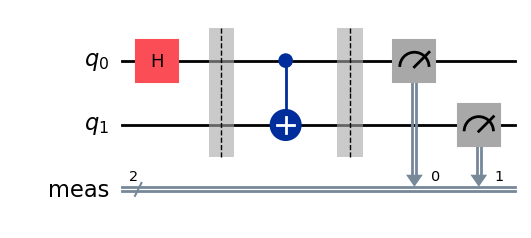

In [33]:
# Step 1: Map

from qiskit import QuantumCircuit

qc = QuantumCircuit(2)


def twobit_function(case: int):
    """
    Generate a valid two-bit function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f


# first, convert oracle circuit (above) to a single gate for drawing purposes. otherwise, the circuit is too large to display
# blackbox = twobit_function(2).to_gate()  # you may edit the number inside "twobit_function()" to select among the four valid functions
# blackbox.label = "$U_f$"

qc.h(0)
qc.barrier()
qc.compose(twobit_function(2), inplace=True)
qc.measure_all()


qc.draw("mpl")

In the above circuit, the Hadamard gate "H" takes qubit 0, which is initially in the state $|0\rangle$, to the superposition state $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$. Then, $U_f$ evaluates the function $f(x)$ and applies that to qubit 1.

Next we need to optimize and transpile the circuit to be run on the quantum computer:



In [34]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc)

Finally, we execute our transpiled circuit on the quantum computer and visualize our results:



In [35]:
# Step 3: Run the job on a real quantum computer

job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.meas.get_counts()

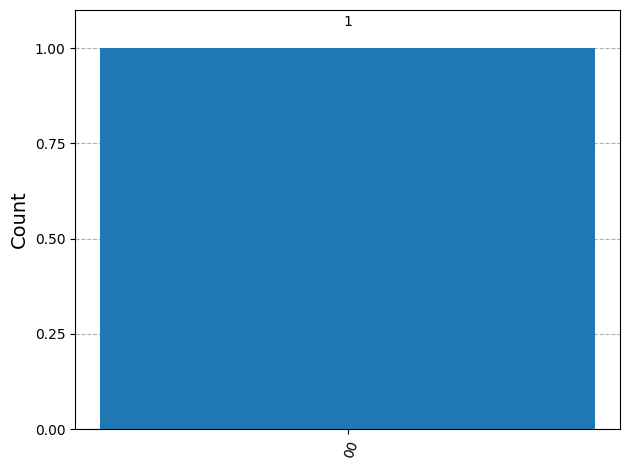

In [36]:
# Step 4: Visualize and analyze results

## Analysis
from qiskit.visualization import plot_histogram

plot_histogram(counts)

The above is a histogram of our results. Depending on the number of shots you chose to run the circuit in step 3 above, you could see one or two bars, representing the measured states of the two qubits in each shot. As always with Qiskit and in this notebook, we use "little endian" notation, meaning the states of qubits 0 through n are written in ascending order from right to left, so qubit 0 is always farthest right.

So, because qubit 0 was in a superposition state, the circuit evaluated the function for *both* $x=0$ and $x=1$ *at the same time* — something classical computers cannot do! But the catch comes when we want to learn about the function $f(x)$ — when we measure the qubits, we collapse their state. If you select "shots = 1" to only run the circuit once, you will only see one bar in the histogram above, and your information about the function will be incomplete.

#### Check your understanding

Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    How many times must we run the above algorithm to learn the function $f(x)$? Is this any better than the classical case? Would you rather have a classical or quantum computer to solve this problem?
  </summary>

  **Answer:**

  Since the measurement will collapse the superposition and return only one value, we need to run the circuit *at least* twice to return both outputs of the function $f(0)$ and $f(1)$. Best case, this performs as well as the classical case, where we compute both $f(0)$ and $f(1)$ in the first two queries. But there's a chance that we'll need to run it more than two times, since the final measurement is probabilistic and might return the same $f(x)$ value the first two times. I would rather have a classical computer in this case.
</details>

So, while quantum parallelism can be powerful when used in the right way, it is not correct to say that a quantum computer works just like a massive, classical parallel processor. The act of measurement collapses the quantum states, so we can only ever access a single output of the computation.



## Deutsch's algorithm

While quantum parallelism alone doesn't give us an advantage over classical computers, we can pair this with another quantum phenomena, interference, to achieve a speed-up. The algorithm now known as "Deutsch's algorithm" is the first example of an algorithm that accomplishes this.

### The problem

Here was the problem:

Given an input bit, $x = \{0,1\}$, and an input function $f(x) = \{0,1\}$, determine whether the function is *balanced* or *constant*. That is, if it's balanced, then the output of the function is 0 half the time and 1 the other half the time. If it's constant, then the output of the function is either always 0 or always 1. Recall the table of four possible functions taking a single bit to another a single bit:

| $x$ | $f_1(x)$ | $f_2(x)$ | $f_3(x)$ | $f_4(x)$ |
| --- | -------- | -------- | -------- | -------- |
| 0   | 0        | 0        | 1        | 1        |
| 1   | 0        | 1        | 0        | 1        |

The first and the last functions, $f_1(x)$ and $f_4(x)$, are constant, while the middle two functions, $f_2(x)$ and $f_3(x)$, are balanced.



### The algorithm

The way Deutsch approached this problem was through the "query model." In the query model, the input function ($f_i(x)$ above) is contained in a "black box" — we don't have direct access to its contents, but we can query the black box and it will give us the output of the function. We sometimes say that an "oracle" provides this information. See [Lesson 1: Quantum Query Algorithms](/learning/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/introduction) of the Fundamentals of Quantum Algorithms course for more on the query model.

To determine whether a quantum algorithm is more efficient than a classical algorithm in the query model, we can simply compare the number of queries we need to make of the black box in each case. In the classical case, in order to know if the function contained in the black box were balanced or constant, we would need to query the box two times to get both $f(0)$ and $f(1)$.

In Deutsch's quantum algorithm, though, he found a way to get the information with only one query! He made one adjustment to the "quantum parallelism" circuit above, so that he prepared a superposition state on *both* qubits, instead of only on qubit 0. Then the two outputs of the function, $f(0)$ and $f(1)$ interfered to return 0 if they were either both 0 or both 1 (the function was constant), and returned 1 if they were different (the function was balanced). In this way, Deutsch could differentiate between a constant and a balanced function with a single query.

Here's a circuit diagram of Deutsch's algorithm:

To understand how this algorithm works, let's look at the quantum states of the qubits at the three points noted on the diagram above. Try to work out the states for yourself before clicking to view the answers:

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    What is the state $|\pi_1\rangle$?
  </summary>

  **Answer:**

  Applying a Hadamard transforms the state $|0\rangle$ to $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ and the state $|1\rangle$ to  $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$. So, the full state becomes: $|\pi_1\rangle = [\frac{|0\rangle-|1\rangle}{\sqrt{2}}][\frac{|0\rangle+|1\rangle}{\sqrt{2}}]$
</details>

<details>
  <summary>
    What is the state $|\pi_2\rangle$?
  </summary>

  **Answer:**

  Before we apply $U_f$, remember what it does. It will change the state of qubit 1 based on the state of qubit 0. So, it makes sense to factor the state of qubit 0 out: $|\pi_1\rangle = \frac{1}{2} (|0\rangle-|1\rangle)|0\rangle+\frac{1}{2}(|0\rangle-|1\rangle)|1\rangle$. Then, if $f(0)=f(1)$, the two terms will transform in the same way and the relative sign between the two terms remains positive, but if $f(0)\neq f(1)$, then that means the second term will pick up a minus sign relative to the first term, changing the state of qubit 0 from $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ to $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$. So:

  $$
  |\pi_2\rangle = \begin{cases}
  \pm[\frac{|0\rangle-|1\rangle}{\sqrt{2}}][\frac{|0\rangle+|1\rangle}{\sqrt{2}}] & \text{if} & f(0) = f(1) \\
  \pm[\frac{|0\rangle-|1\rangle}{\sqrt{2}}][\frac{|0\rangle-|1\rangle}{\sqrt{2}}] &\text{if} & f(0) \neq f(1) \\
  \end{cases}
  $$
</details>

<details>
  <summary>
    What is the state $|\pi_3\rangle$?
  </summary>

  **Answer:**

  Now, the state of qubit 0 is either $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ or $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$, depending on the function. Applying the Hadamard will yield either $|0\rangle$ or $|1\rangle$, respectively.

  $$
  |\pi_3\rangle = \begin{cases}
  \pm[\frac{|0\rangle-|1\rangle}{\sqrt{2}}]|0\rangle & \text{if} & f(0) = f(1) \\
  \pm[\frac{|0\rangle-|1\rangle}{\sqrt{2}}]|1\rangle &\text{if} & f(0) \neq f(1) \\
  \end{cases}
  $$
</details>

Looking through your answers for the above questions, note that something a bit surprising happens. Although $U_f$ does nothing explicitly to the state of qubit 0, because it changes qubit 1 based on the state of qubit 0, it can happen that this causes a phase shift in qubit 0. This is known as the "phase-kickback" phenomenon, and is discussed in more detail in [Lesson 1: Quantum Query Algorithms](/learning/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/introduction) of the Fundamentals of Quantum Algorithms course.

Now that we understand how this algorithm works, let's implement it with Qiskit.



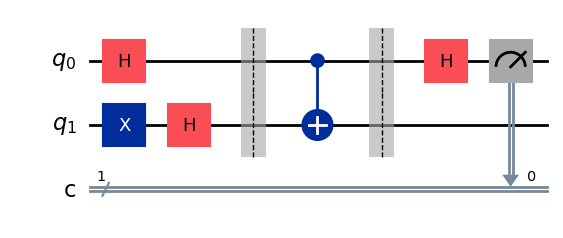

In [37]:
## Deutsch's algorithm:

## Step 1: Map the problem

# first, convert oracle circuit (above) to a single gate for drawing purposes. otherwise, the circuit is too large to display
blackbox = twobit_function(
    3
).to_gate()  # you may edit the number (1-4) inside "twobit_function()" to select among the four valid functions
blackbox.label = "$U_f$"


qc_deutsch = QuantumCircuit(2, 1)

qc_deutsch.x(1)
qc_deutsch.h(range(2))

qc_deutsch.barrier()
qc_deutsch.compose(twobit_function(2), inplace=True)
qc_deutsch.barrier()

qc_deutsch.h(0)
qc_deutsch.measure(0, 0)

qc_deutsch.draw("mpl")

In [38]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc_deutsch)

In [39]:
# Step 3: Run the job on a real quantum computer

job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.c.get_counts()

In [40]:
# Step 4: Visualize and analyze results

## Analysis
print(counts)
if "1" in counts:
    print("balanced")
else:
    print("constant")

{'1': 1}
balanced


## The Deutsch-Jozsa algorithm

Deutsch's algorithm was an important first step in demonstrating how a quantum computer might be more efficient than a classical computer, but it was only a modest improvement: it required just one query, compared to two in the classical case. In 1992, Deutsch and his colleague, Richard Jozsa, extended the original two-qubit algorithm to more qubits. The problem remained the same: determine whether a function is *balanced* or *constant*. But this time, the function goes from $n$ bits to a single bit. Either the function returns 0 and 1 an equal number of times (it's *balanced*) or the function returns always 1 or always 0 (it's *constant*).

This algorithm works in the same way as Deutsch's algorithm: the phase-kickback allows one to read out the state of qubit 0 to determine whether the function is constant or balanced. It's a bit trickier to see than for the two-qubit Deutsch's algorithm case, since the states will include sums over the $n$ qubits, and so working out those states will be left as an optional exercise for you at the end of the module. The algorithm will return a bitstring of all 0's if the function is constant, and a bitstring containing at least one 1 if the function is balanced.

To see how the algorithm works in Qiskit, first, we need to generate our oracle: the random function that is guaranteed to be either constant or balanced. The code below will generate a balanced function 50% of the time, and a constant function 50% of the time. Don't worry if you don't entirely follow the code — it's complicated and not necessary for our understanding of the quantum algorithm.



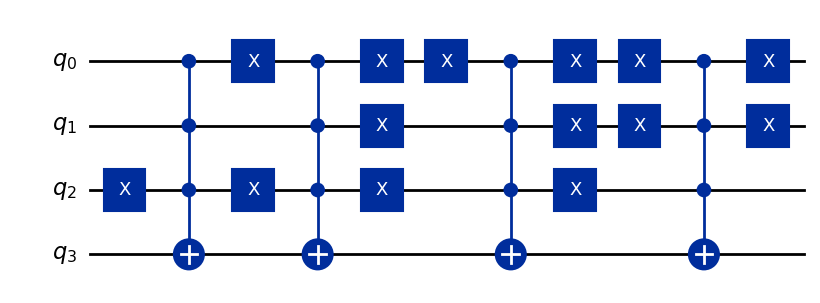

In [42]:
from qiskit import QuantumCircuit
import numpy as np
 
 
def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """
 
    qc_dj = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2):
        # Flip output qubits with 50% chance
        qc_dj.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance.
        return qc_dj
 
    # If the "if" statement above was "TRUE" then we've returned the constant
    # function and the function is complete. If not, we proceed in creating our
    # balanced function. Everything below is to produce the balanced function:
 
    # select half of all possible states at random:
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )
 
    def add_cx(qc_dj, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc_dj.x(qubit)
        return qc_dj
 
    for state in on_states:
        # qc_dj.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc_dj = add_cx(qc_dj, f"{state:0b}")
        qc_dj.mcx(list(range(num_qubits)), num_qubits)
        qc_dj = add_cx(qc_dj, f"{state:0b}")
 
    # qc_dj.barrier()
 
    return qc_dj
 
 
n = 3  # number of input qubits
 
oracle = dj_function(n)
 
display(oracle.draw("mpl"))

This is the oracle function, which is either balanced or constant. Can you see by looking at it whether the output on the last qubit depends on the values put in for the first $n$ qubits? If the output for the last qubit depends on the first $n$ qubits, can you tell if that dependent output is balanced or not?

We can tell whether the function is balanced or constant by looking at the above circuit, but remember, for the sake of this problem, we think of this function as a "black box." We can't peek into the box to look at the circuit diagram. Instead, we need to query the box.

To query the box, we use the Deutsch-Jozsa algorithm and determine whether the function is constant or balanced:



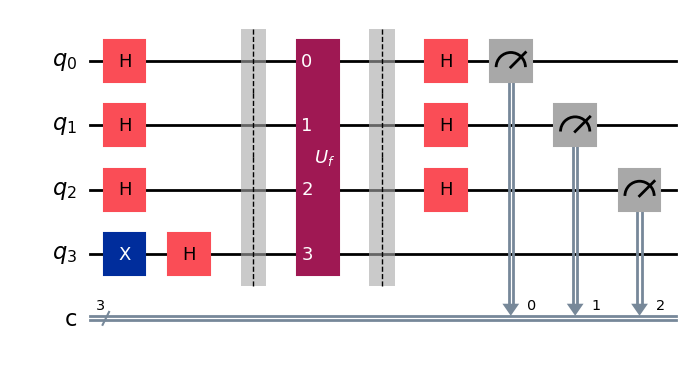

In [43]:
blackbox = oracle.to_gate()
blackbox.label = "$U_f$"


qc_dj = QuantumCircuit(n + 1, n)
qc_dj.x(n)
qc_dj.h(range(n + 1))
qc_dj.barrier()
qc_dj.compose(blackbox, inplace=True)
qc_dj.barrier()
qc_dj.h(range(n))
qc_dj.measure(range(n), range(n))

qc_dj.decompose().decompose()


qc_dj.draw("mpl")

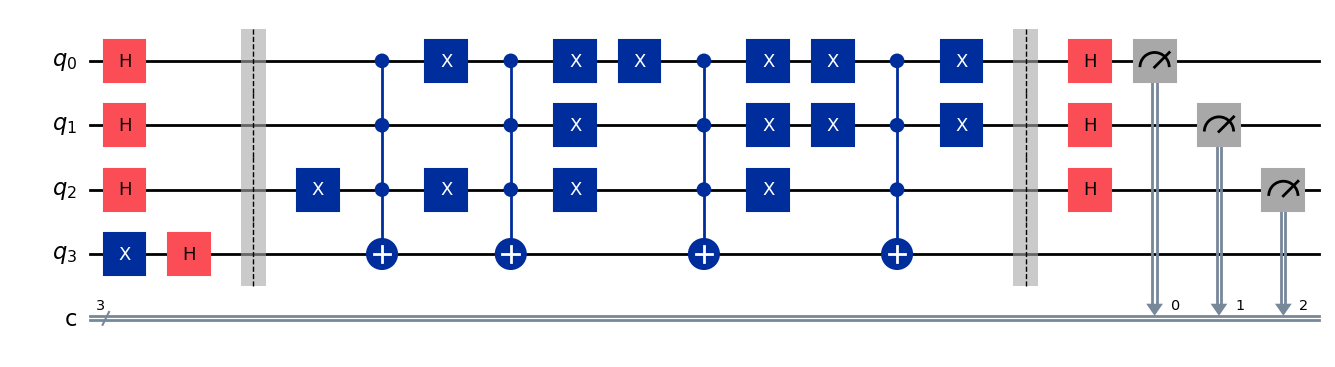

In [44]:
# Step 1: Map the problem

qc_dj = QuantumCircuit(n + 1, n)
qc_dj.x(n)
qc_dj.h(range(n + 1))
qc_dj.barrier()
qc_dj.compose(oracle, inplace=True)
qc_dj.barrier()
qc_dj.h(range(n))
qc_dj.measure(range(n), range(n))

qc_dj.decompose().decompose()


qc_dj.draw("mpl")

In [45]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc_dj)

In [46]:
# Step 3: Run the job on a real quantum computer

job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.c.get_counts()

In [47]:
# Step 4: Visualize and analyze results

## Analysis
print(counts)

if (
    "0" * n in counts
):  # The D-J algorithm returns all zeroes if the function was constant
    print("constant")
else:
    print("balanced")  # anything other than all zeroes means the function is balanced.

{'001': 1}
balanced


Above, the first line of the output is the bitstring of measurement outcomes. The second line outputs whether the bitstring implies that the function was balanced or constant. If the bitstring contained all zeroes, then it was constant; if not, it was balanced. So, with just a single run of the above quantum circuit, we can determine whether the function is constant or balanced!

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    How many queries would it take a classical computer to determine with 100% certainty whether a function were constant or balanced? Remember, classically, a single query only allows you to apply the function to a single bitstring.
  </summary>

  **Answer:**

  There are $2^n$ possible bitstrings to check, and in the worst case, you would need to test $2^n/2+1$ of these. For example, if the function were constant, and you kept measuring "1" as the output of the function, then you couldn't be certain that it was truly constant until you checked over half of the results. Before then, you might have just been very unlucky to keep measuring "1" on a balanced function. It's like flipping a coin over and over and it landing heads every time. It's unlikely, but not impossible.
</details>

<details>
  <summary>
    How would your above answer change if you just had to just measure until one outcome (balanced or constant) is more likely than the other? How many queries would it take in this case?
  </summary>

  **Answer:**

  In this case, you could just measure twice. If the two measurements are different, you know the function is balanced. If the two measurements are the same, then it could be balanced, or it could be constant. The probability that it's balanced with this set of measurements is: $\frac{1}{2}\frac{2^n /2 - 1}{2^n-1}$. This is less than 1/2, so it's more likely that the function is constant in this case.
</details>

So, the Deutsch-Jozsa algorithm demonstrated an exponential speed-up over a *deterministic* classical algorithm (one that returns the answer with 100% certainty), but no significant speed-up over a *probabilistic* one (one that returns a result that is *likely* to be the correct answer).



### The Bernstein - Vazirani problem

In 1997, Ethan Bernstein and Umesh Vazirani used the Deutsch-Jozsa algorithm to solve a more specific, restricted problem compared to the Deutsch-Jozsa problem. Rather than simply try to distinguish between two different classes of functions, as in the D-J case, Bernstein and Vazirani used the Deutsch-Jozsa algorithm to actually learn a string encoded in a function. Here's the problem:

The function $f:\{0,1\}^n \rightarrow \{0,1\}$ still takes an $n$-bit string and outputs a single bit. But now, instead of promising that the function is balanced or constant, we're now promised that the function is the dot product between the input string $x$ and some secret $n$-bit string $s$, modulo 2. (This dot product modulo 2 is called the "binary dot product.") The problem is to figure out what the secret, $n$-bit string is.

Written another way, we're given a black-box function $f: {0,1}^n \rightarrow {0,1}$ that satisfies $f(x) = s \cdot x$ for some string $s$, and we want to learn the string $s$.

Let's take a look at how the D-J algorithm solves this problem:

1.  First, a Hadamard gate is applied to the $n$ input qubits, and a NOT gate plus a Hadamard is applied to the output qubit, making the state:

$$
|\Psi\rangle = |-\rangle_{n} \otimes |+\rangle_{n-1} \otimes |+\rangle_{n-2} \otimes ... \otimes |+\rangle_0
$$

The state of qubits 1 through $n$ can be written more simply as a sum over all $2^n$ the $n$-qubit basis states $|00...00\rangle, |00...01\rangle, |000...11\rangle, ..., |111...11\rangle$. We call the set of these basis states $\Sigma^n$. (See [Fundamentals of Quantum Algorithms](/learning/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-jozsa-algorithm) for more details.)

$$
|\Psi\rangle = |-\rangle \otimes \frac{1}{\sqrt{2^n}}\sum\limits_{x \in \Sigma^n}{|x\rangle}
$$

2.  Next, the $U_f$ gate is applied to the qubits. This gate will take the first n qubits as input (which are now in an equal superposition of all possible n-bit strings) and applies the function $f(x)=s \cdot x$ to the output qubit, so that this qubit is now in the state: $ |- \oplus f(x)\rangle$. Thanks to the phase kickback mechanism, the state of this qubit remains unchanged, but some of the terms in the input qubit state pick up a minus sign:

$$
|\Psi\rangle = |-\rangle \otimes \frac{1}{\sqrt{2^n}}\sum\limits_{x \in \Sigma^n}{(-1)^{f(x)}|x\rangle}
$$

3.  Now, the next set of Hadamards are applied to qubits 0 through $n-1$. Keeping track of the minus signs in this case can be tricky. It's helpful to know that applying a layer of Hadamards to $n$ qubits in a standard basis state $|x\rangle$ can be written as:

$$
H^{\otimes n} |x\rangle = \frac{1}{\sqrt{2^n}}\sum\limits_{y \in \Sigma^n}{(-1)^{x \cdot y}|y\rangle}
$$

So the state becomes:

$$
|\Psi\rangle = |-\rangle \otimes \frac{1}{2^n}\sum\limits_{x \in \Sigma^n}\sum\limits_{y \in \Sigma^n}{(-1)^{(s \cdot x) + (x \cdot y)}|y\rangle}
$$

4.  Next step is to measure the first $n$ bits. But what will we measure? It turns out that the state above simplifies to:  $|\Psi\rangle = |-\rangle \otimes |s\rangle$, but that's far from obvious. If you'd like to follow through the math, see John Watrous' [Fundamentals of Quantum Algorithms](/learning/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-jozsa-algorithm#the-bernstein-vazirani-problem) course. The point is, though, that the phase kickback mechanism leads to the input qubits being in the state $|s\rangle$. So, to find out what the secret string $s$ was, you simply need to measure the qubits!

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    Verify that the state from Step 3 above is indeed the state $|s\rangle$ for the special case of $n=1$.
  </summary>

  **Answer:**

  When you explicitly write out the two summations, you should get a state with four terms (let's omit the output state $|-\rangle$ for this):

  $$
  |\Psi\rangle = \frac{1}{2}[|0\rangle + (-1)^s |0\rangle + |1\rangle + (-1)^{(s+1)} |1\rangle]
  $$

  If $s=0$, then the first two terms add constructively and the last two terms cancel, leaving us with $|\Psi\rangle = |0\rangle$. If $s=1$, then the last two terms add constructively and the first two terms cancel, leaving us with $|\Psi\rangle = |1\rangle$. So, in either case, $|\Psi\rangle = |s\rangle$. Hopefully this simplest case gives you a sense for how the general case with $n$ qubits works: all terms that are not $|s\rangle$ interfere away, leaving just the state $|s\rangle$.
</details>

<details>
  <summary>
    How can the same algorithm solve both the Bernstein-Vazirani and Deutsch-Jozsa problems? To make sense of this, think about Bernstein-Vazirani functions, which are of the form $f(x) = s \cdot x$. Are these functions also Deutsch-Jozsa functions? That is, determine whether functions of this form satisfy the Deutsch-Jozsa problem promise: that they're either *constant* or *balanced*. How does this help us understand how the same algorithm solves two different problems?
  </summary>

  **Answer:**

  Every Bernstein-Vazirani function of the form $f(x) = s \cdot x$ also satisfies the Deutsch-Jozsa problem promise: if s=00...00, then the function is constant (always returns 0 for every string x). If s is any other string, then the function is balanced. So, applying the Deutsch-Jozsa algorithm to one of these functions simultaneously solves both problems! It returns the string, and if that string is 00...00 then we know it's constant; if there's at least one "1" in the string, we know it's balanced.
</details>

We can also verify that this algorithm successfully solves the Bernstein-Vazirani problem by testing it experimentally. First, we create the B-V function that lives inside the black box:



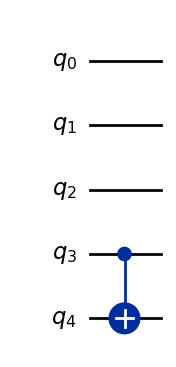

In [48]:
# Step 1: Map the problem


def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc


display(bv_function("1000").draw("mpl"))

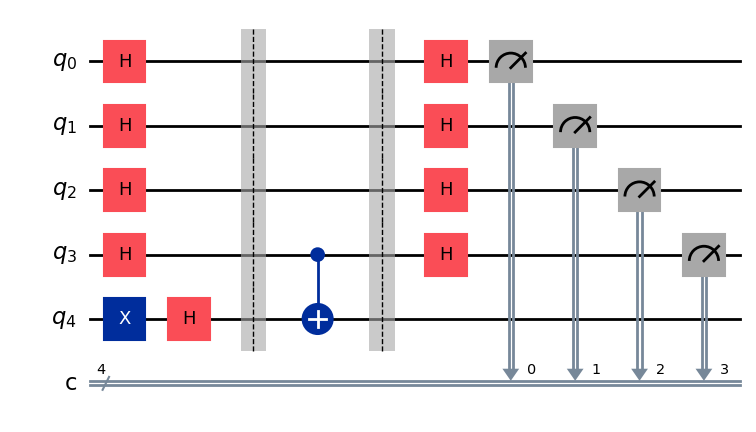

In [49]:
string = "1000"  # secret string that we'll pretend we don't know or have access to
n = len(string)
 
qc = QuantumCircuit(n + 1, n)
qc.x(n)
qc.h(range(n + 1))
qc.barrier()
# qc.compose(oracle, inplace = True)
qc.compose(bv_function(string), inplace=True)
qc.barrier()
qc.h(range(n))
qc.measure(range(n), range(n))
 
qc.draw("mpl")

In [50]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
 
qc_isa = pm.run(qc)

In [51]:
# Step 3: Run the job on a real quantum computer
 
job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.c.get_counts()

In [52]:
# Step 4: Visualize and analyze results
 
## Analysis
print(counts)

{'1000': 1}


So, with just a single query, the Deutsch-Jozsa algorithm will return the string $s$ used in the function: $f(x)=x \cdot s$ when we apply it to the Bernstein-Vazirani problem. With a classical algorithm, one would need $n$ queries to solve the same problem.

## Conclusion

We hope that by examining these simple examples, we've given you a better intuition for how quantum computers are able to harness superposition, entanglement, and interference to achieve their power over classical computers.

The Deutsch-Jozsa algorithm has huge historical importance because it was the first to demonstrate any speedup over a classical algorithm, but it was only a polynomial speedup. The Deutsch-Jozsa algorithm is just the beginning of the story.

After they used the algorithm to solve their problem, Bernstein and Vazirani used this as the basis for a more complicated, recursive problem called the *recursive Fourier sampling problem*. Their solution offered a super-polynomial speedup over classical algorithms. And even before Bernstein and Vazirani, Peter Shor had already come up with his famous algorithm that enabled quantum computers to factor large numbers exponentially faster than any classical algorithm could. These results, collectively showed the exciting promise of future quantum computer, and spurred physicists and engineers to make this future a reality.



## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts

*   the Deutsch and Deutsch-Jozsa algorithms use quantum parallelism combined with interference to find an answer to a problem faster than a classical computer can.
*   the phase kickback mechanism is a counterintuitive quantum phenomena that transfers operations on one qubit to the phase of another qubit. The Deutsch and Deutsch-Jozsa algorithms utilize this mechanism.
*   The Deutsch-Jozsa algorithm offers a polynomial speedup over any deterministic classical algorithm.
*   The Deutsch-Jozsa algorithm can be applied to a different problem, called the Bernstein-Vazirani problem, to find a hidden string encoded in a function.

### True/false

1.  T/F Deutsch's algorithm is a special case of the Deutsch-Jozsa algorithm where the input is a single qubit.
2.  T/F The Deutsch and Deutsch-Jozsa algorithms use quantum superposition and interference to achieve their efficiency.
3.  T/F The Deutsch-Jozsa algorithm requires multiple function evaluations to determine if a function is constant or balanced.
4.  T/F The "Bernstein-Vazirani algorithm" is actually the same as the Deutsch-Jozsa algorithm, applied to a different problem.
5.  T/F The Bernstein-Vazirani algorithm can find multiple secret strings simultaneously.

### Short answer

1.  How long would it take a classical algorithm to solve the Deutsch-Jozsa problem in the worst case?

2.  How long would it take a classical algorithm to solve the Bernstein-Vazirani problem? What speedup does the DJ algorithm offer in this case?

3.  Describe the phase-kickback mechanism and how it works to solve the Deutsch-Jozsa and Bernstein-Vazirani problems.

### Challenge problem

1.  The Deutsch-Jozsa algorithm: Recall that you had a question above asking you to work out the intermediate qubit states $\pi_1$, and $\pi_2$ of the Deutsch's algorithm. Do the same for the intermediate $n+1$-qubit states $\pi_1$, and $\pi_2$ of the Deutsch-Jozsa algorithm, for the specific case that $n=2$. Then, verify that $\pi_3 = |-\rangle \otimes \sum\limits_{x_0...x_n}(-1)^{f(x_0...x_n)}|x_0 ... x_n\rangle$, again, for the specific case that $n=2$.



T/F
1. True, DJ is general for n qubits, and D is only for 1
2. True
3. False, a single function is enough
4. False
5. False

Short Answer:
1. 2^(n-1) + 1
2. n reduces to 1 in quantum case
3. in DJ, the phase kickback gives the sum of + or - 1, tells the function is constant. If end with 0, the function is balanced. In BV, the phase kickback gives s as its outcome, tells the hidden string in one query.


### Reflection: Source of Quantum Advantage

The speedup comes from three steps working together:
1. **Superposition** queries all inputs at once
2. **Phase kickback** encodes $f(x)$ into phases: $|x\rangle \to (-1)^{f(x)}|x\rangle$
3. **Interference** (final Hadamard) makes constant functions give $|0\rangle^{\otimes n}$ and balanced functions give anything else

Classically, we must check $2^{n-1}+1$ inputs (worst case). Quantum needs just 1 query because we extract a *global property* (constant vs balanced) rather than individual $f(x)$ values.

# Deutsch–Jozsa Algorithm (n = 2)

## Challenge Problem Solution
This notebook cell gives a complete walkthrough of the Deutsch–Jozsa algorithm for the case \(n=2\): two input qubits plus one ancilla.

---

## Setup
- **Total qubits:** 3 (2 input + 1 ancilla)  
- Function \( f:\{0,1\}^2 \to \{0,1\} \)  
- Input basis states \( \lvert x\rangle \) for \(x \in \{00,01,10,11\}\)

---

## Initial State \(\pi_0\)
The ancilla starts in \(\lvert 1\rangle\) and both input qubits in \(\lvert 0\rangle\):
$$
\lvert \pi_0 \rangle
= \lvert 1 \rangle \otimes \lvert 0 \rangle \otimes \lvert 0 \rangle
= \lvert 1 \rangle \otimes \lvert 00 \rangle .
$$

---

## State \(\pi_1\) (after Hadamards on all qubits)
Apply \(H \otimes H \otimes H\).

Ancilla:
$$
H\lvert 1\rangle = \frac{\lvert 0\rangle - \lvert 1\rangle}{\sqrt{2}} = \lvert - \rangle .
$$

Each input qubit:
$$
H\lvert 0\rangle = \frac{\lvert 0\rangle + \lvert 1\rangle}{\sqrt{2}} .
$$

Therefore,
$$
\lvert \pi_1 \rangle
= \lvert - \rangle \otimes
\left(\frac{\lvert 0\rangle + \lvert 1\rangle}{\sqrt{2}}\right)
\otimes
\left(\frac{\lvert 0\rangle + \lvert 1\rangle}{\sqrt{2}}\right)
= \lvert - \rangle \otimes \frac{1}{2}
\left(\lvert 00\rangle + \lvert 01\rangle + \lvert 10\rangle + \lvert 11\rangle \right).
$$

In summation form:
$$
\lvert \pi_1 \rangle
= \lvert - \rangle \otimes \frac{1}{2}\sum_{x\in\{0,1\}^2} \lvert x\rangle .
$$

---

## State \(\pi_2\) (after applying the oracle \(U_x\))
The oracle acts as
$$
U_x \lvert x\rangle \lvert y\rangle = \lvert x\rangle \lvert y \oplus f(x)\rangle .
$$

With the ancilla in \(\lvert - \rangle\), this yields **phase kickback**:
$$
U_x \lvert x\rangle \lvert - \rangle = (-1)^{f(x)} \lvert x\rangle \lvert - \rangle .
$$

Applying to \(\pi_1\):
$$
\lvert \pi_2 \rangle
= \lvert - \rangle \otimes \frac{1}{2}
\sum_{x\in\{0,1\}^2} (-1)^{f(x)} \lvert x\rangle
= \lvert - \rangle \otimes \frac{1}{2}
\Big[ (-1)^{f(00)}\lvert 00\rangle + (-1)^{f(01)}\lvert 01\rangle + (-1)^{f(10)}\lvert 10\rangle + (-1)^{f(11)}\lvert 11\rangle \Big].
$$

---

## State \(\pi_3\) (after Hadamards on the input qubits)
Apply \(H \otimes H \otimes I\): Hadamard on the two inputs, identity on the ancilla.

For each input basis state,
$$
(H^{\otimes 2})\lvert x\rangle
= \frac{1}{2} \sum_{z\in\{0,1\}^2} (-1)^{x\cdot z} \lvert z\rangle,
\quad
\text{where } x\cdot z = x_0 z_0 + x_1 z_1 \pmod{2}.
$$

Thus,
$$
\lvert \pi_3 \rangle
= \lvert - \rangle \otimes \frac{1}{2} \sum_{x} (-1)^{f(x)}
\left( \frac{1}{2} \sum_{z} (-1)^{x\cdot z} \lvert z\rangle \right)
= \lvert - \rangle \otimes \frac{1}{4}
\sum_{z\in\{0,1\}^2}
\left[ \sum_{x\in\{0,1\}^2} (-1)^{f(x)+x\cdot z} \right] \lvert z\rangle .
$$

---

## Verifying the “Given Form”
The problem statement asks to verify
$$
\lvert \pi_3 \rangle \stackrel{?}{=} \lvert - \rangle \otimes
\sum_{x_0\ldots x_n} (-1)^{f(x_0\ldots x_n)} \lvert x_0\ldots x_n\rangle .
$$

**Observation:** That expression (ignoring normalization) actually matches **\(\pi_2\)**, not \(\pi_3\):
$$
\lvert \pi_2 \rangle \propto \lvert - \rangle \otimes
\sum_{x\in\{0,1\}^2} (-1)^{f(x)} \lvert x\rangle .
$$

For \(\pi_3\), the correct (normalized) expression is
$$
\lvert \pi_3 \rangle
= \lvert - \rangle \otimes \frac{1}{4}
\sum_{z\in\{0,1\}^2} \left[ \sum_{x\in\{0,1\}^2} (-1)^{f(x)+x\cdot z} \right] \lvert z\rangle .
$$

---

## Key Observation for the Measurement
For \(z=00\), we have \(x\cdot 00 = 0\) for all \(x\). Hence the amplitude of \(\lvert 00\rangle\) is
$$
\frac{1}{4}\sum_{x\in\{0,1\}^2} (-1)^{f(x)}.
$$

- If \(f\) is **constant**, the inner sum is \(\pm 4\), giving amplitude \(\pm 1\) and probability \(1\).  
- If \(f\) is **balanced**, the inner sum is \(0\), giving amplitude \(0\) and probability \(0\).

So measuring the input register yields \(\lvert 00\rangle\) with certainty iff \(f\) is constant; otherwise, one obtains a nonzero string (detecting “balanced”).

---

## Summary of States
$$
\begin{aligned}
\lvert \pi_1 \rangle
&= \lvert - \rangle \otimes \frac{1}{2}\left(\lvert 00\rangle + \lvert 01\rangle + \lvert 10\rangle + \lvert 11\rangle \right),\\[4pt]
\lvert \pi_2 \rangle
&= \lvert - \rangle \otimes \frac{1}{2}\Big[ (-1)^{f(00)}\lvert 00\rangle + (-1)^{f(01)}\lvert 01\rangle + (-1)^{f(10)}\lvert 10\rangle + (-1)^{f(11)}\lvert 11\rangle \Big],\\[4pt]
\lvert \pi_3 \rangle
&= \lvert - \rangle \otimes \frac{1}{4}
\sum_{z\in\{0,1\}^2} \left[ \sum_{x\in\{0,1\}^2} (-1)^{f(x)+x\cdot z} \right] \lvert z\rangle .
\end{aligned}
$$

**Note:** The “given form” aligns with \(\pi_2\) (up to normalization), not \(\pi_3\).


# 2025/11/2
# Quantum Teleprotation
## Introduction and background

Quantum teleportation is a technique in quantum physics that allows the transfer of quantum information from one location to another without physically moving particles. Unlike the sci-fi concept of teleportation, this process doesn't involve transporting matter. Instead, it relies on the principle of quantum entanglement, where two particles become linked regardless of distance. Through a series of precise measurements and classical communication, the quantum state of one particle can be recreated in another particle at a distant location, effectively "teleporting" the quantum information. In this module, we'll see how this works mathematically, and then we will implement quantum teleportation on a real quantum computer. The introduction here will be brief; for more background on quantum information, and more explanation about teleportation, we recommend John Watrous's course on the [Basics of quantum information](/learning/courses/basics-of-quantum-information), and in particular the section on [Teleportation.](/learning/courses/basics-of-quantum-information/entanglement-in-action/quantum-teleportation)

Classical bits can be in states 0 or 1. Quantum bits (qubits) can be in quantum states denoted $|0\rangle$ and $|1\rangle$ and also linear combinations of these states, called "superpositions", such as $|\psi\rangle = \alpha_0|0\rangle +\alpha_1|1\rangle$, with $\alpha_0,\alpha_1 \in \mathbb{C},$ and $|\alpha_0|^2+|\alpha_1|^2 = 1.$ Although the states can exist in this superposition, a measurement of the state will "collapse" it into either the $|0\rangle$ or $|1\rangle$ states. The parameters $a$ and $b$ are related to the probability of each measurement outcome according to

$$
P_0 = |\alpha_0|^2
$$

$$
P_1 = |\alpha_1|^2
$$

Hence the constraint that $|\alpha_0|^2+|\alpha_1|^2 = 1.$

Another key feature is that quantum bits can be "entangled", which means that the measurement of one qubit can affect the outcome of the measurement of another, entangled qubit. Understanding how entanglement is different from simple classical correlations is a bit tricky. Let's first explain our notation. Call two qubits belonging to friend 0 (Alice) and friend 1 (Bob), and each in the $|0\rangle$ state

$$
|0\rangle_B|0\rangle_A
$$

or

$$
|0\rangle_1|0\rangle_0
$$

sometimes shortened to simply

$$
|00\rangle
$$

Note that the lowest-numbered (or lettered) qubit is furthest to the right. This is a convention called "little-endian" notation, used throughout Qiskit.
If the two-qubit state of the friends is $|00\rangle,$ and they measure the state of their respective qubits, they will each find a 0. Similarly if the qubits were in the state $|11\rangle,$ each of their measurements would yield a 1. That is no different from the classical case. However, in quantum computing, we can combine this with superposition to obtain states like

$$
\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
$$

In a state like this, whether Alice and Bob have qubits in the state 0 or 1 is not yet known, not even yet determined by nature, and yet we know they will measure the same state for their qubit. For example, if Bob measures his qubit to be in the state $|0\rangle,$ the only way for that to happen is if the measurement has collapsed the two-qubit state to one of the two possible states, specifically to $|00\rangle.$ That leaves Alice's qubit also in the $|0\rangle$ state.

The entangled of qubits in this way does not require that the qubits remain physically close to one another. In other words, we could entangle qubits, then separate them by a large distance, and use their entanglement to send information. An entangled state like the one above is a basic unit of entanglement, and is sometimes referred to as an "e-bit", a single bit of entanglement. These e-bits can be thought of as resources in quantum communication, since each e-bit shared between distant partners can be used, as we outline here, to move information from one location to another.

The first thought for many people learning about this for the first time is about violating relativity: can we use this to send information faster than light? By all means, keep questioning and probing scientific rules, but unfortunately this won't allow us to send information faster than light, for reasons that will become clear through the course of this module. Spoiler: amazingly it is NOT due to the speed at which this collapse propagates, which does appear to happen faster than light [\[1\]](https://www.nature.com/articles/nature15759).



We start with two collaborators Alice and Bob, who are initially in the same location and can work together on the same qubits. These collaborators will entangle their qubits. Then they will move apart to two different geographic locations, bringing their respective qubits with them. Alice will then obtain quantum information on a new qubit Q. We make no assumptions about the information on Q. The state of Q could be a secret unknown to Alice; it could be unknown to all people. But Alice is given the task of transferring the information on Q to Bob. She will do this using quantum teleportation.

To accomplish this, we will need to know some quantum operations or "gates".



## Quantum operators (gates)

Feel free to skip this section if you are already familiar with quantum gates. If you want to understand these gates better, check out [Basics of quantum information](/learning/courses/basics-of-quantum-information), especially the first two lessons, on IBM Quantum Learning.

For this teleportation protocol we will primarily use two types of quantum gates: the Hadamard gate, the CNOT gate. A few others will play a lesser role: the $X$ gate, $Z$ gate, and the SWAP gate.

This module can be completed with very limited linear algebra background, but sometimes visualizing quantum mechanical gates using matrices and vectors can be helpful. So we present here the matrix/vector forms of quantum gates/states, as well.

The states we have already presented are chosen (partly by convention and partly by constraints) to have vector forms:

$$
|0\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix}
$$

$$
|1\rangle = \begin{pmatrix}0 \\ 1\end{pmatrix}
$$

In this way, an arbitrary state $|\psi\rangle = a|0\rangle+b|1\rangle$ can be written as

$$
|\psi\rangle =\begin{pmatrix}a \\ b\end{pmatrix}
$$

There is some choice in how to extend the notation to multiple-qubit states, but the choice below is quite standard:

$$
|00\rangle = \begin{pmatrix}1 \\ 0 \\ 0 \\ 0\end{pmatrix},|01\rangle = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0\end{pmatrix},
|10\rangle = \begin{pmatrix}0 \\ 0 \\ 1 \\0\end{pmatrix},|11\rangle = \begin{pmatrix}0 \\ 0 \\ 0 \\ 1\end{pmatrix}.
$$

With this choice of vector notation in mind, we can introduce our needed quantum gates, their effects on quantum states, and their matrix forms.

**H Hadamard Gate:** Creates a superposition state. Single-qubit gate.

$$
H|0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right),
$$

$$
H|1\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)
$$

$$
H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
$$

A circuit with a Hadamard gate is made as follows:



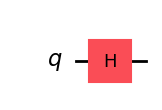

In [55]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

**CNOT Controlled-NOT Gate:** This gate uses two qubits: a control and a target. Checks the state of a control qubit which is not changed. But if the control qubit is in the state $|1\rangle$, the gate changes the state of the target qubit; if the state of the control qubit is $|0\rangle$ no change is made at all. In the notation below, assume the qubit $A$ (right-most qubit) is the control, and qubit $B$ (the left-most qubit) is the target. Below, the notation used is $CNOT(q_{control},q_{target})|BA\rangle.$

$$
CNOT(A,B)|00\rangle = |00\rangle, \\ CNOT(A,B)|01\rangle = |11\rangle, \\ CNOT(A,B)|10\rangle = |10\rangle, \\ CNOT(A,B)|11\rangle = |01\rangle
$$

You may sometimes see CNOT written with the order of the control and target simply implied. But there is no such ambiguity in code or in circuit diagrams.

$$
CNOT=\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{pmatrix}
$$

A CNOT gate looks a bit different in a circuit, since it requires two qubits. This is how it is implemented:



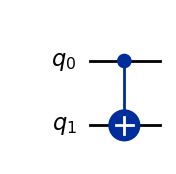

In [56]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Most gates have the same matrix form in Qiskit as everywhere else. But the CNOT gate acts on two qubits, and so suddenly ordering conventions of qubits becomes an issue. Texts that order qubits $|q_0,q_1,...\rangle$ will show a different matrix form for their CNOT gates. Verify by explicit matrix multiplication that the CNOT matrix above has the correct action on the state $|01\rangle.$
  </summary>

  **Answer:**

  $CNOT|01\rangle =\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{pmatrix}\begin{pmatrix}0 \\ 1 \\ 0 \\0\end{pmatrix} = \begin{pmatrix}0 \\ 0 \\ 0 \\1\end{pmatrix} = |11\rangle$
</details>



**$X$ Gate**: Equivalent to a NOT operation. Single-qubit gate.

$$
X|0\rangle = |1\rangle,\\X|1\rangle=|0\rangle
$$

$$
X=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

In Qiskit, creating a circuit with an $X$ gate looks like this:



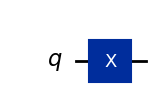

In [57]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw("mpl")

**$Z$ Gate**: Adds a "phase" to a state (a prefactor, which in the cases of the Z eigenstates $|0\rangle$ and $|1\rangle$ either a 1, or -1, respectively). Single-qubit gate.

$$
Z|0\rangle = |0\rangle,\\Z|1\rangle=-|1\rangle
$$

$$
Z=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

In Qiskit, creating a circuit with an $Z$ gate looks like this:



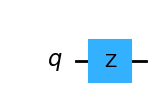

In [58]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw("mpl")

## Theory

Let's lay out the protocol for quantum teleportation using math. Then, in the next section, we'll realize this setup using a quantum computer.

**Alice and Bob entangle their qubits:** Initially, Alice's qubit and Bob's qubit are each, separately in the $|0\rangle$ state (a fine assumption and also the correct initialization for IBM® quantum computers). We can write this as $|0\rangle_B|0\rangle_A$ or simply as $|00\rangle$. Let's calculate what happens when Alice and Bob act with the Hadamard gate on Alice's qubit, and then a CNOT gate with Alice's qubit as the control and Bob's as the target:

$$
\begin{aligned}
CNOT(A,B)H_A |0\rangle_B|0\rangle_A &= CNOT(A,B)|0\rangle_B\frac{1}{\sqrt{2}}\left(|0\rangle_A+|1\rangle_A\right)\\
&=\frac{1}{\sqrt{2}}\left(CNOT(A,B)|0\rangle_B|0\rangle_A+CNOT(A,B)|0\rangle_B|1\rangle_A\right)\\
&=\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)
\end{aligned}
$$

Note that now Alice's and Bob's qubits are entangled. Although it is not yet determined by nature whether both their qubits are in the $|0\rangle$ state or the $|1\rangle$ state, it is known that their qubits are in the same state.



**Alice and Bob separate:** The two friends move their qubits to new locations, possibly very far apart. This comes with a lot of caveats: it is not trivial to move quantum information without disturbing it. But it can be moved, and indeed you will move it in this module. But keep in mind as a caveat that we expect to encounter some errors when we move quantum information around a lot.

**Q is introduced:** The secret state is prepared on qubit Q:

$$
|\psi\rangle_Q = \alpha_0 |0\rangle_Q + \alpha_1 |1\rangle_Q
$$

At this point Q is simply adjacent to Alice's qubit (A). There has been no entanglement, so the quantum state of the three qubits together can be written as:

$$
|\psi\rangle_{AB}|\psi\rangle_Q = \frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)\left(\alpha_0 |0\rangle_Q + \alpha_1 |1\rangle_Q\right).
$$

The goal is to move the information on Q from Alice's location to the location of Bob. At this point, we are not making any claims or requirements about secrecy or speed of information transfer. We are simply exploring how information can move from Alice to Bob.



Because the information begins on Q, we will assume Q is assigned the lowest number in qubit numbers, such that little endian notation causes Q to be the right-most qubit in the math below.

**Alice entangles qubits A and Q:** Alice now operates with a CNOT gate with her own qubit as the control and Q as the target, then applies a Hadamard gate to Q.  Let's calculate the three-qubit state after that operation:

$$
\begin{aligned}
H_Q CNOT(A,Q)|\psi\rangle_{AB}|\psi\rangle_Q &= H_Q CNOT(A,Q)\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)\left(\alpha_0 |0\rangle_Q + \alpha_1 |1\rangle_Q\right)\\
&= H_Q CNOT(A,Q)\frac{1}{\sqrt{2}}\left(\left(\alpha_0 |0\rangle_B|0\rangle_A|0\rangle_Q + \alpha_1 |0\rangle_B|0\rangle_A|1\rangle_Q\right)+\left(\alpha_0 |1\rangle_B|1\rangle_A|0\rangle_Q + \alpha_1 |1\rangle_B|1\rangle_A|1\rangle_Q\right)\right)\\
&= H_Q \frac{1}{\sqrt{2}}\left(\alpha_0 |0\rangle_B|0\rangle_A|0\rangle_Q + \alpha_1 |0\rangle_B|1\rangle_A|1\rangle_Q+\alpha_0 |1\rangle_B|1\rangle_A|0\rangle_Q + \alpha_1 |1\rangle_B|0\rangle_A|1\rangle_Q\right)\\
&= \frac{1}{2}\left(\alpha_0 |0\rangle_B|0\rangle_A|0\rangle_Q + \alpha_0 |0\rangle_B|0\rangle_A|1\rangle_Q + \alpha_1 |0\rangle_B|1\rangle_A|0\rangle_Q-\alpha_1 |0\rangle_B|1\rangle_A|1\rangle_Q\right)\\
&+\frac{1}{2}\left(\alpha_0 |1\rangle_B|1\rangle_A|0\rangle_Q + \alpha_0 |1\rangle_B|1\rangle_A|1\rangle_Q + \alpha_1 |1\rangle_B|0\rangle_A|0\rangle_Q - \alpha_1 |1\rangle_B|0\rangle_A|1\rangle_Q\right)
\end{aligned}
$$



Because A and Q are in the same location, let us group the terms above according to the outcomes of measurements on qubits A and Q:

$$
\begin{aligned}
|\psi\rangle = \frac{1}{2}\left((\alpha_0 |0\rangle_B+\alpha_1 |1\rangle_B)|0\rangle_A|0\rangle_Q +  (\alpha_0 |0\rangle_B-\alpha_1 |1\rangle_B)|0\rangle_A|1\rangle_Q + (\alpha_1 |0\rangle_B+\alpha_0 |1\rangle_B)|1\rangle_A|0\rangle_Q+ (-\alpha_1 |0\rangle_B+\alpha_0 |1\rangle_B)|1\rangle_A|1\rangle_Q \right)\\
\end{aligned}
$$

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Given the expression above for the states of all three qubits, what is the probability that a measurement of qubits A and Q yields $|0\rangle_A|0\rangle_Q?$
  </summary>

  **Answer:**

  25%. To see this, recall that Bob's state must be normalized, so
  $ |_A \langle0|_Q\langle0| \frac{1}{2} |0\rangle_A|0\rangle_Q (\alpha_0 |0\rangle_B+\alpha_1 |1\rangle_B)|^2 = \frac{1}{4}|(\alpha_0 |0\rangle_B+\alpha_1 |1\rangle_B)|^2 = \frac{1}{4}$
</details>



00, 01, 10, 11 shares the probabilty equally, meanning it will be 1/4

Now, Alice can measure qubits A and Q . She cannot control the outcome of that measurement, since quantum measurements are probabilistic. So when she measures, there are 4 possible outcomes and all 4 are equally likely: $|0\rangle_A|0\rangle_Q,$ $|0\rangle_A|1\rangle_Q,$ $|1\rangle_A|0\rangle_Q,$ and $|1\rangle_A|1\rangle_Q.$ Note that each outcome has different implications for Bob's qubit. For example, if Alice finds her qubits to be in $|0\rangle_A|0\rangle_Q,$ that has collapsed the entire, 3-qubit quantum state to $(\alpha_0|0\rangle_B+\alpha_1|1\rangle_B)|0\rangle_A|0\rangle_Q.$ Other measurement outcomes for Alice yield different states for Bob. These are collected together in the table below.



| Alice outcome                        | Bob's state                                          | Instruction to Bob | Result                                              |
| ------------------------------------ | ---------------------------------------------------- | ------------------ | --------------------------------------------------- |
| $ \vert 0\rangle_A \vert 0\rangle_Q$ | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$  | None               | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |
| $ \vert 0\rangle_A \vert 1\rangle_Q$ | $\alpha_0\vert 0\rangle_B-\alpha_1\vert 1\rangle_B$  | $Z$                | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |
| $ \vert 1\rangle_A \vert 0\rangle_Q$ | $\alpha_1\vert 0\rangle_B+\alpha_0\vert 1\rangle_B$  | $X$                | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |
| $ \vert 1\rangle_A \vert 1\rangle_Q$ | $-\alpha_1\vert 0\rangle_B+\alpha_0\vert 1\rangle_B$ | $X$ then $Z$       | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |



For all the possible measurement outcomes on Alice's qubits, Bob's qubit is left in a state vaguely resembling the secret state originally on Q. In the case where Alice measures $|0\rangle_C|0\rangle_A$ (the first row of the table), Bob's qubit is left in exactly the secret state! In the other cases, there is something off about the state. The coefficients ($\alpha$'s) are swapped, or there is a "-" sign where there should be a "+" sign, or both. In order to modify Bob's qubit to make it exactly equal to the secret state, Alice must call Bob (use some means of classical communication) and tell Bob to perform additional operations on his qubit, as outlined in the table. For example, in the third row the coefficients are swapped. If Alice calls Bob and tells him to apply an $X$ gate to his qubit, it changes a $|0\rangle$ to a $|1\rangle$ and vice-versa, and out comes the secret state.

It should now be clear why we can't use this setup to send information faster than light. We might get lucky and measure $|0\rangle_A|0\rangle_Q,$ meaning Bob has exactly the secret state, instantly. But Bob doesn't know that until we call him and tell him "We measured $|0\rangle_A|0\rangle_Q$, so you don't have to do anything."

In the thought experiment, the qubits are often physically separated and taken to a new location. IBM® quantum computers use solid-state qubits on a chip that can't be separated. So instead of moving Alice and Bob to different locations, we will separate the information on the chip itself by using so-called "swap gates" to move the information from one qubit to another.



## Experiment 1: Basic teleportation

IBM Quantum recommends tackling quantum computing problems using a framework we call "Qiskit patterns". It consists of the following steps.

*   Step 1: Map your problem to a quantum circuit
*   Step 2: Optimize your circuit for running on real quantum hardware
*   Step 3: Execute your job on IBM quantum computers using Runtime Primitives
*   Step 4: Post-process the results

### Step 1: Map your problem to a quantum circuit

All the math we did above was outlining step 1. We will implement it now, building our quantum circuit using Qiskit! We start creating a quantum circuit with three qubits, and entangling the two qubits of Alice and Bob. We will take these to be qubits 1 and 2, and we will reserve qubit 0 for the secret state.



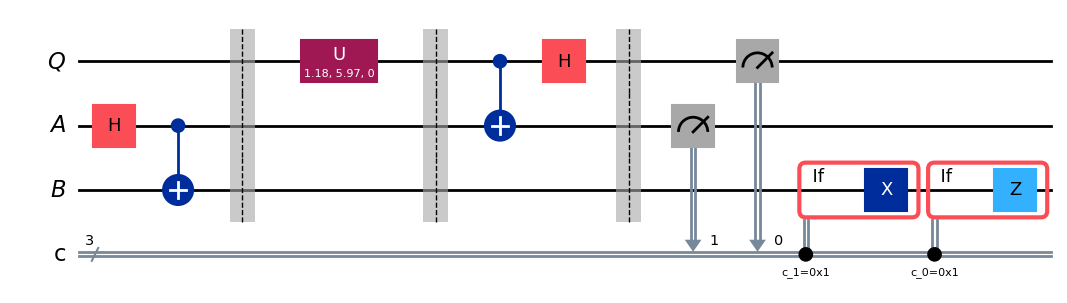

In [59]:
# Step 1: Map your problem to a quantum circuit

# Import some general packages
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np

# Define registers
secret = QuantumRegister(1, "Q")
Alice = QuantumRegister(1, "A")
Bob = QuantumRegister(1, "B")

cr = ClassicalRegister(3, "c")

qc = QuantumCircuit(secret, Alice, Bob, cr)

# We entangle Alice's and Bob's qubits as in our work above. We apply a Hadamard gate and then a CNOT gate.
# Note that the second argument in the CNOT gate is the target.
qc.h(Alice)
qc.cx(Alice, Bob)

# Inserting a barrier changes nothing about the logic. It just allows us to force gates to be positioned in "layers".
qc.barrier()

# Now we will use random variables to create the secret state. Don't worry about the "u" gate and the details.
np.random.seed(42)  # fixing seed for repeatability
theta = np.random.uniform(0.0, 1.0) * np.pi  # from 0 to pi
varphi = np.random.uniform(0.0, 2.0) * np.pi  # from 0 to 2*pi

# Assign the secret state to the qubit on the other side of Alice's (qubit 0), labeled Q
qc.u(theta, varphi, 0.0, secret)
qc.barrier()

# Now entangle Q and Alice's qubits as in the discussion above.
qc.cx(secret, Alice)
qc.h(secret)
qc.barrier()

# Now Alice measures her qubits, and stores the outcomes in the "classical registers" cr[]
qc.measure(Alice, cr[1])
qc.measure(secret, cr[0])

# Now we insert some conditional logic. If Alice measures Q in a "1" we need a Z gate, and if Alice measures A in a "1" we need an X gate (see the table).
with qc.if_test((cr[1], 1)):
    qc.x(Bob)
with qc.if_test((cr[0], 1)):
    qc.z(Bob)

qc.draw(output="mpl")

That's all we have to do to get Alice's state teleported to Bob. However, recall that when we measure a quantum state $\alpha_0 |0\rangle+\alpha_1|1\rangle$ we find either $|0\rangle$ or $|1\rangle.$ So at the end of all this, Bob definitely has Alice's secret state, but we can't easily verify this with a measurement. In order for a measurement to tell us that we did this correctly, we have to do a trick. We had an operator labeled "U" for "unitary" which we used to prepare Alice's secret state. We can apply the inverse of U at the end of our circuit. If U mapped Alice's $|0\rangle$ state into $\alpha_0 |0\rangle+\alpha_1|1\rangle$, then the inverse of U will map Bob's $\alpha_0 |0\rangle+\alpha_1|1\rangle$ back to $|0\rangle.$ So this last part wouldn't necessarily be done if the goal were just to move quantum information. This is only done for us to check ourselves.



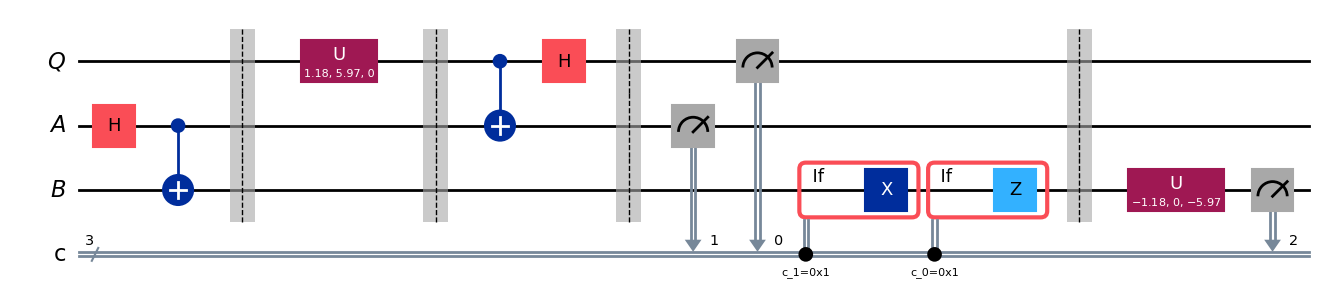

In [60]:
# Add the inverse of U and measure Bob's qubit.
qc.barrier()

qc.u(theta, varphi, 0.0, Bob).inverse()  # inverse of u(theta,varphi,0.0)
qc.measure(Bob, cr[2])  # add measurement gate

qc.draw(output="mpl")

So if we've done this correctly, our measurement on Bob's qubit should yield a $|0\rangle$ state. Of course, these measurements are probabilistic. So if there is even a small chance of measuring Bob's qubit to be in the $|1\rangle$ state, then a single measurement could result in $|1\rangle.$ We would really want to make many measurements to be assured that the probability of $|0\rangle$ is quite high.

### Step 2: Optimize problem for quantum execution

This step takes the operations we want to perform and expresses them in terms of the functionality of a specific quantum computer. It also maps our problem onto the layout of the quantum computer.

We will start by loading several packages that are required to communicate with IBM quantum computers. We must also select a backend on which to run. We can either choose the least busy backend, or select a specific backend whose properties we know.

There is code below for saving your credentials upon first use. Be sure to delete this information from the notebook after saving it to your environment, so that your credentials are not accidentally shared when you share the notebook. See [Set up your IBM Cloud account](/docs/guides/initialize-account) and [Initialize the service in an untrusted environment](/docs/guides/cloud-setup-untrusted) for more guidance.

In [61]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Load the Qiskit Runtime service

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
service = QiskitRuntimeService()

# Use the least busy backend, or uncomment the loading of a specific backend like "ibm_brisbane".
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
# backend = service.backend("ibm_brisbane")
print(backend.name)

management.get:WARNING:2025-11-01 19:14:06,603: Loading default saved account


ibm_fez


In [63]:
from qiskit.circuit import IfElseOp

backend.target.add_instruction(IfElseOp, name="if_else_01")

Now we must "transpile" the quantum circuit. This involves many sub-steps and is a fascinating topic. Just to give an example of a sub-step: not all quantum computers can directly implement all logical gates in Qiskit. We must write the gates from our circuit in terms of gates the quantum computer can implement. We can carry out that process, and others, using a preset pass manager. Setting `optimization = 3` (the highest level of optimization) ensures that the mapping from our abstract quantum circuit to the instructions given to the quantum computer is as efficient as our pre-processing can get it.



In [64]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

A "Sampler" is a primitive designed to sample possible states resulting from a quantum circuit, and collect statistics on what states might be measured and with what probability. We import the Qiskit Runtime Sampler here:



In [65]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)

Not all computations on a quantum computer can be reasonably simulated on classical computers. This simple teleportation definitely can be, but it isn't at all surprising that we can classically save information in one place or another. We strongly recommend carrying out these calculations using a real IBM quantum computer. But in case you have exhausted your free monthly use, or if something must be completed in class and can't wait in the queue, this module can be completed using a simulator. To do this, simply run the cell below and uncomment the associated lines in the "Execute" steps.



In [67]:
# Load the backend sampler
from qiskit.primitives import BackendSamplerV2

# Load the Aer simulator and generate a noise model based on the currently-selected backend.
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel


noise_model = NoiseModel.from_backend(backend)

# Define a simulator using Aer, and use it in Sampler.
backend_sim = AerSimulator(noise_model=noise_model)
sampler_sim = BackendSamplerV2(backend=backend_sim)

# Alternatively, load a fake backend with generic properties and define a simulator.
# backend_gen = GenericBackendV2(num_qubits=18)
# sampler_gen = BackendSamplerV2(backend=backend_gen)

### Step 3: Execute

Use the sampler to run your job, with the circuit as an argument.



In [68]:
job = sampler.run([qc_isa])
# job = sampler_sim.run([qc_isa])
res = job.result()
counts = res[0].data.c.get_counts()

### Step 4: Post-processing and analysis

Let's plot the results and interpret them.



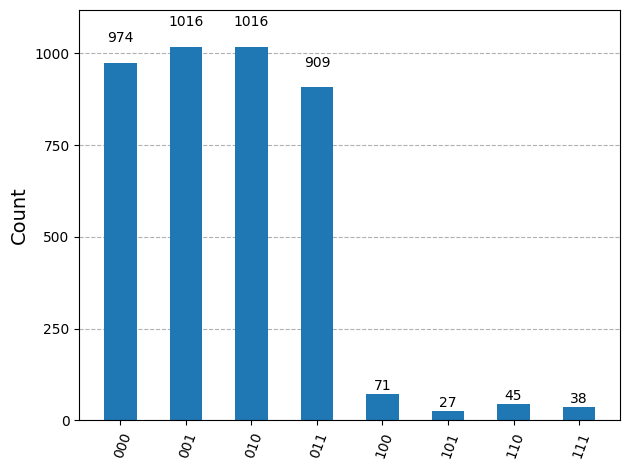

In [69]:
# This required 5 s to run on a Heron r2 processor on 10-28-24
from qiskit.visualization import plot_histogram

plot_histogram(counts)

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Which of the states above indicate successful teleportation, and how can you tell?
  </summary>

  **Answer:**

  The states $|000\rangle,$ $|001\rangle,$ $|010\rangle,$ $|011\rangle$ are all consistent with successful teleportation. This is because we added a gate to undo the initial preparation of the secret state. If the secret state was successfully teleported to Bob's qubit, that additional gate should return Bob's qubit to the $|0\rangle$ state. So any state above with Bob's qubit (qubit 0, also measured to the 0th component of the classical register, and hence the highest/right-most) in the $|0\rangle$ state indicates success.
</details>

This plot is showing all measurement outcomes for the three qubits, over 5,000 trials or "shots". We pointed out earlier that Alice would measure all possible states for qubits A and Q with equal likelihood. We assigned qubits 0-2 in the circuit to Q, A, and B, in that order. In little-endian notation, Bob's qubit is the left-most/lowest. So the four bars on the left correspond to Bob's qubit being $|0\rangle$, and the other two qubits being in all possible combinations with roughly equal probability. Note that almost all (usually \~95%) of measurements yield Bob's qubit in the $|0\rangle$ state, meaning our setup was successful! There are a handful of shots (\~5%) that yielded Bob's qubit in the $|1\rangle$ state. That should not logically be possible. However, all modern quantum computers suffer from noise and errors to a much greater extent than classical computers. And quantum error correction is still an emerging field.



## Experiment 2: Teleporting across a processor

Arguably, the most interesting part of quantum teleportation is that a quantum state can be teleported over long distances instantly (though the classical communication of extra gates is not instant). As already stated, we can't break qubits off the processor and move them around. But we can move the information from one qubit to another, until the qubits involved in teleportation are on opposite sides of the processor. Let us repeat the steps we took above, but now we will make a larger circuit with enough qubits to span the processor.

### Step 1: Map your problem to a quantum circuit

This time, the qubits corresponding to Alice and Bob will change. So we will not name a single qubit "A" and another "B". Rather, we will number the qubits and use variables to represent the current position of the information on qubits belonging to Alice and Bob. All other steps except the swap gates are as described previously.



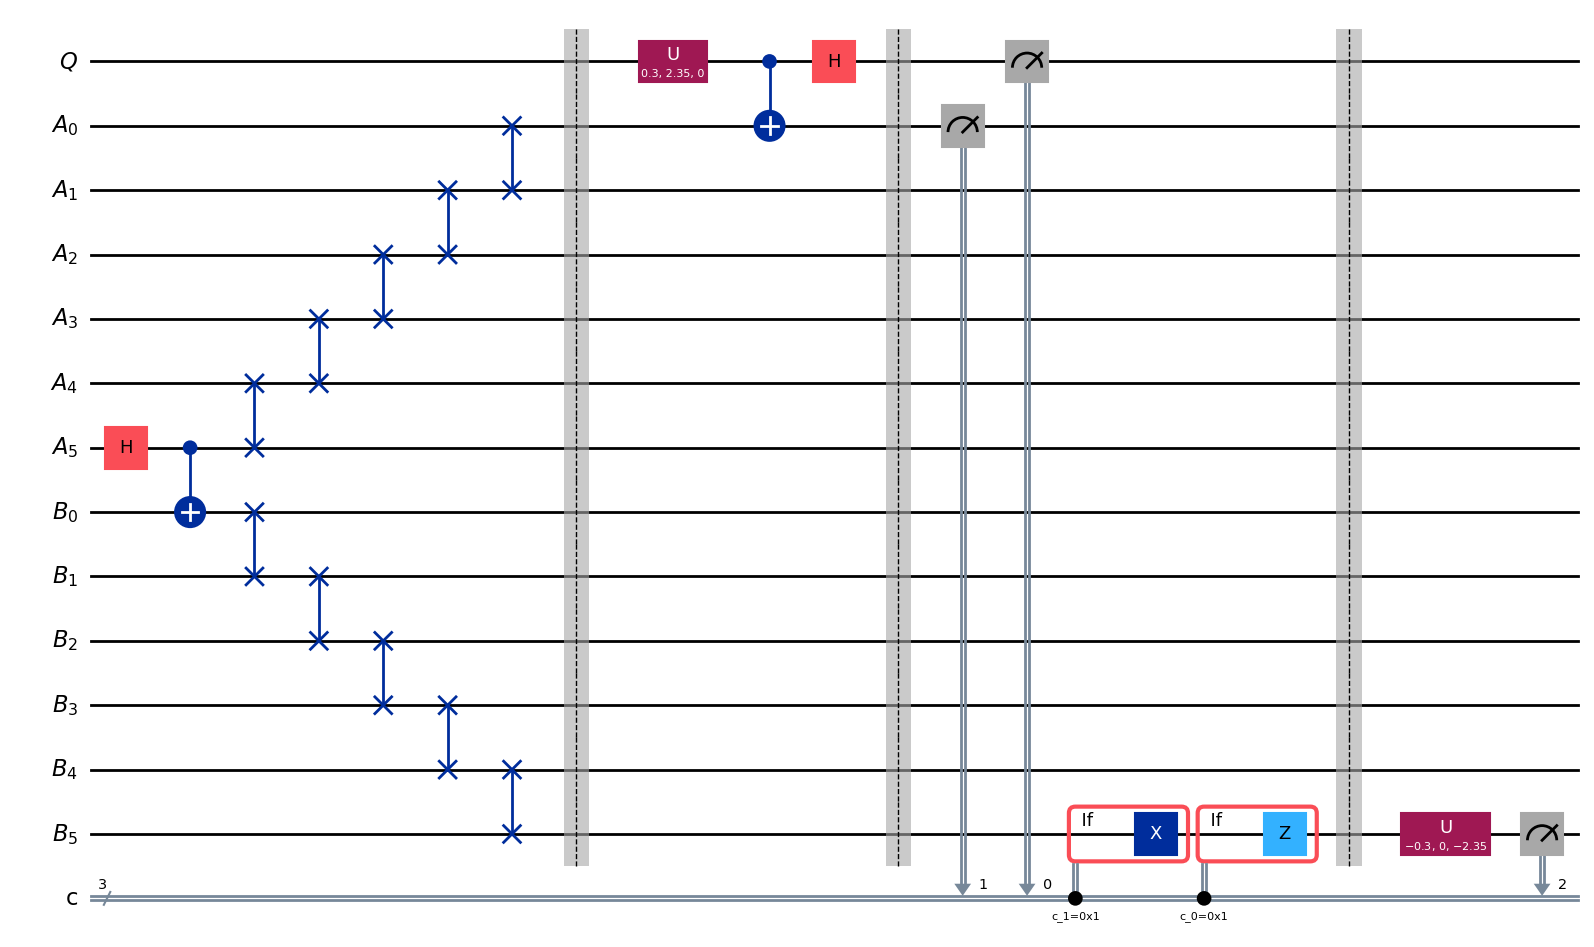

In [70]:
# Step 1: Map

# Define registers
qr = QuantumRegister(13, "q")

qc = QuantumCircuit(qr, cr)

# Define registers
secret = QuantumRegister(1, "Q")
ebitsa = QuantumRegister(6, "A")
ebitsb = QuantumRegister(6, "B")
# q = ClassicalRegister(1, "q meas")
# a = ClassicalRegister(1, "a")
# b = ClassicalRegister(1, "b")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(secret, ebitsa, ebitsb, cr)

# We'll start Alice in the middle of the circuit, then move information outward in both directions.
Alice = 5
Bob = 0
qc.h(ebitsa[Alice])
qc.cx(ebitsa[Alice], ebitsb[Bob])

# Starting with Bob and Alice in the center, we swap their information onto adjacent qubits, until the information is on distant qubits.

for n in range(Alice):
    qc.swap(ebitsb[Bob], ebitsb[Bob + 1])
    qc.swap(ebitsa[Alice], ebitsa[Alice - 1])
    Alice = Alice - 1
    Bob = Bob + 1

qc.barrier()

# Create a random state for Alice (qubit zero)
np.random.seed(42)  # fixing seed for repeatability
# theta = np.random.uniform(0.0, 1.0) * np.pi    #from 0 to pi
theta = 0.3
varphi = np.random.uniform(0.0, 2.0) * np.pi  # from 0 to 2*pi


qc.u(theta, varphi, 0.0, secret)

# Entangle Alice's two qubits
qc.cx(secret, ebitsa[Alice])
qc.h(secret)

qc.barrier()

# Make measurements of Alice's qubits and store the results in the classical register.
qc.measure(ebitsa[Alice], cr[1])
qc.measure(secret, cr[0])

# Send instructions to Bob's qubits based on the outcome of Alice's measurements.
with qc.if_test((cr[1], 1)):
    qc.x(ebitsb[Bob])
with qc.if_test((cr[0], 1)):
    qc.z(ebitsb[Bob])

qc.barrier()

# Invert the preparation we did for Carl's qubit so we can check whether we did this correctly.
qc.u(theta, varphi, 0.0, ebitsb[Bob]).inverse()  # inverse of u(theta,varphi,0.0)
qc.measure(ebitsb[Bob], cr[2])  # add measurement gate

qc.draw("mpl")

You can see in the circuit diagram that the logical steps are the same. The only difference is that we used the swap gates to bring Alice's qubit's state from qubit 6 ($A_5$) up to qubit 1 ($A_0$), right next to Q. And we used swap gates to bring Bob's initial state from qubit 7 ($B_0$) down to qubit 12 ($B_5$). Note that the state on qubit 12 is not even related to Q's secret state until measurements are made on the distant qubits 0 and 1, and the state on qubit 12 is not equal to the secret state until after the conditional $X$ and $Z$ gates are applied.

### Step 2: Optimize your circuit

Normally, when we use the pass manager to transpile and optimize our circuits, it makes sense to set `optimization_level = 3`, because we want our circuits to be as efficient as possible. In this case, there is no computational reason for us to transfer states from qubits 6 and 7 over to qubits 1 and 12. That was just something we did to demonstrate teleportation over a distance. If we ask the pass manager to optimize our circuit, it will realize there is no logical reason for these swap gates, and it will remove them and carry out the gate operations on adjacent qubits. So for this special case, we use `optimization_level = 0`.



In [71]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pmzero = generate_preset_pass_manager(target=target, optimization_level=0)

qc_isa_zero = pmzero.run(qc)

print(qc_isa_zero.depth())

55


### Step 3: Execute

As before, we recommend running on real IBM quantum computers. If your monthly free usage has been reached, feel free to uncomment the simulator cells to run on a simulator.



In [72]:
# This required 5 s to run on a Heron r2 processor on 10-28-24
job = sampler.run([qc_isa_zero])
# job = sampler_sim.run([qc_isa_zero])
counts = job.result()[0].data.c.get_counts()

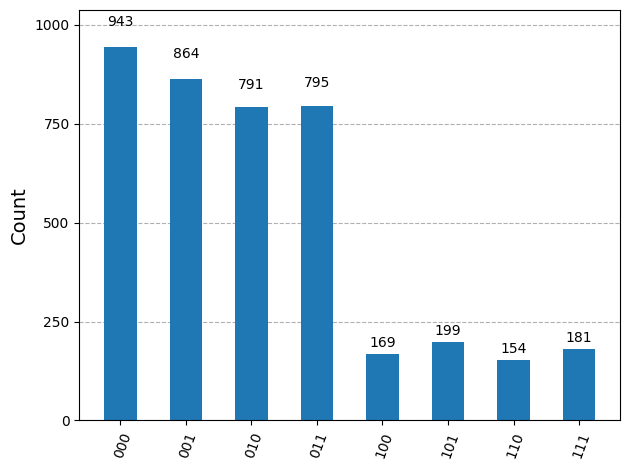

In [73]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

### Step 4: Classical post-processing

Again we see that the probabilities for the possible outcomes for Alice's qubits are fairly uniform. There is a strong preference for finding Bob's qubit in $|0\rangle$ after inverting the secret code, meaning there is a strong probability that we correctly teleported the secret state across the processor from Q to Bob (qubits 0 to 12). However, we note that there is now about a higher chance of *not* measuring $|0\rangle$ for Bob. This is an important lesson in quantum computing: the more gates you have, especially multi-qubit gates like swap gates, the more noise and errors you will encounter.



## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts

*   Qubits can be entangled, meaning a measurement of one qubit affects or even determines the state of another qubit.
*   Entanglement differs from classical correlations; for example, qubits A and B could be in a superposition of states like $\alpha_0|00\rangle+\alpha_1|11\rangle.$ The state of A or B could be undetermined by nature, and yet A and B could still be guaranteed to be in the same state.
*   Through a combination of entanglements and measurements, we can transfer a state (which can store information) from one qubit to another. This transfer can even be done over long distances, and this is called quantum teleportation.
*   Quantum teleportation relies on quantum measurements, which are probabilistic. Thus, classical communication can be necessary to tweak the teleported states. This prevents quantum teleportation from moving information faster than light. Quantum teleportation does not violate relativity or causality.
*   Modern quantum computers are more susceptible to noise and errors than classical computers. Expect a few percent error.
*   The more gates you add in sequence (especially 2-qubit gates) the more errors and noise you can expect.

### True/False questions

1.  T/F Quantum teleportation can be used to send information faster than light.
2.  T/F Modern evidence suggests that the collapse of a quantum state propagates faster than light.
3.  T/F In Qiskit, qubits are ordered in states with the lowest-numbered qubit on the right, as in $|q_3,q_2,q_1, q_0\rangle$

### MC questions

1.  Qubits A and B are entangled, then separated by a great distance $d$. Qubit A is measured. Which statement is correct about the speed at which the state of qubit B is affected?

*   a. Qubit B is affected instantly, within experimental tolerance, in experiments run so far.
*   b. Qubit B is affected after a time $d/c$, meaning the quantum state "collapses" at approximately the speed of light, within experimental tolerance.
*   c. Qubit B is affected only after classical communication has occurred, meaning it happens in a time longer than $d/c$.
*   d. None of the above

2.  Recall that measurement probability is related to amplitudes in quantum states. For example, if a qubit is initially in the state $\alpha_0|0\rangle+\alpha_1 |1\rangle,$ the probability of measuring the state $|0\rangle$ is $|\alpha_0|^2.$ Not all sets of measurements will exactly match these probabilities, due to finite sampling (just as flipping a coin might yield heads twice in a row). The measurement histogram below could correspond to which of the following quantum states? Select the best option.

![entangled\_teleportation\_fig](/learning/images/modules/computer-science/quantum-teleportation/entangled_teleportation_fig.avif)

*   a. $|0\rangle$
*   b. $\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)$
*   c. $\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$
*   d. $\frac{4}{5}|0\rangle+\frac{3}{5}|1\rangle$
*   e. $\frac{3}{5}|0\rangle+\frac{4}{5}|1\rangle$

3.  Which of the following states show(s) qubits A and B entangled? Select all that apply.

*   a. $\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)$
*   b. $\frac{4}{5}|0\rangle_B|0\rangle_A+\frac{3}{5}|1\rangle_B|1\rangle_A$
*   c. $\frac{1}{\sqrt{2}}\left(|0\rangle_B|1\rangle_A-|1\rangle_B|0\rangle_A\right)$
*   d. $\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|0\rangle_A\right)$
*   e. $|0\rangle_B|0\rangle_A$

4.  In this module, we prepared an entangled state: $\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right).$ But there are many other entangled states one could use for a similar protocol. Which of the states below could yield a 2-qubit measurement histogram like the following? Select the best response.

![entangled\_teleportation\_fig\_0110](/learning/images/modules/computer-science/quantum-teleportation/entangled_teleportation_fig_0110.avif)

*   a. $\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)$
*   b. $\frac{4}{5}|0\rangle_B|0\rangle_A+\frac{3}{5}|1\rangle_B|1\rangle_A$
*   c. $\frac{1}{\sqrt{2}}\left(|0\rangle_B|1\rangle_A-|1\rangle_B|0\rangle_A\right)$
*   d. $\frac{4}{5}|0\rangle_B|1\rangle_A+\frac{3}{5}|1\rangle_B|0\rangle_A$
*   e. $|0\rangle_B|0\rangle_A$

### Discussion questions

1.  Describe the quantum teleportation protocol, from start to finish, to your partner/group. See if they have anything to add, or if they have questions.

2.  Is there anything unique about the initial entangled state between Alice and Bob: $\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)?$ If so, what is unique about it? If not, what other entangled states could we have used?



T/F
1. No, A must share with B the comment to reverse the qubit, which is limited under speed of light
2. False
3. True

MC: 
1. d
2. e
3. a,b,c
4. c

DQ:
1. did that to my roommate Berry, who understand nothing about Quantum physics, seems work well?
2. No, only remember that if we use other states we should edit the comment send from alice to bob, make sure that bob reverse the qubits successfully.

# 3 Quantum Simulations

In this section, we aim at using the knowledge above with some extention to do simple simlulation problems.

## Tutorial 1: Introduction to Qiskit patterns

I will not try to copy everything under this section, as they contain too much link to the external sources. I will look at those I read, and may mention them in the following sections, like when we use it in section 4.

There are many partners for Qiskit, and they are divided into four sections:

## 1.1 Map the problem to quantum circuits and operators

The "map" step is the foundational phase of a Qiskit pattern where users transform classical problems into quantum-native representations—typically quantum circuits or operators. This translation process is critical for applications ranging from chemistry simulations to quantum optimization algorithms.

## Core Purpose and Outputs

This step involves encoding the problem into abstract circuits or operators that represent quantum states and observables. For instance, chemistry problems require constructing quantum circuits representing molecular wave faunctions, with operators defining the energy Hamiltonian. The output is typically a collection of quantum circuits or operators ready for optimization.

## Tools for Circuit Construction

### Circuit Library
Qiskit's circuit library provides an extensive collection of standard gates and higher-level quantum operations, including:
- **Pauli gates**: X, Y, Z
- **Rotation gates**: RX, RY, RZ
- **Controlled operations**: CNOT, Toffoli

These gates serve as building blocks for constructing quantum algorithms. The library also includes specialized circuits like the QFT and variational ansätze commonly used in VQE applications.

### Operators and SparsePauliOp
The `SparsePauliOp` class is the primary tool for representing quantum operators as linear combinations of Pauli strings. This is particularly crucial for specifying observables in quantum chemistry and simulation tasks. 

`SparsePauliOp` enables efficient operator arithmetic for hundreds of qubits when the number of non-zero Pauli terms is sufficiently small, making it memory-efficient compared to dense matrix representations. Users can initialize operators using the `from_sparse_list` method, specifying Pauli strings, qubit indices, and coefficients.

## Advanced Capabilities

### Classical Feedforward and Control Flow
Dynamic circuits enable mid-circuit measurements with classical feedforward operations, allowing quantum gate execution to depend on measurement outcomes. Qiskit implements this through the `if_test()` method, which creates conditional execution blocks. 

This capability is essential for algorithms requiring:
- Adaptive measurements
- Error correction protocols
- Efficient state preparation

**Note**: Mid-circuit measurements typically have longer execution times than two-qubit gates, potentially offsetting benefits from reduced circuit depth.

### OpenQASM 3 Integration
OpenQASM 3 serves as an intermediate representation language supporting classical feedforward and control flow based on measurement outcomes. It enables explicit timing specifications and low-level pulse definitions for calibration tasks. 

Qiskit provides bidirectional conversion tools:
- `qasm3.dump()` - Export circuits to OpenQASM strings
- `qasm3.loads()` - Import OpenQASM programs into QuantumCircuit objects


## 1.2 Optimizing for Target Hardware

The "optimize for target hardware" step transforms abstract quantum circuits from the mapping phase into executable Instruction Set Architecture (ISA) circuits that can run on physical quantum hardware. This critical optimization process balances circuit fidelity, execution time, and resource constraints to maximize the likelihood of successful quantum computations.

## Core Purpose and ISA Circuits

This step performs a series of optimizations including routing circuits to physical qubit layouts, converting gates to hardware-native basis gates, and reducing operation counts. Abstract circuits must be transpiled to ISA circuits—circuits containing only gates understood by the target hardware (basis gates) and respecting connectivity constraints (coupling map). As of March 2024, only ISA circuits can be executed on IBM hardware using Qiskit Runtime.

## The Qiskit Transpiler

### Transpilation Stages

The transpiler operates through distinct stages, each addressing specific optimization challenges:

**1. Layout Stage**: Maps logical circuit qubits to physical hardware qubits. The layout significantly impacts subsequent routing efficiency and overall circuit performance.

**2. Routing Stage**: Inserts SWAP gates to satisfy hardware connectivity constraints. The routing algorithm ensures all multi-qubit gates operate on adjacent physical qubits according to the device's coupling map.

**3. Translation Stage**: Rewrites all gates into the hardware's native basis gates. For instance, if hardware only supports CZ gates but the circuit requests CX gates, the translation stage decomposes CX into CZ and single-qubit rotations.

**4. Optimization Stage**: Reduces gate count and circuit depth through various optimization passes. This includes canceling redundant gates, commuting operations, and consolidating consecutive single-qubit gates.

**5. Scheduling Stage** (optional): Inserts explicit delay instructions to control timing, which is essential for implementing dynamical decoupling and other time-sensitive error suppression techniques.

### Optimization Levels

Qiskit provides four optimization levels (0-3) offering different trade-offs between compilation speed and circuit quality:

- **Level 0**: Minimal optimization—performs basic layout and routing with no gate optimization
- **Level 1**: Light optimization with basic gate cancellation
- **Level 2**: Default setting providing balanced optimization suitable for most use cases
- **Level 3**: Heavy optimization employing sophisticated algorithms to minimize gate count and depth, though significantly slower for large circuits

Higher optimization levels typically produce circuits with fewer two-qubit gates and reduced depth, directly improving fidelity since multi-qubit gates have higher error rates and qubits decohere over time.

## Advanced Optimization Tools

### Qiskit Transpiler Service and AI-Powered Passes

The Qiskit Transpiler Service leverages IBM Cloud resources and AI-powered transpiler passes to achieve superior circuit optimization. Available to Premium Plan users, this service provides:

**AI Routing Pass**: Uses reinforcement learning algorithms to intelligently select layouts and perform circuit routing. The AI models typically outperform traditional heuristic algorithms, particularly for large circuits.

**AI Synthesis Passes**: Employ machine learning to optimize specific circuit blocks:
- **AICliffordSynthesis**: Optimizes Clifford circuits (H, S, CX gates) up to 9 qubits
- **AILinearFunctionSynthesis**: Optimizes linear function circuits (CX, SWAP gates) up to 9 qubits  
- **AIPermutationSynthesis**: Optimizes permutation circuits for up to 65 qubits

The AI-powered passes can reduce two-qubit gate counts by an average of 42% when combined with heuristic passes. They operate both locally (with additional dependencies) or remotely via the cloud service. Users can enable AI optimization by setting `ai="true"` when instantiating the transpiler service, or use `ai="auto"` to let the service intelligently decide based on circuit characteristics.

### Pass Managers

Pass managers orchestrate the transpilation process by composing individual transformation passes:

**Preset Pass Managers**: The `generate_preset_pass_manager` function creates pre-configured pass managers based on optimization level and target backend, providing a convenient high-level interface.

**Custom Pass Managers**: Users can create custom pass managers by composing individual passes for specialized optimization workflows. This enables fine-grained control over the transpilation pipeline.

**Staged Pass Managers**: Organize transpilation into distinct stages (pre-layout, layout, routing, translation, optimization, scheduling), with each stage defined by its own pass manager. Stages can be customized or replaced independently.

## Error Suppression: Dynamical Decoupling

Dynamical decoupling is a crucial error suppression technique that inserts sequences of gates (like X-X or XY4 sequences) into idle periods of quantum circuits. These gate sequences compose to the identity but cancel unwanted environmental interactions, reducing decoherence effects.

Implementation requires:
1. **Scheduling Analysis**: Using `ALAPScheduleAnalysis` or `ASAPScheduleAnalysis` to add timing information to circuits
2. **PadDynamicalDecoupling Pass**: Inserting the DD sequences into identified idle windows with proper spacing

Dynamical decoupling works best when circuits have significant idle time—situations where some qubits remain inactive while others execute gates. The technique requires careful consideration of:
- Gate duration and timing constraints
- The specific DD sequence chosen (X-X, XY4, Uhrig, etc.)
- Pulse alignment requirements for the target hardware
- Mid-circuit measurement latency for dynamic circuits

## Debugging and Testing Tools

### Exact Simulation

**Qiskit SDK Primitives**: Reference implementations provide exact simulation for small circuits, useful for verifying circuit correctness before hardware execution.

**Qiskit Aer**: High-performance simulation framework supporting:
- **Multiple simulation methods**: Statevector, density matrix, unitary, matrix product state, stabilizer
- **Noise models**: Both automatic noise models based on real device calibration data and custom noise models for research
- **GPU acceleration**: Support for CUDA-enabled GPUs to accelerate simulations of circuits with 20+ qubits
- **Large-scale simulation**: Stabilizer circuits can be efficiently simulated with thousands of qubits

### Local Testing Mode

Qiskit Runtime's local testing mode allows users to test primitives (Sampler and Estimator) with simulators before submitting to quantum hardware. Users can employ:
- **AerSimulator**: Flexible high-performance simulator with configurable noise models
- **Fake Backends**: Simulators that mimic specific IBM QPUs using calibration snapshots, automatically applying realistic noise models

### Qiskit Runtime Neat Class

For analyzing and debugging Estimator jobs specifically, the Neat class provides tools to examine job performance, identify issues, and optimize execution parameters.

## Qiskit Functions

The Qiskit Functions Catalog offers Premium Plan users access to optimized execution workflows:

**Circuit Functions**: Provide simplified interfaces receiving abstract circuits and observables, then managing synthesis, optimization, and execution automatically. These include:
- **IBM Circuit Function**: Incorporates AI-powered transpilation extensions and advanced error mitigation
- **Q-CTRL Performance Management**: AI-driven quantum control techniques for scaling to larger problems
- **QEDMA QESEM**: Efficient characterization-based error suppression and mitigation
- **Algorithmiq TEM**: Tensor-network error mitigation requiring fewer shots than traditional methods

Circuit functions bring together cutting-edge transpilation, error suppression, and error mitigation to deliver utility-grade performance out of the box, allowing researchers to focus on problem mapping rather than optimization details.

## Key Practices

1. **Choose appropriate optimization levels**: Use level 0 for rapid prototyping, level 1-2 for production workflows, and level 3 only when circuit quality is paramount and compilation time is acceptable

2. **Leverage AI passes strategically**: Enable AI-powered optimization for circuits where traditional heuristics struggle, particularly large circuits with complex connectivity requirements

3. **Implement dynamical decoupling**: Add DD sequences to circuits with substantial idle time to suppress decoherence errors

4. **Test with simulators first**: Use local testing mode and Aer simulators to validate circuits before consuming quantum hardware time

5. **Consider circuit structure early**: Design circuits that approximately follow device topology during the mapping phase to facilitate more efficient optimization

6. **Monitor transpilation metrics**: Track gate counts, circuit depth, and estimated error rates to assess optimization effectiveness

This optimization step is critical for bridging the gap between abstract quantum algorithms and physical quantum hardware execution, directly impacting the quality and reliability of quantum computations in the utility era.


## 1.3 Executing on Hardware

The "execute on hardware" step runs optimized ISA circuits on quantum processing units (QPUs) and produces quantum computation outputs. This phase bridges the gap between prepared circuits and actionable results, utilizing Qiskit Runtime primitives with configurable error suppression and mitigation techniques to maximize result quality.

## Qiskit Runtime Primitives

Primitives provide a high-level abstraction for the two fundamental quantum computing tasks: sampling quantum states and computing expectation values. They handle low-level execution details, allowing users to focus on algorithm development rather than hardware management.

### Sampler Primitive

**Purpose**: Samples output registers from quantum circuit execution, producing measurement outcome distributions.

**Use Cases**:
- Quantum sampling algorithms
- Circuit verification and debugging  
- Generating bitstring distributions for optimization problems
- Probabilistic computations

**Output**: Per-shot measurements as bitstrings with associated counts. For example, a 3-qubit circuit might return `{'000': 412, '111': 612}` indicating measurement frequencies across 1024 shots.

**Key Features**:
- Does not perform error mitigation (use mthree package for local mitigation)
- Supports error suppression techniques (dynamical decoupling, gate twirling)
- Returns raw sampling data without post-processing

### Estimator Primitive

**Purpose**: Computes expectation values of observables with respect to quantum states prepared by circuits.

**Use Cases**:
- Variational quantum eigensolvers (VQE)
- Quantum chemistry simulations
- Optimization algorithms (QAOA)
- Cost function evaluation in hybrid quantum-classical workflows

**Output**: Expectation values of observables corresponding to physical quantities or cost functions. For instance, computing the ground state energy of a molecule represented as a Hamiltonian observable.

**Key Features**:
- Supports comprehensive error mitigation (TREX, ZNE, PEC, PEA)
- Provides resilience levels for configurable cost/accuracy trade-offs
- Returns expectation values with optional confidence intervals

### Primitive Unified Blocs (PUBs)

Circuits and parameters are packaged as PUBs—tuples containing:
1. A quantum circuit (possibly parameterized)
2. Observable(s) to measure (Estimator only)  
3. Parameter values for circuit instantiation

PUBs support array-valued observables and parameter values with broadcasting, enabling efficient batch processing of related computations.

## Execution Modes

Qiskit Runtime offers three execution modes optimizing job scheduling and resource utilization based on workload characteristics.

### Job Mode

**Description**: Single primitive request without a context manager, executing one computational unit.

**When to Use**: 
- Single job submissions
- Simple experiments not requiring multiple iterations
- Quick prototyping and testing

**Initialization**: `mode=backend` when instantiating primitives

**Characteristics**:
- Simplest execution pattern
- Each job enters the standard queue independently
- No special scheduling optimizations

### Batch Mode

**Description**: Multi-job manager for efficiently running experiments with independent, non-conditional jobs.

**When to Use**:
- Multiple independent circuits to execute simultaneously
- Comparing different error mitigation configurations
- Parameter sweeps without inter-job dependencies
- When you have all inputs ready at the outset

**Initialization**: `mode=batch` or use batch context manager

**Key Benefits**:
- Parallel classical processing (up to 5 jobs)
- Jobs scheduled together for efficiency
- More cost-effective than sessions
- Individual job results available for selective resubmission
- Only QPU time counts as usage (not compilation time)

**Characteristics**:
- First job enters normal queue
- Subsequent jobs run with reduced queuing delays
- Can be interrupted by calibrations or software upgrades
- Interactive TTL reactivates workload if jobs arrive within timeout

### Session Mode

**Description**: Dedicated execution window providing exclusive QPU access for iterative workloads.

**When to Use**:
- Variational algorithms (VQE, QAOA) requiring classical optimization loops
- Iterative workloads with classical post-processing between quantum jobs
- Experiments needing tightly coupled execution
- When you need dedicated hardware access

**Initialization**: `mode=session` or use session context manager

**Key Benefits**:
- Exclusive QPU access during active window
- No queuing delays for jobs within the session
- Ideal for algorithms sensitive to device drift
- Can learn and reuse noise models across jobs (with PEA/PEC)
- Supports parallel job submission

**Characteristics**:
- More expensive than batch mode (usage = wall clock time from first job until session closes)
- Open Plan users cannot use sessions
- Maximum and interactive TTL timers control session lifecycle
- Thread-safe for parallel workload submission
- Never interrupted by calibrations

**Best Practices**:
- Close sessions promptly to avoid unnecessary usage accumulation
- For jobs consuming >1 minute QPU time, consider breaking into smaller parallel jobs
- Combine with optimization to reduce total wall-clock time

## Error Suppression and Mitigation

Qiskit Runtime provides sophisticated techniques to combat quantum noise and improve result accuracy.

### Error Suppression Techniques

**Dynamical Decoupling (DD)**: Inserts pulse sequences (X-X, XY4, Uhrig) on idle qubits to cancel environmental interactions, reducing decoherence. Automatically applied at optimization level 1+ for Estimator.

**Gate Twirling**: Randomly compiles gates into equivalent sequences that average out coherent errors, converting them into stochastic noise more amenable to mitigation.

**Measurement Twirling**: Applies randomization to measurement bases, helping suppress measurement errors and readout bias.

These techniques modify circuits or pulses to reduce errors at their source, requiring minimal overhead.

### Error Mitigation Techniques

Error mitigation processes outputs from circuit ensembles to reduce errors (bias) in results, typically requiring computational overhead:

**TREX (Twirled Readout Error eXtinction)**: Model-free technique combining measurement twirling with readout error mitigation. Applied at resilience level 1.

**ZNE (Zero Noise Extrapolation)**: Amplifies circuit noise through digital gate folding (e.g., U → UU†U), runs circuits at multiple noise levels, then extrapolates to the zero-noise limit. Does not guarantee unbiased results but often substantially improves accuracy. Available at resilience level 2.

**PEA (Probabilistic Error Amplification)**: Variant of ZNE that uses specific noise amplification strategies tailored for improved performance.

**PEC (Probabilistic Error Cancellation)**: Most powerful mitigation technique providing unbiased expectation value estimates. Learns comprehensive noise model and inverts errors through probabilistic sampling. Significant overhead in model learning and circuit sampling. Available at resilience level 3 (Estimator V1 only).

### Resilience Levels

Estimator provides four resilience levels trading accuracy for computational cost:

- **Level 0**: No error mitigation
- **Level 1**: TREX (measurement mitigation and twirling)
- **Level 2**: Level 1 + ZNE
- **Level 3**: Most comprehensive mitigation with PEC (V1 only)

Higher levels produce more accurate results but require longer processing times and increased sampling overhead.

### Custom Error Settings

Users can individually enable/disable specific techniques:

```python
estimator = Estimator(backend)
estimator.options.resilience.measure_mitigation = True
estimator.options.resilience.zne_mitigation = True
estimator.options.dynamical_decoupling.enable = True
estimator.options.twirling.enable_gates = True
```

**Important Considerations**:
- Not all techniques work together on all circuit types (see compatibility tables)
- Sampler does not support error mitigation natively (use mthree package instead)
- Error mitigation increases computational overhead—choose techniques appropriate to your accuracy requirements

## Job Management and Monitoring

### Job Lifecycle

1. **Submission**: Jobs enter queue upon submission
2. **Queuing**: Jobs wait for QPU availability according to fair-share scheduling
3. **Execution**: QPU processes the job, applying configured error handling
4. **Post-processing**: Classical processing applies error mitigation and formats results
5. **Completion**: Results become available via `job.result()`

### Monitoring Jobs

**Status Checking**: 
```python
print(f"Job ID: {job.job_id()}")
print(f"Status: {job.status()}")
```

**Progress Tracking**: Monitor job progress through the IBM Quantum Platform dashboard or programmatically via API

**Usage Metrics**: Track QPU time consumption:
```python
qpu_time = job.metrics()["usage"]["quantum_seconds"]
```

### Job Limits and Optimization

**Maximum Execution Time**: Each execution mode has maximum TTL limits. Sessions have both maximum TTL (total session duration) and interactive TTL (time between jobs).

**Minimize Runtime**:
- Combine small jobs (< 1 minute QPU time) into larger jobs to amortize fixed overhead
- Use batch mode for independent jobs to leverage parallel classical processing
- Break large jobs into smaller ones for session parallelism

**Fair-Share Scheduling**: IBM Quantum uses fair-share algorithms distributing QPU time proportionally across users and projects within each access plan.

**Job Tags**: Organize and filter jobs using custom tags for better experiment management.

## Qiskit Functions

The Qiskit Functions Catalog (Premium Plan users) provides managed execution workflows combining transpilation, error handling, and execution:

**Circuit Functions**: Simplified interfaces accepting abstract circuits and observables, automatically managing the full execution pipeline:

- **IBM Circuit Function**: AI-powered transpilation with advanced error mitigation (ZNE via PEA at mitigation level 3)
- **Q-CTRL Performance Management**: AI-driven quantum control for scaling to larger problems
- **QEDMA QESEM**: Efficient characterization-based error suppression and mitigation
- **Algorithmiq TEM**: Tensor-network error mitigation requiring fewer shots than PEC

These functions deliver utility-grade performance out-of-the-box, abstracting away optimization details so researchers can focus on algorithm development.

## Platform Information

### Processor Types

IBM Quantum offers various processor architectures with different qubit counts, connectivity patterns, and performance characteristics. Users should select backends based on:
- Circuit requirements (qubit count, connectivity)
- Calibration data (error rates, coherence times)
- Availability and queue times

### Backend Selection

**Least Busy**: `service.least_busy(operational=True, simulator=False, min_num_qubits=127)`

**Specific Backend**: `backend = service.backend('ibm_brisbane')`

**Calibration Data**: Access real-time calibration information including gate fidelities, T1/T2 coherence times, and readout errors through backend properties.

### Dynamic Repetition Rate

Advanced feature allowing circuits to be executed at variable repetition rates based on circuit characteristics, optimizing QPU utilization.

### Cost Management

**Workload Usage**: Monitor consumption through the dashboard or programmatically. Usage accumulates differently for each execution mode (job: QPU time; batch: sum of QPU times; session: wall clock time during active window).

**Plan Limits**: Open Plan users have monthly limits; Premium and Flex Plan users have different cost structures. Always close sessions promptly and optimize job sizing to control costs.

## Key Practices

1. **Choose the right primitive**: Sampler for distributions, Estimator for expectation values
2. **Select appropriate execution mode**: Job for single runs, batch for independent jobs, session for iterative workflows
3. **Configure error handling strategically**: Balance accuracy needs against computational overhead
4. **Optimize job sizes**: Combine small jobs, parallelize within sessions
5. **Monitor and manage resources**: Track usage, use job tags, close sessions promptly
6. **Consider Qiskit Functions**: Leverage managed services for complex workflows
7. **Test with simulators first**: Validate circuits before consuming QPU time

This execution step transforms optimized quantum circuits into actionable results, bridging the gap between quantum hardware capabilities and practical computational needs in the quantum utility era.


## 1.4 Post-process Results

While basic post-processing typically involves saving and visualizing computational results, Sample-based Quantum Diagonalization (SQD) represents a sophisticated classical post-processing technique that operates on measurement samples obtained from quantum circuits executed on quantum processing units (QPUs). This hybrid approach bridges quantum and distributed classical computing to extract eigenvalues and eigenvectors of quantum operators—particularly Hamiltonians of quantum systems.

For researchers simulating chemical systems or investigating quantum phenomena (such as molecular ground states, excited states, or quantum phase transitions), SQD offers a powerful framework to refine noisy quantum measurements into accurate spectral information. This methodology is especially relevant for quantum chemistry applications, materials science, and quantum simulation studies where understanding the energy landscape and electronic structure is paramount.

---

## Overview of SQD Methodology

### Theoretical Foundation

The Sample-based Quantum Diagonalization technique addresses a fundamental challenge in quantum computing: extracting meaningful eigenstate information from noisy, finite-sample quantum measurements. The method operates on the interacting-electron Hamiltonian:

$$\hat{H} = \sum_{\substack{pr\\ \sigma}}h_{pr} \hat{a}_{p\sigma}^\dagger \hat{a}_{r\sigma} + \sum_{\substack{prqs\\ \sigma\tau}} \frac{1}{2}\left(pr|qs\right)\hat{a}_{p\sigma}^\dagger \hat{a}_{q\tau}^\dagger \hat{a}_{s\tau}\hat{a}_{r\sigma}$$

where:
- $\hat{a}_{p\sigma}^\dagger$ and $\hat{a}_{p\sigma}$ are fermionic creation and annihilation operators
- $h_{pr}$ represents one-body electronic integrals
- $(pr|qs)$ represents two-body electron repulsion integrals
- $p, q, r, s$ index spatial orbitals, and $\sigma, \tau$ denote spin states

### Key Advantages

1. **Noise Resilience**: SQD can extract accurate ground state information even from highly noisy quantum measurements
2. **Scalability**: The technique naturally parallelizes across distributed computing resources
3. **Flexibility**: Works with various ansatz circuits and quantum hardware backends
4. **Self-Consistency**: Iterative refinement improves accuracy through configuration recovery

---

## Workflow Implementation: N₂ Molecule Case Study

### 1. Molecular System Preparation

The workflow begins with defining the quantum system—in this case, the nitrogen molecule (N₂) at equilibrium geometry. The molecular Hamiltonian requires three key components:

```python
from pyscf import ao2mo, tools

# System parameters
num_orbitals = 16        # Number of spatial orbitals
num_alpha = num_beta = 5 # Electrons per spin channel
open_shell = False       # Closed-shell configuration
spin_sq = 0             # Total spin quantum number

# Load molecular data from electronic structure calculations
molecule_scf = tools.fcidump.to_scf("n2_fci.txt")

# Extract Hamiltonian components
core_hamiltonian = molecule_scf.get_hcore()  # One-body terms
electron_repulsion_integrals = ao2mo.restore(1, molecule_scf._eri, num_orbitals)
nuclear_repulsion_energy = molecule_scf.mol.energy_nuc()
```

**Critical Insight**: These electronic integrals encode the complete many-body physics of the system. The one-body terms capture kinetic energy and electron-nuclear interactions, while two-body terms represent electron-electron repulsions—the computationally challenging part of quantum chemistry.

### 2. Quantum Sampling Phase

In a production workflow, this phase involves:
1. Constructing a parameterized quantum ansatz circuit
2. Optimizing circuit parameters (e.g., via variational quantum eigensolver)
3. Transpiling to hardware-native gates
4. Executing on quantum hardware using the Sampler primitive

```python
# Production workflow (commented for demonstration)
# from qiskit_ibm_runtime import SamplerV2 as Sampler
# sampler = Sampler(mode=backend)
# job = sampler.run([isa_circuit], shots=10_000)
# counts = job.result()[0].data.meas.get_counts()

# For demonstration: generate synthetic measurement data
from qiskit_addon_sqd.counts import generate_counts_uniform, counts_to_arrays

rng = np.random.default_rng(24)
counts = generate_counts_uniform(10_000, num_orbitals * 2, rand_seed=rng)

# Convert raw counts to structured arrays
bitstring_matrix_full, probs_array_full = counts_to_arrays(counts)
```

**Note**: The synthetic data generation simulates a 32-qubit quantum circuit (16 orbitals × 2 spins) measured with 10,000 shots. In practice, these measurements would contain both quantum and classical noise from the QPU.

### 3. Self-Consistent Configuration Recovery Loop

This is the heart of the SQD algorithm—an iterative refinement process that progressively improves the quality of sampled quantum states.

#### Configuration Parameters

```python
# SQD iteration control
ITERATIONS = 5            # Number of refinement cycles

# Subspace solver configuration
NUM_BATCHES = 1          # Independent diagonalization batches
SAMPLES_PER_BATCH = 500  # Samples per eigenstate calculation
MAX_DAVIDSON_CYCLES = 200 # Davidson solver iterations
```

#### Iterative Refinement Algorithm

The configuration recovery loop implements a three-stage process:

**Stage 1: Configuration Recovery** (Iterations 2-N)
```python
if avg_occupancy is None:
    # First iteration: use raw measurements
    bitstring_matrix_tmp = bitstring_matrix_full
    probs_array_tmp = probs_array_full
else:
    # Subsequent iterations: refine based on learned occupancies
    bitstring_matrix_tmp, probs_array_tmp = recover_configurations(
        bitstring_matrix_full,
        probs_array_full,
        avg_occupancy,  # Prior knowledge from previous iteration
        num_alpha,
        num_beta,
        rand_seed=rng
    )
```

**Key Mechanism**: The `recover_configurations()` function probabilistically flips bits in the measurement bitstrings based on the average orbital occupancy learned from previous iterations. This effectively "repairs" noise-corrupted measurements by biasing them toward physically reasonable configurations.

**Stage 2: Post-selection and Subsampling**
```python
batches = postselect_and_subsample(
    bitstring_matrix_tmp,
    probs_array_tmp,
    hamming_right=num_alpha,  # Correct number of spin-up electrons
    hamming_left=num_beta,    # Correct number of spin-down electrons
    samples_per_batch=SAMPLES_PER_BATCH,
    num_batches=NUM_BATCHES,
    rand_seed=rng
)
```

**Physical Constraint**: This step enforces particle number conservation—a fundamental symmetry of the fermion system. Any measurement violating the correct electron count is discarded as unphysical.

**Stage 3: Subspace Diagonalization**
```python
for j in range(NUM_BATCHES):
    strs_a, strs_b = bitstring_matrix_to_ci_strs(batches[j])
    
    # Solve fermion problem in the sampled configuration subspace
    energy_sci, coeffs_sci, avg_occs, spin = solve_fermion(
        batches[j],
        core_hamiltonian,
        electron_repulsion_integrals,
        open_shell=open_shell,
        spin_sq=spin_sq,
        max_cycle=MAX_DAVIDSON_CYCLES
    )
    
    # Add nuclear repulsion to electronic energy
    energy_sci += nuclear_repulsion_energy
    
    # Aggregate results
    e_tmp[j] = energy_sci
    s_tmp[j] = spin
    occs_tmp.append(avg_occs)

# Compute average orbital occupancy across all batches
avg_occupancy = tuple(np.mean(occs_tmp, axis=0))
```

**Computational Insight**: The `solve_fermion()` function performs exact diagonalization within the selected configuration subspace using the Davidson iterative eigensolver. This converts the exponentially large Hilbert space problem into a tractable subspace calculation, with the subspace intelligently chosen based on quantum measurements.

### 4. Convergence Analysis and Visualization

The iterative process tracks three key metrics:
- **Ground state energy**: Convergence to exact eigenvalue
- **Spin expectation value**: Verification of quantum numbers
- **Orbital occupancy**: Electronic structure characterization

```python
# Define convergence benchmark
chem_accuracy = 0.001  # 1 mH ≈ 1 kcal/mol (chemical accuracy)
exact_energy = -109.04667  # Full CI reference energy

# Extract convergence data
energy_error = [abs(np.min(energy_hist[i]) - exact_energy) 
                for i in range(ITERATIONS)]

# Visualize energy convergence
plt.plot(range(ITERATIONS), energy_error, marker='o')
plt.axhline(y=chem_accuracy, linestyle='--', 
            label='Chemical accuracy', color='#BF5700')
plt.yscale('log')
plt.ylabel('Energy Error (Ha)')
plt.xlabel('SQD Iteration')
```

**Performance Analysis**: The demonstration shows convergence to ~27 mH error after 5 iterations—approaching chemical accuracy despite starting from pure noise. This remarkable noise tolerance stems from the self-consistent refinement leveraging physical constraints (particle number, spin symmetry) and learned electronic structure patterns.

---

## Post-Processing Insights and Best Practices

### 1. Parallelization Strategy

The batching mechanism (`NUM_BATCHES`) enables distributed computing:

```python
# Conceptual parallelization (would use actual parallel framework)
from concurrent.futures import ProcessPoolExecutor

def solve_batch(batch_data):
    return solve_fermion(batch_data, core_hamiltonian, 
                        electron_repulsion_integrals, ...)

with ProcessPoolExecutor() as executor:
    results = list(executor.map(solve_batch, batches))
```

**Scaling Consideration**: For large molecular systems (>50 orbitals), distributing batch calculations across multiple compute nodes becomes essential to maintain tractable wall-clock times.

### 2. Convergence Diagnostics

Monitor multiple convergence indicators:

- **Energy stagnation**: When $\Delta E < 10^{-6}$ Ha between iterations
- **Occupancy stability**: When $|\mathbf{n}_{i+1} - \mathbf{n}_i| < 10^{-3}$
- **Spin consistency**: $\langle \hat{S}^2 \rangle$ remains at target value

```python
# Example convergence check
def check_convergence(energy_hist, occupancy_hist, threshold=1e-6):
    if len(energy_hist) < 2:
        return False
    
    energy_change = abs(energy_hist[-1] - energy_hist[-2])
    occ_change = np.linalg.norm(
        np.array(occupancy_hist[-1]) - np.array(occupancy_hist[-2])
    )
    
    return (energy_change < threshold) and (occ_change < 1e-3)
```

### 3. Orbital Occupancy Interpretation

The final occupancy profile reveals electronic structure:

```python
# Combine spin-up and spin-down occupancies
total_occupancy = occupancy_hist[-1][0] + occupancy_hist[-1][1]

# Visualize orbital character
plt.bar(range(len(total_occupancy)), total_occupancy)
plt.axhline(y=2.0, linestyle='--', color='gray', label='Full occupancy')
plt.xlabel('Spatial Orbital Index')
plt.ylabel('Average Occupancy')
```

**Chemical Insight**: For N₂, strong occupancy in the first 5 orbitals (approaching 2.0) corresponds to the σ and π bonding molecular orbitals. This matches chemical intuition about triple-bonded nitrogen.

### 4. Error Analysis and Uncertainty Quantification

Assess result reliability through:

```python
# Standard error across batches
energy_std = np.std(energy_hist[-1])
energy_sem = energy_std / np.sqrt(NUM_BATCHES)

print(f"Final energy: {np.mean(energy_hist[-1]):.6f} ± {energy_sem:.6f} Ha")

# Bootstrap confidence intervals
from scipy import stats
confidence_interval = stats.t.interval(
    0.95, 
    NUM_BATCHES - 1,
    loc=np.mean(energy_hist[-1]),
    scale=energy_sem
)
```

---

## Integration with Broader Workflows

### Connection to Variational Methods

SQD complements variational quantum eigensolvers (VQE):

1. **VQE Phase**: Optimize circuit parameters to minimize energy
2. **SQD Phase**: Post-process VQE samples to refine ground state

This two-stage approach can outperform either method alone, especially in the presence of noise.

### Application to Excited States

Extend SQD to excited state calculations:

```python
# Target multiple eigenstates
NUM_STATES = 3

energy_spectrum, state_vectors = solve_fermion(
    batches[j],
    core_hamiltonian,
    electron_repulsion_integrals,
    nroots=NUM_STATES,  # Request multiple roots
    ...
)
```

**Use Case**: Optical absorption spectra, photochemistry, or quantum dynamics simulations.

### Integration with Digital Twin Frameworks

For researchers working with digital twin methodologies (particularly in quantum system simulation):

- **Model Validation**: SQD provides ground truth benchmarks for reduced-order quantum models
- **Uncertainty Quantification**: Statistical analysis of batch results informs model confidence bounds
- **Real-time Monitoring**: Convergence metrics serve as digital twin synchronization signals

---

## Computational Considerations

### Memory Requirements

Dominant memory consumers:
1. **Bitstring storage**: $O(N_{\text{samples}} \times N_{\text{qubits}})$
2. **CI coefficient vectors**: $O(N_{\text{configs}}^2)$ for Davidson solver
3. **ERI tensor**: $O(N_{\text{orbitals}}^4)$ for Hamiltonian matrix elements

**Optimization**: Use sparse matrix representations and memory-mapped arrays for large systems.

### Time Complexity

- Configuration recovery: $O(N_{\text{samples}} \times N_{\text{orbitals}})$
- Subspace diagonalization: $O(N_{\text{davidson}} \times N_{\text{configs}}^2)$
- Total per iteration: Dominated by eigensolve, scales as $O(N_{\text{configs}}^3)$ worst case

**Practical Runtime**: For the N₂ example, ~10 seconds per iteration on a modern workstation. For larger molecules (e.g., Fe-porphyrin with ~100 orbitals), expect minutes to hours per iteration.

---

## Practices Summary

1. **Start with quality samples**: Better ansatz → fewer SQD iterations needed
2. **Tune batch parameters**: Balance $N_{\text{batches}}$ vs. $N_{\text{samples/batch}}$ for your computational resources
3. **Monitor spin and symmetry**: Use built-in quantum number checks to catch errors early
4. **Save intermediate results**: Store occupancies and energies at each iteration for diagnostics
5. **Leverage parallelism**: Distribute batch calculations across available cores/nodes

---

## Conclusion

Sample-based Quantum Diagonalization exemplifies the power of hybrid quantum-classical algorithms. By intelligently post-processing quantum measurements through iterative refinement and physics-informed constraints, SQD extracts accurate spectral information that would otherwise be obscured by quantum noise. This methodology is invaluable for near-term quantum applications in chemistry, materials science, and quantum simulation—domains where understanding energy landscapes is crucial.

The N₂ case study demonstrates that even with entirely synthetic noisy data, SQD converges to near-chemical-accuracy ground state energies within a handful of iterations. For researchers integrating quantum computing into their workflows, SQD provides a robust, well-tested framework for extracting maximum value from quantum hardware measurements.


# Tutorial 2: Hello World- Qiskit Patterns notebook

This notebook is a external source for a simple application of what we read about from above.

## Overview
Introduction to the **Qiskit Patterns** workflow using Sampler and Estimator primitives. Creates a Bell state and demonstrates the four-step pattern: Map → Optimize → Execute → Post-process.

---

## Core Workflow Structure

### Step 1: Map the Problem
Define quantum circuits and observables for measurement.

**Observable Definition (Estimator)**
```python
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]
```
- Bell state expectation: ZZ ≈ 1, XX ≈ 1 (entanglement signature)
- Single-qubit observables: IZ, IX, ZI, XI ≈ 0

**Measurement Gates (Sampler)**
```python
qc.measure_all()  # Adds barrier + measurements + classical register 'meas'
```

---

### Step 2: Optimize for Hardware

**Transpilation to ISA Circuit**
```python
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend = FakeAlmadenV2()  # Can use FakeValenciaV2, FakeTorino, FakeBrisbane
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
```

Key points:
- ISA = Instruction Set Architecture
- Converts to backend's native gate set
- Handles qubit connectivity constraints
- Optimization levels: 0 (none) to 3 (maximum)

---

### Step 3: Execute Using Primitives

**Estimator Primitive**
```python
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(backend)
mapped_observables = [obs.apply_layout(isa_circuit.layout) for obs in observables]
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()
```

**Sampler Primitive**
```python
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=1024)
result = job.result()
```

---

### Step 4: Post-Process Results

**Estimator: Expectation Values**
```python
pub_result = result[0]
values = pub_result.data.evs  # Expectation values array
```

**Sampler: Probability Distribution**
```python
counts = result[0].data.meas.get_counts()
# Note: 'meas' is default name from measure_all()
```

---

## Real Device Execution

```python
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", instance="YOUR_CRN")
backend = service.least_busy(operational=True, simulator=False)

# Same workflow as simulator, just different backend
```

**Job Retrieval**
```python
service = QiskitRuntimeService()
retrieved_job = service.job('JOB_ID')
result = retrieved_job.result()
```

---

No need to spend too much time on this, as it is only for steps illustration, not really aiming at the content.

# Tutorial 3: Lecture Notes for Quantum Simulation

This is quite important for knowledge, although not related to coding.